In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None
pd.options.display.max_rows = 120
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('dataset.xlsx')
print(df.shape)
df.head()

(5644, 111)


Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

In [3]:
target = 'SARS-Cov-2 exam result'
df.info(True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 111 columns):
Patient ID                                               object
Patient age quantile                                     int64
SARS-Cov-2 exam result                                   object
Patient addmited to regular ward (1=yes, 0=no)           int64
Patient addmited to semi-intensive unit (1=yes, 0=no)    int64
Patient addmited to intensive care unit (1=yes, 0=no)    int64
Hematocrit                                               float64
Hemoglobin                                               float64
Platelets                                                float64
Mean platelet volume                                     float64
Red blood Cells                                          float64
Lymphocytes                                              float64
Mean corpuscular hemoglobin concentration (MCHC)         float64
Leukocytes                                               

In [4]:
df.describe().T

count          mean  \
Patient age quantile                                5644.0  9.318391e+00   
Patient addmited to regular ward (1=yes, 0=no)      5644.0  1.399717e-02   
Patient addmited to semi-intensive unit (1=yes,...  5644.0  8.858965e-03   
Patient addmited to intensive care unit (1=yes,...  5644.0  7.264352e-03   
Hematocrit                                           603.0 -2.186214e-09   
Hemoglobin                                           603.0 -1.601319e-08   
Platelets                                            602.0 -3.535004e-10   
Mean platelet volume                                 599.0  7.438142e-09   
Red blood Cells                                      602.0  8.424447e-09   
Lymphocytes                                          602.0 -7.866736e-09   
Mean corpuscular hemoglobin concentration (MCHC)     602.0  1.014863e-09   
Leukocytes                                           602.0  6.215833e-09   
Basophils                                            602.0 -6.633740e-09   
Mean corpuscular hemoglobin (MCH)                    602.0 -3.453010e-09   
Eosinophils                                          602.0  7.206147e-09   
Mean corpuscular volume (MCV)                        602.0 -4.155369e-09   
Monocytes                                            601.0 -3.220114e-09   
Red blood cell distribution width (RDW)              602.0  1.020433e-08   
Serum Glucose                                        208.0  7.069992e-09   
Mycoplasma pneumoniae                                  0.0           NaN   
Neutrophils                                          513.0  5.908361e-09   
Urea                                                 397.0 -6.675260e-09   
Proteina C reativa mg/dL                             506.0  2.779703e-09   
Creatinine                                           424.0 -6.679604e-09   
Potassium                                            371.0  2.038366e-08   
Sodium                                               370.0  1.123628e-08   
Alanine transaminase                                 225.0  2.719462e-09   
Aspartate transaminase                               226.0 -5.439583e-10   
Gamma-glutamyltransferase                            153.0 -1.479159e-09   
Total Bilirubin                                      182.0 -2.783733e-09   
Direct Bilirubin                                     182.0  1.205602e-08   
Indirect Bilirubin                                   182.0  3.029357e-09   
Alkaline phosphatase                                 144.0 -2.037268e-09   
Ionized calcium                                       50.0  1.907349e-08   
Magnesium                                             40.0 -5.215406e-09   
pCO2 (venous blood gas analysis)                     136.0 -1.935234e-08   
Hb saturation (venous blood gas analysis)            136.0  1.509290e-08   
Base excess (venous blood gas analysis)              136.0 -1.075130e-09   
pO2 (venous blood gas analysis)                      136.0 -7.909394e-09   
Fio2 (venous blood gas analysis)                       1.0  0.000000e+00   
Total CO2 (venous blood gas analysis)                136.0 -9.121483e-09   
pH (venous blood gas analysis)                       136.0  3.593467e-09   
HCO3 (venous blood gas analysis)                     136.0 -4.416934e-09   
Rods #                                                97.0  2.611544e-09   
Segmented                                             97.0 -2.678753e-08   
Promyelocytes                                         97.0  7.373770e-09   
Metamyelocytes                                        97.0  8.602732e-09   
Myelocytes                                            97.0  1.382582e-08   
Myeloblasts                                           97.0  0.000000e+00   
Urine - Density                                       70.0 -2.554485e-09   
Urine - Sugar                                          0.0           NaN   
Urine - Red blood cells                               70.0  7.557017e-09   
Partial thromboplastin ti

In [5]:
for column in df.select_dtypes(exclude=["number"]).columns[1:]:
    print(f"{column}:")
    print(f"    {df[column].nunique()} valores únicos: {list(df[column].unique())}")

SARS-Cov-2 exam result:
    2 valores únicos: ['negative', 'positive']
Respiratory Syncytial Virus:
    2 valores únicos: [nan, 'not_detected', 'detected']
Influenza A:
    2 valores únicos: [nan, 'not_detected', 'detected']
Influenza B:
    2 valores únicos: [nan, 'not_detected', 'detected']
Parainfluenza 1:
    2 valores únicos: [nan, 'not_detected', 'detected']
CoronavirusNL63:
    2 valores únicos: [nan, 'not_detected', 'detected']
Rhinovirus/Enterovirus:
    2 valores únicos: [nan, 'detected', 'not_detected']
Coronavirus HKU1:
    2 valores únicos: [nan, 'not_detected', 'detected']
Parainfluenza 3:
    2 valores únicos: [nan, 'not_detected', 'detected']
Chlamydophila pneumoniae:
    2 valores únicos: [nan, 'not_detected', 'detected']
Adenovirus:
    2 valores únicos: [nan, 'not_detected', 'detected']
Parainfluenza 4:
    2 valores únicos: [nan, 'not_detected', 'detected']
Coronavirus229E:
    2 valores únicos: [nan, 'not_detected', 'detected']
CoronavirusOC43:
    2 valores únicos

In [6]:
for col in df.columns[6:]:
    missing = df[col].isnull().sum()/len(df) * 100
    print(f"{col}: {round(missing,2)}%")

Hematocrit: 89.32%
Hemoglobin: 89.32%
Platelets: 89.33%
Mean platelet volume : 89.39%
Red blood Cells: 89.33%
Lymphocytes: 89.33%
Mean corpuscular hemoglobin concentration (MCHC): 89.33%
Leukocytes: 89.33%
Basophils: 89.33%
Mean corpuscular hemoglobin (MCH): 89.33%
Eosinophils: 89.33%
Mean corpuscular volume (MCV): 89.33%
Monocytes: 89.35%
Red blood cell distribution width (RDW): 89.33%
Serum Glucose: 96.31%
Respiratory Syncytial Virus: 76.01%
Influenza A: 76.01%
Influenza B: 76.01%
Parainfluenza 1: 76.05%
CoronavirusNL63: 76.05%
Rhinovirus/Enterovirus: 76.05%
Mycoplasma pneumoniae: 100.0%
Coronavirus HKU1: 76.05%
Parainfluenza 3: 76.05%
Chlamydophila pneumoniae: 76.05%
Adenovirus: 76.05%
Parainfluenza 4: 76.05%
Coronavirus229E: 76.05%
CoronavirusOC43: 76.05%
Inf A H1N1 2009: 76.05%
Bordetella pertussis: 76.05%
Metapneumovirus: 76.05%
Parainfluenza 2: 76.05%
Neutrophils: 90.91%
Urea: 92.97%
Proteina C reativa mg/dL: 91.03%
Creatinine: 92.49%
Potassium: 93.43%
Sodium: 93.44%
Influenza B

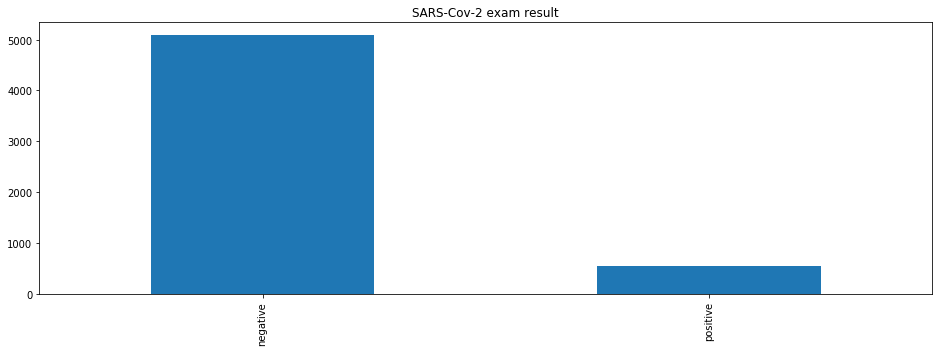

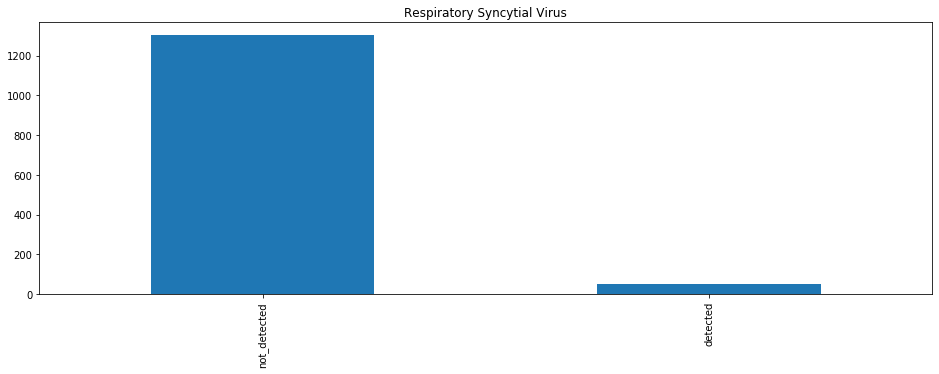

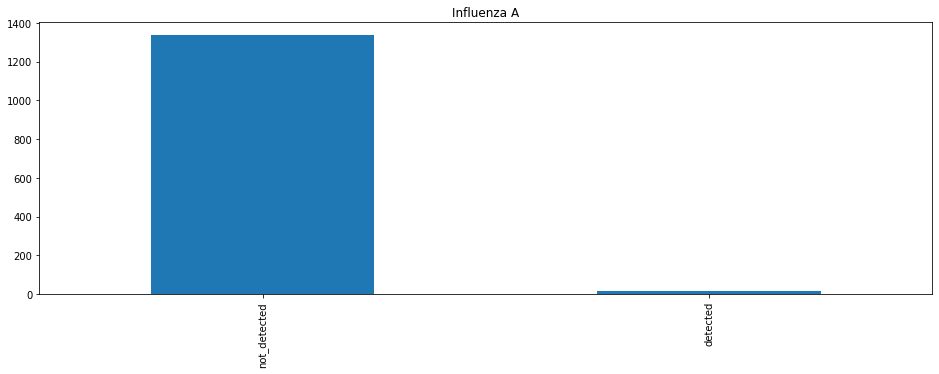

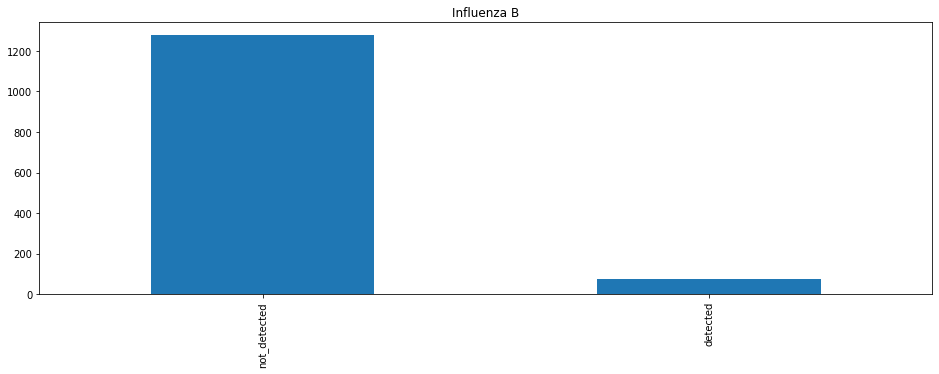

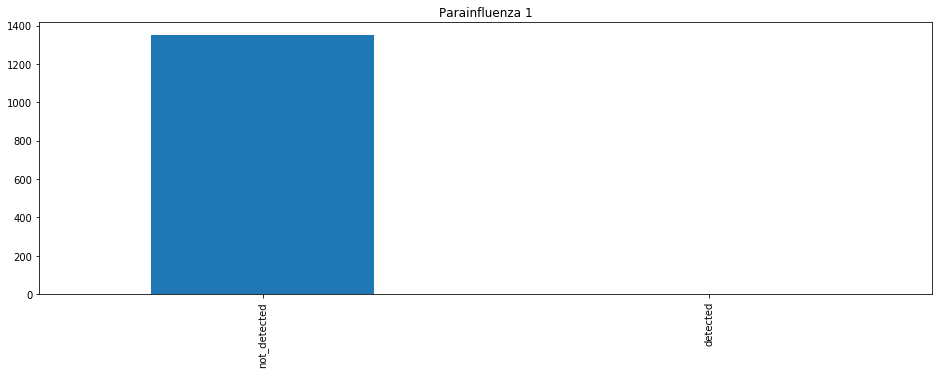

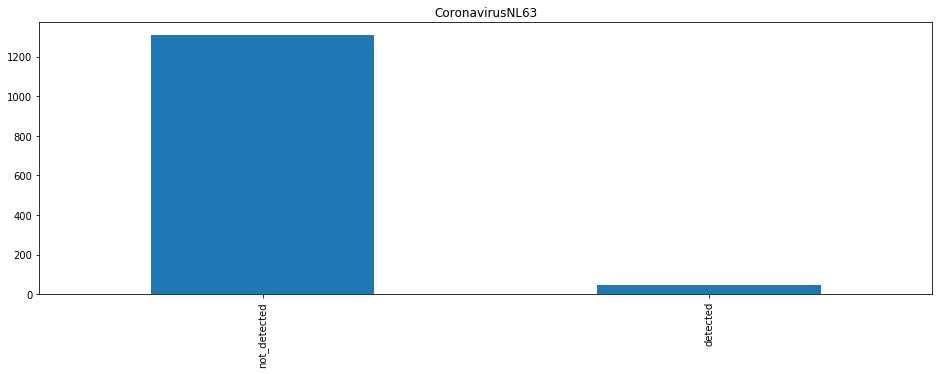

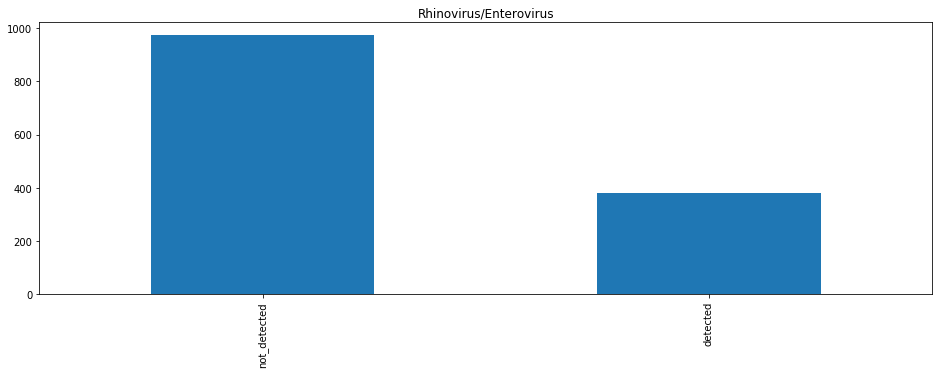

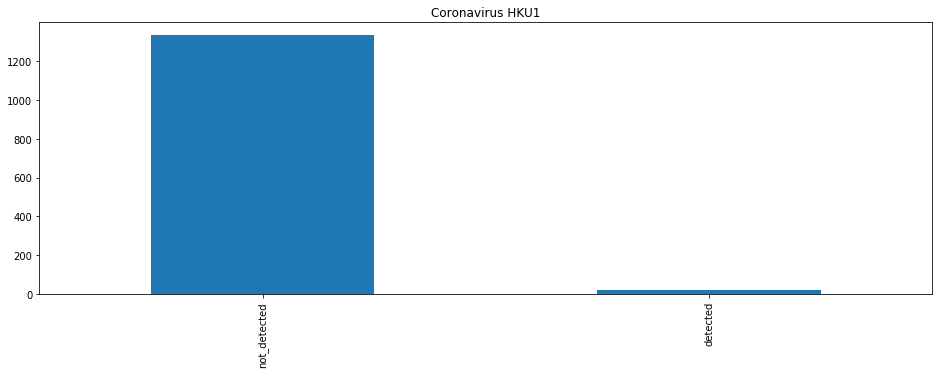

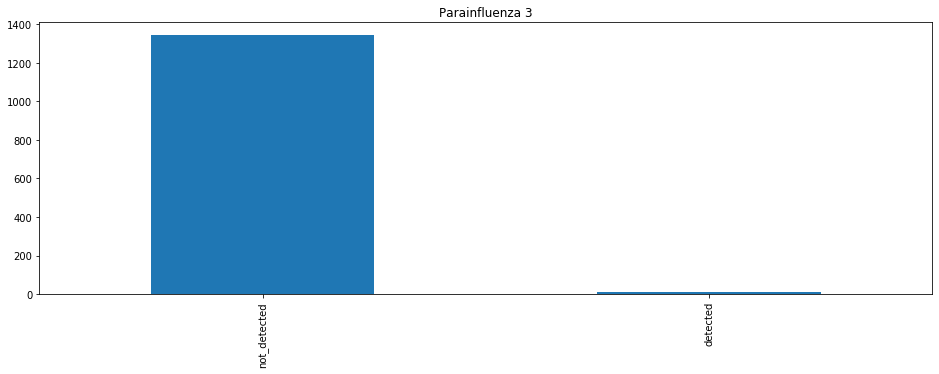

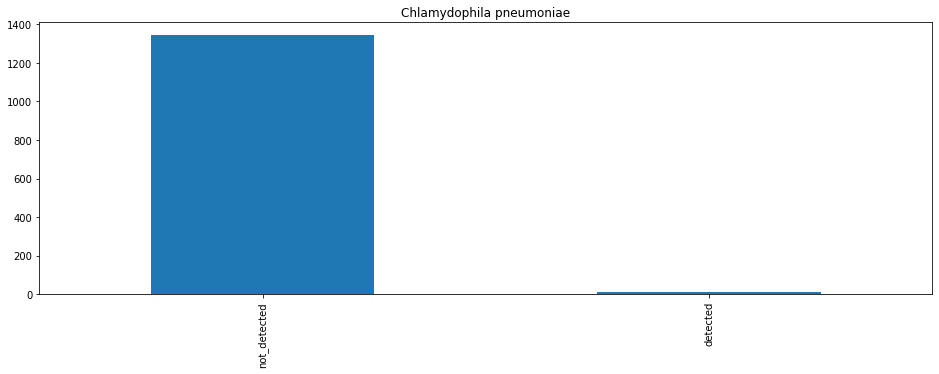

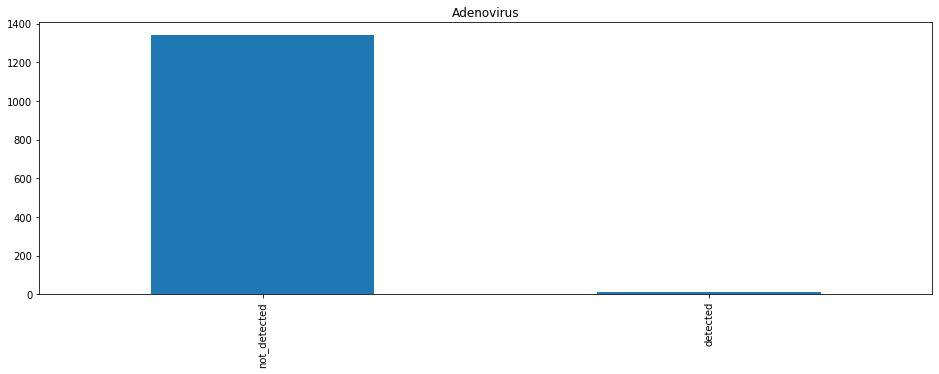

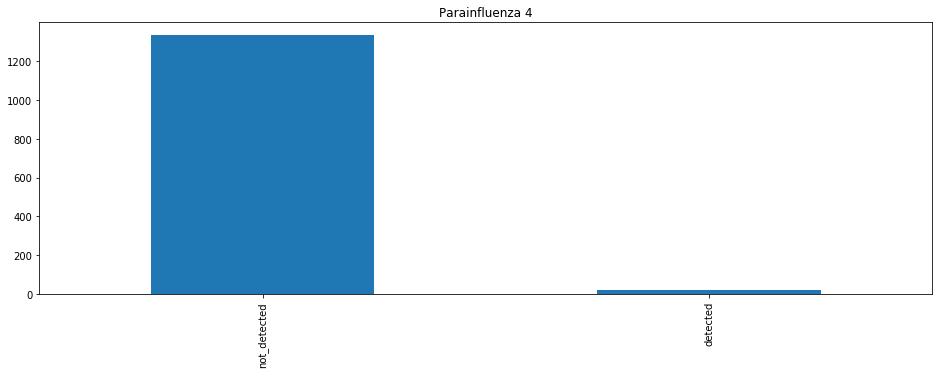

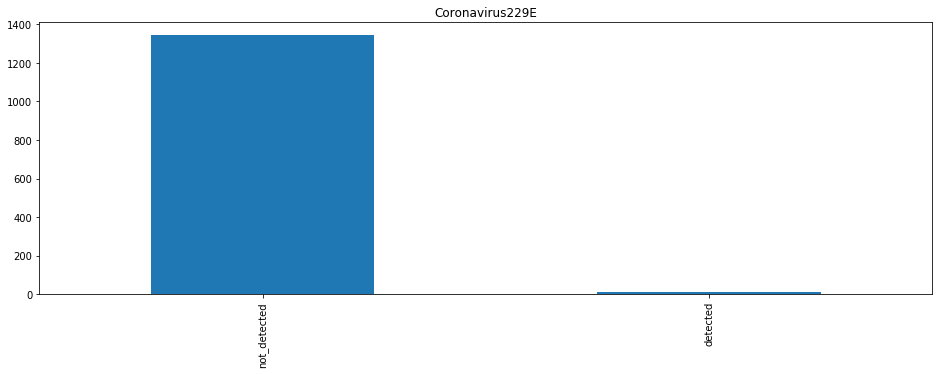

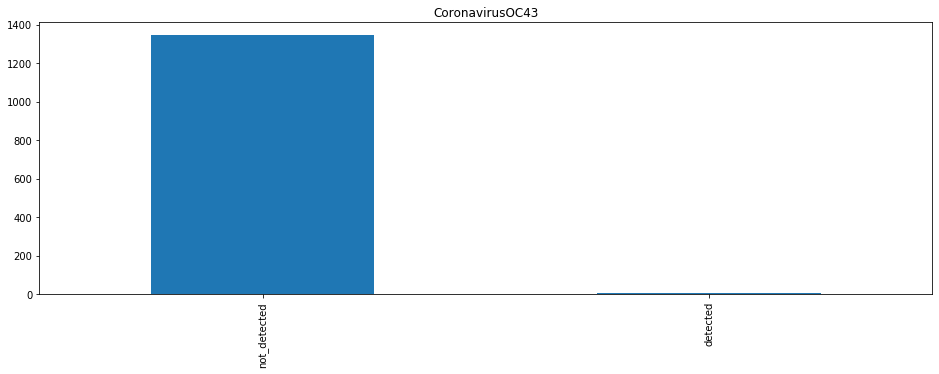

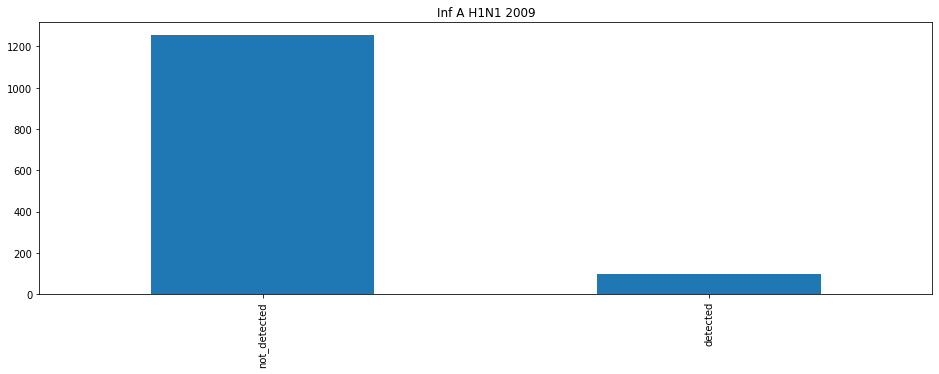

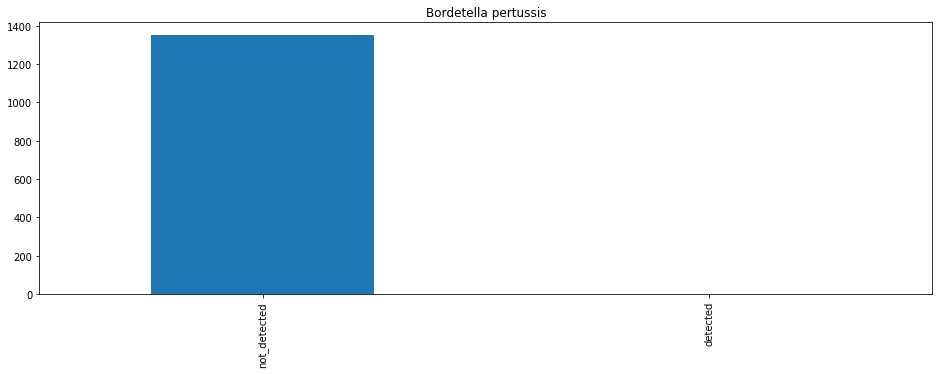

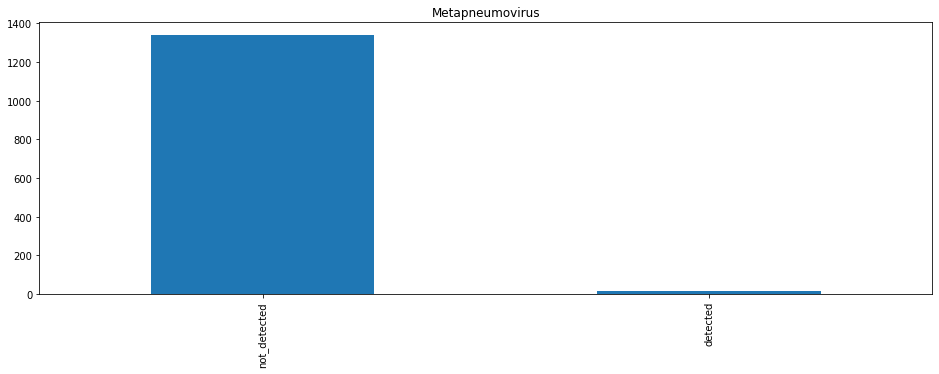

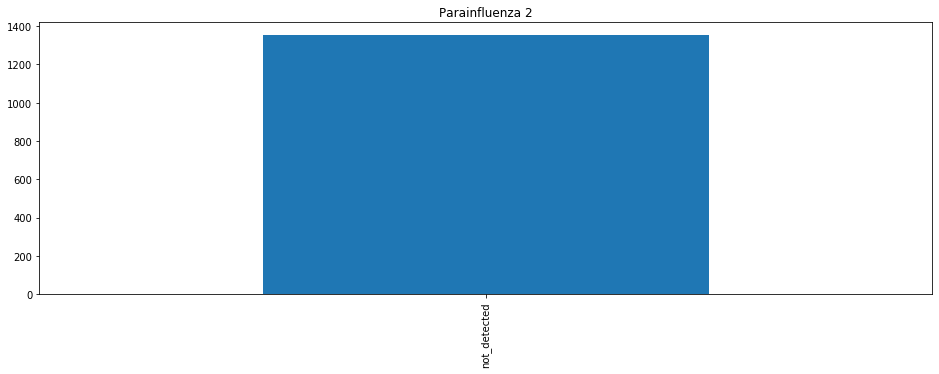

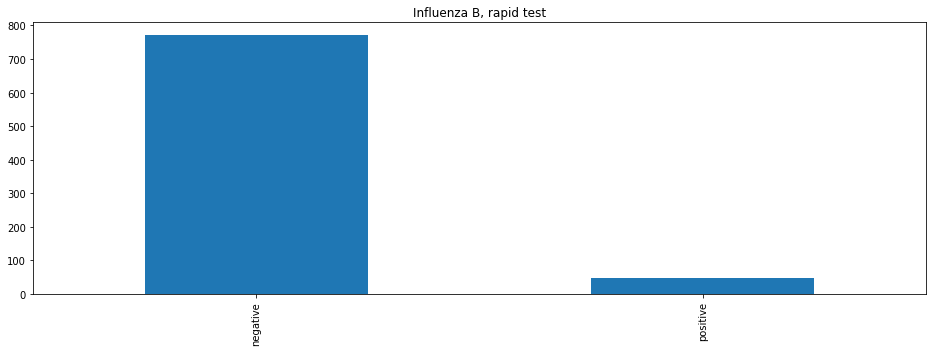

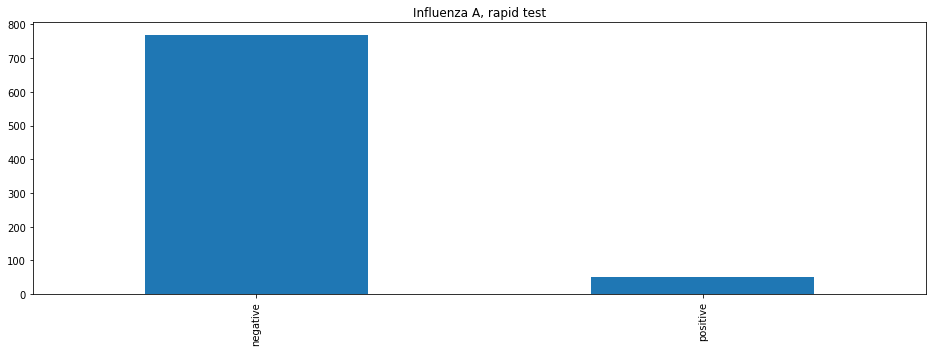

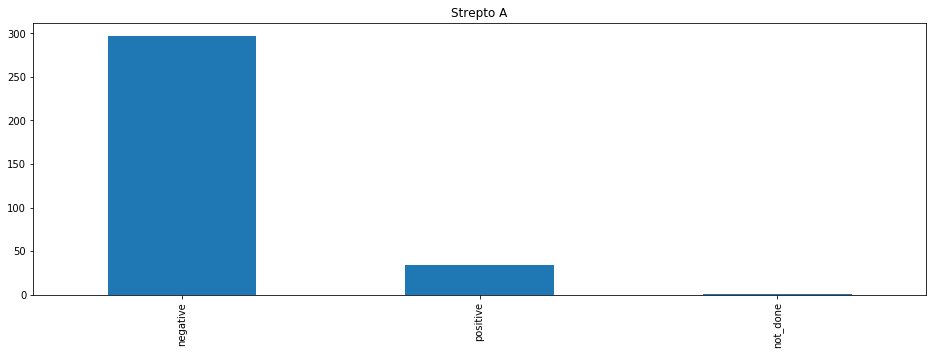

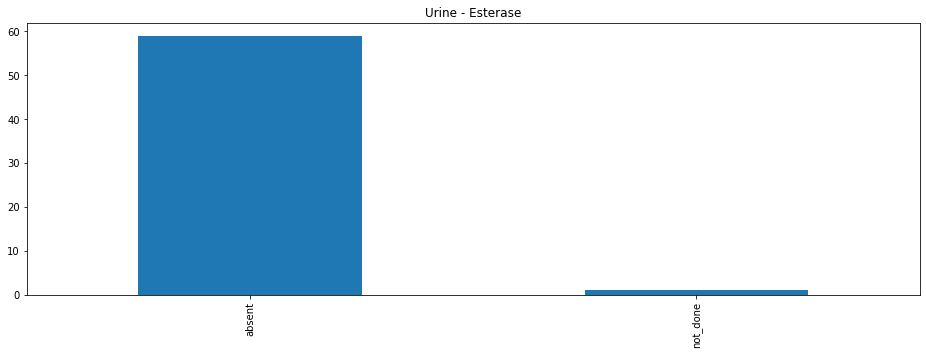

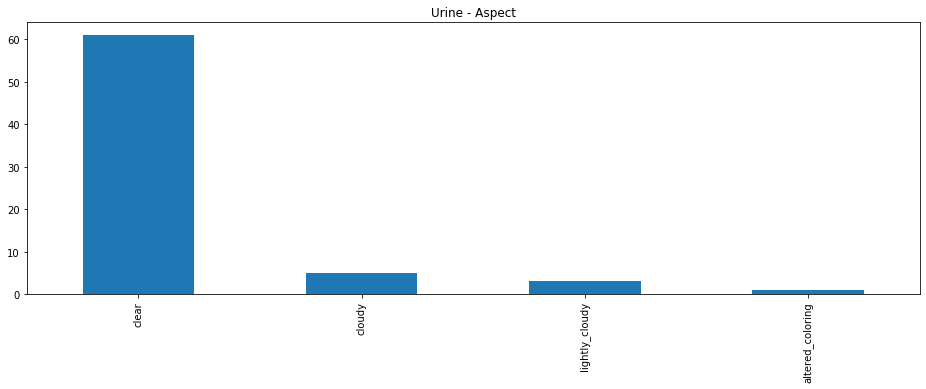

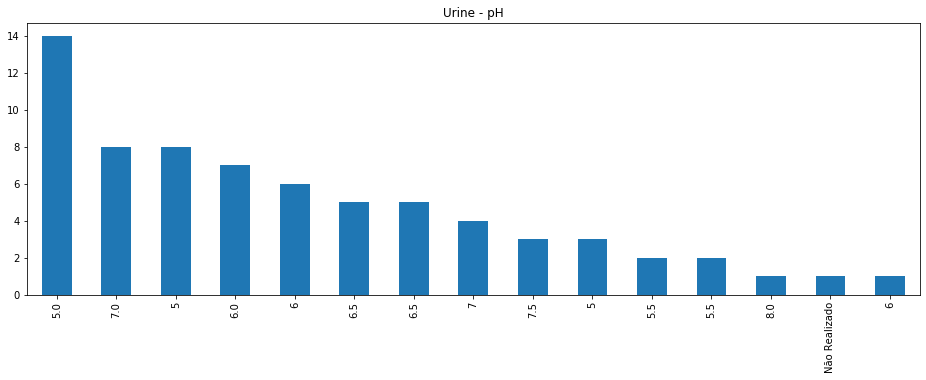

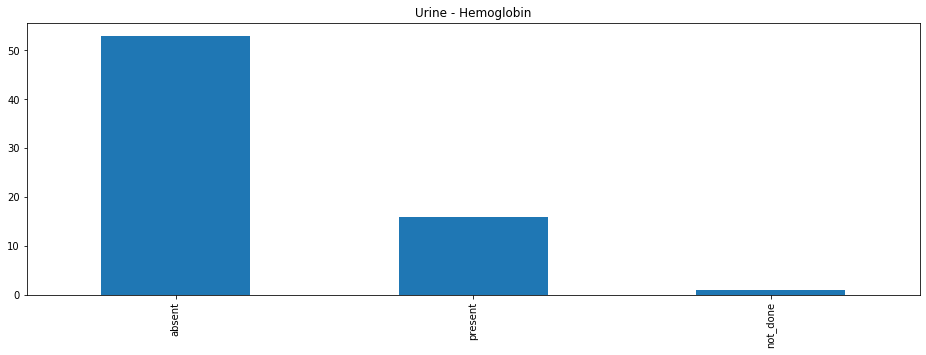

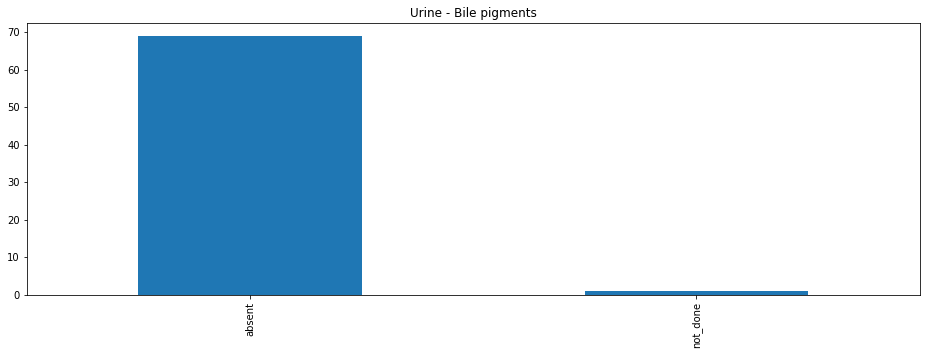

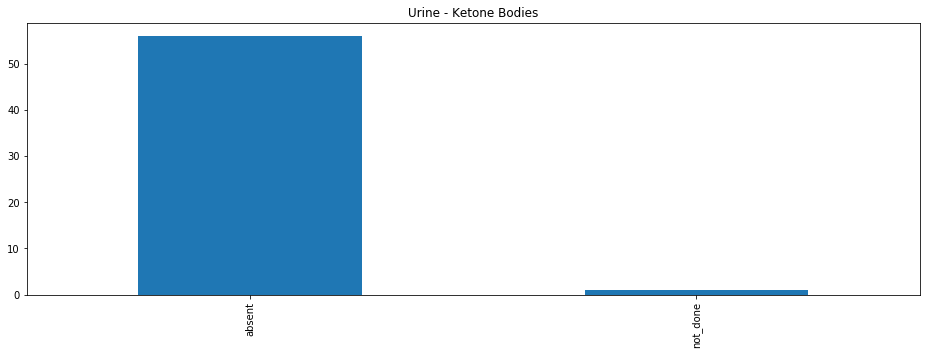

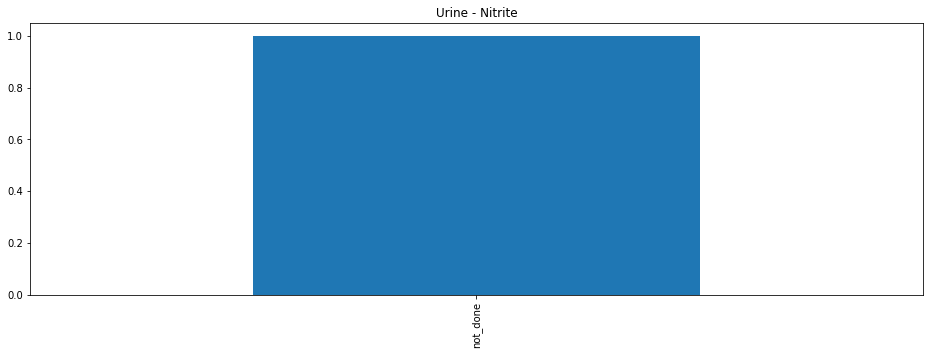

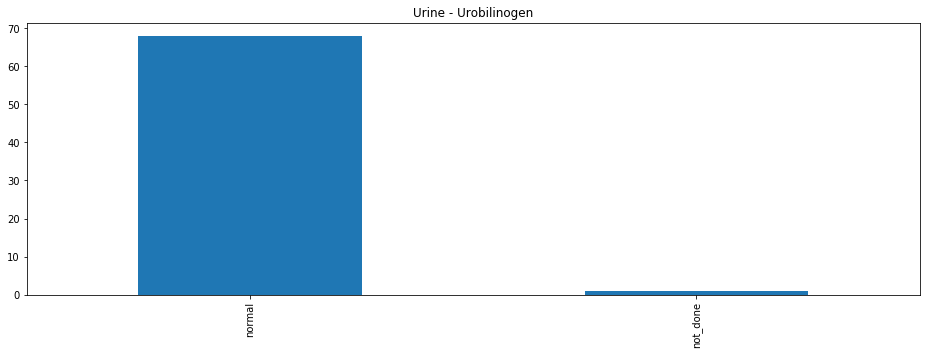

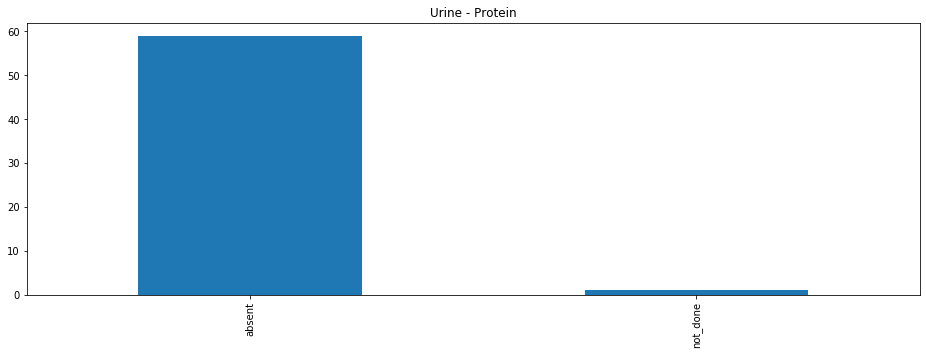

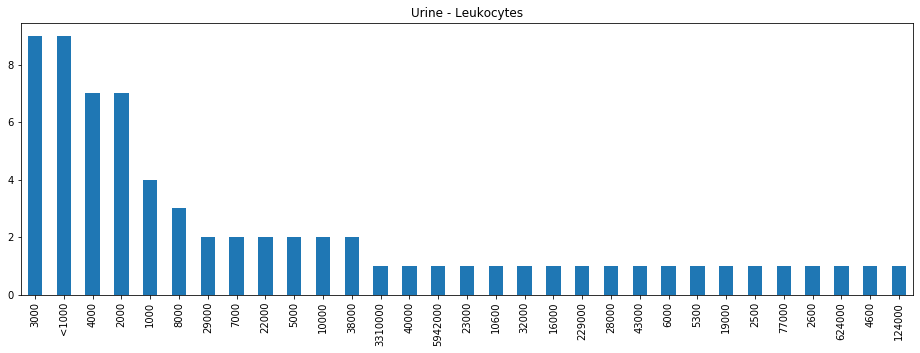

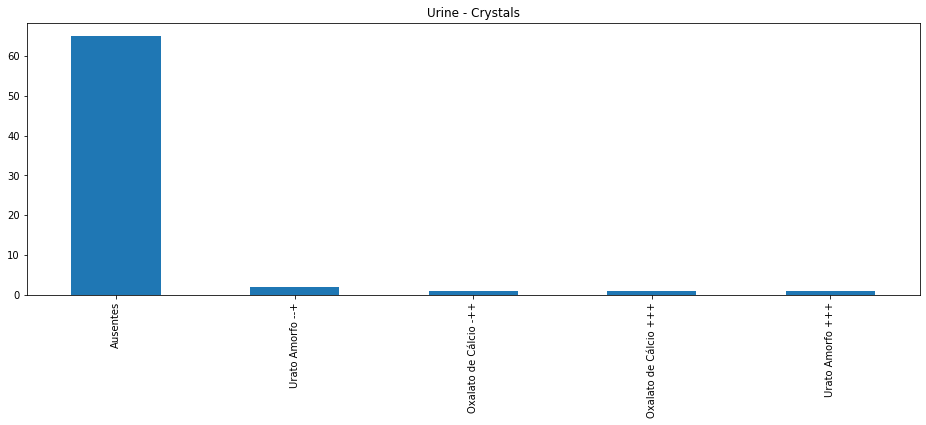

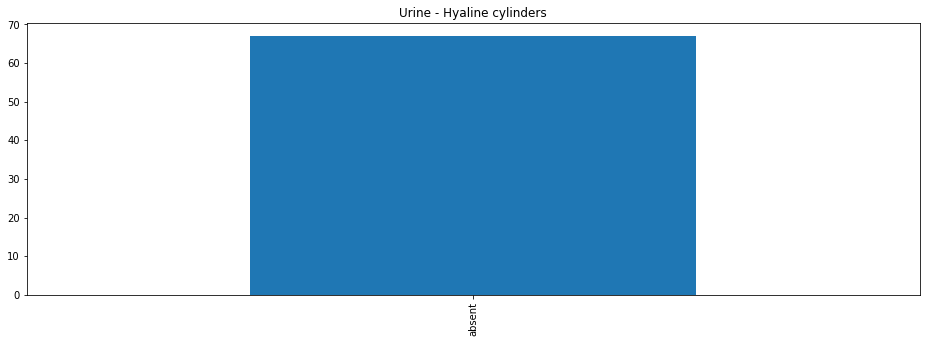

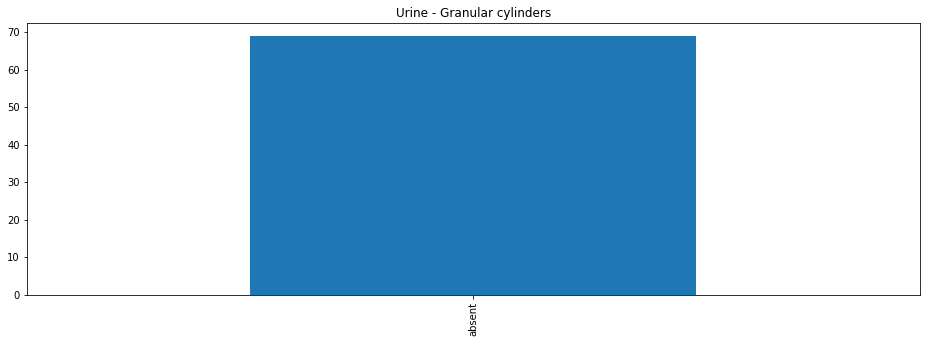

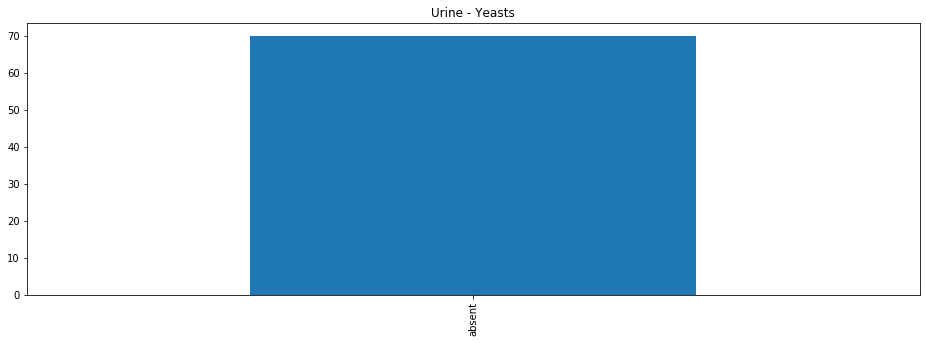

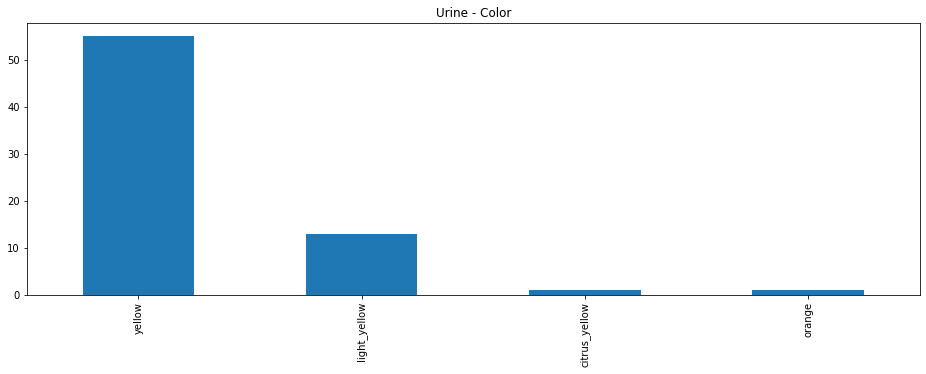

In [7]:
for column in df.select_dtypes(exclude=['number']).columns[1:]:
    plt.figure(figsize=(16,5))
    df[column].value_counts().plot(kind='bar',title=f"{column}")
    plt.show()

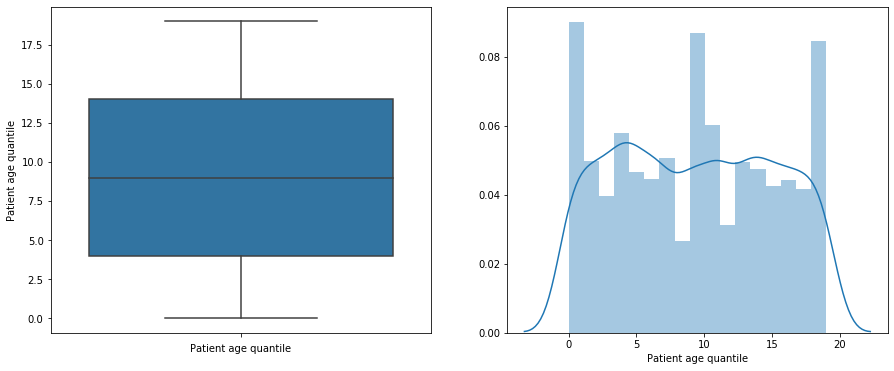

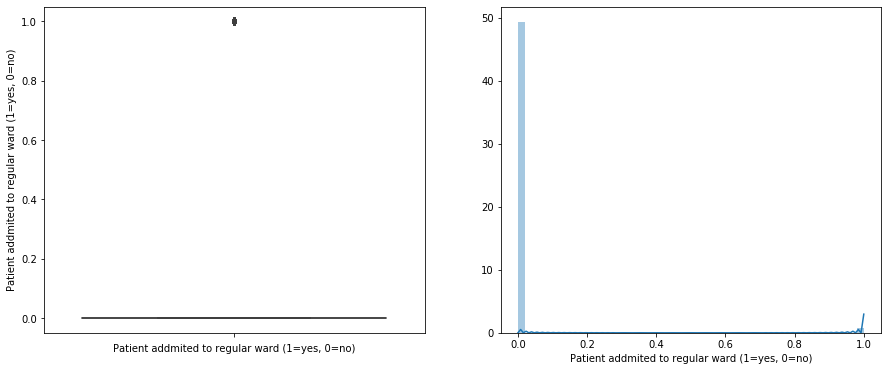

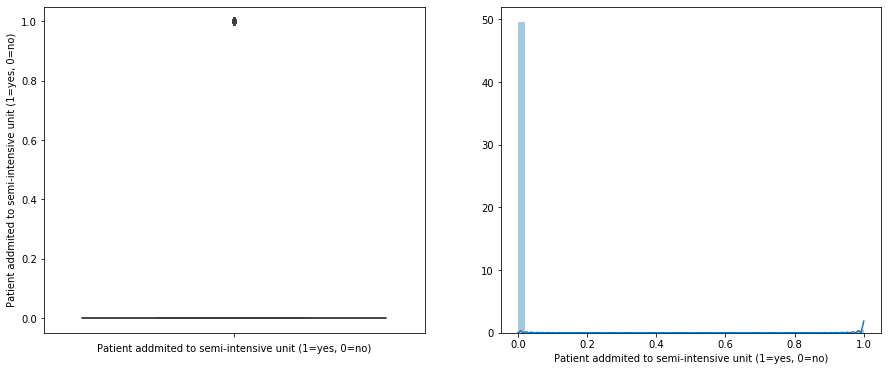

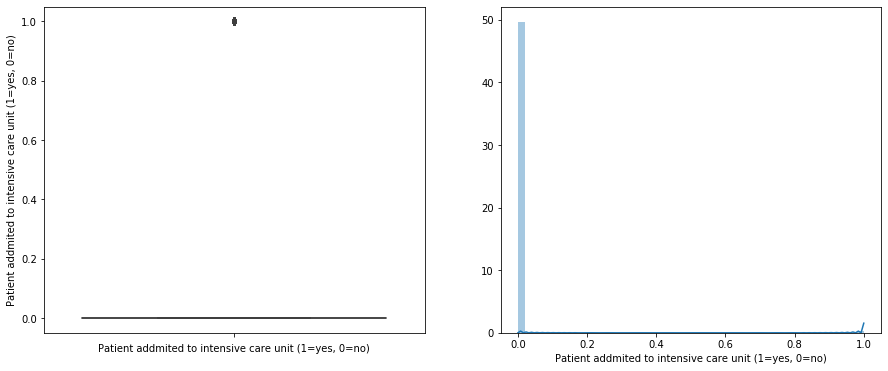

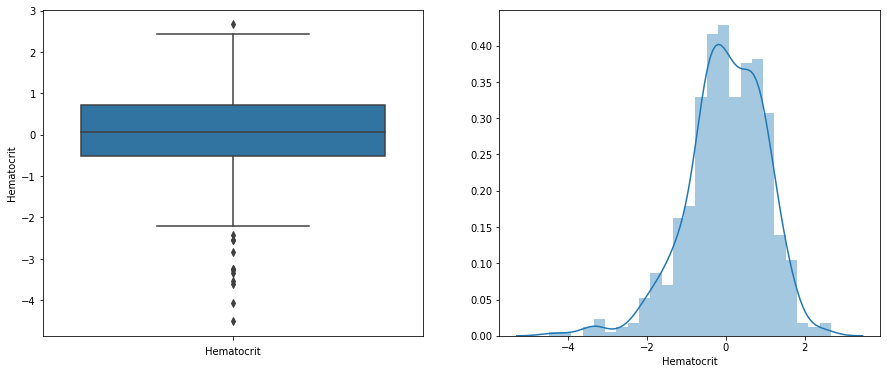

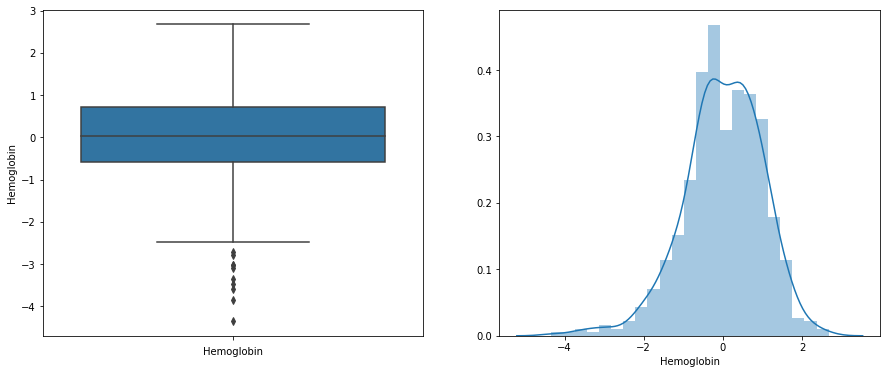

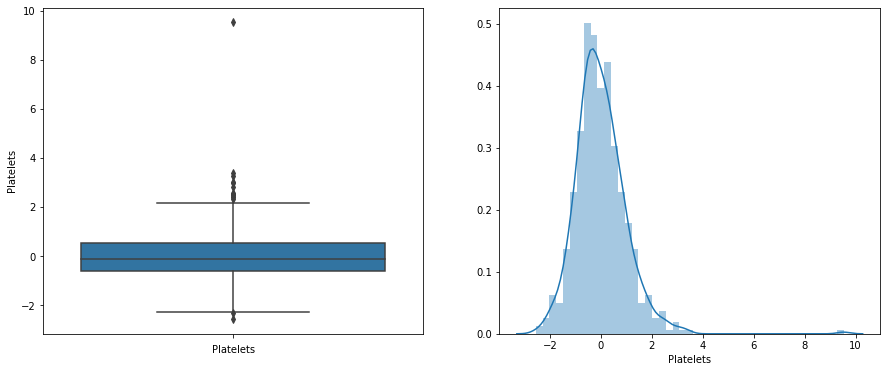

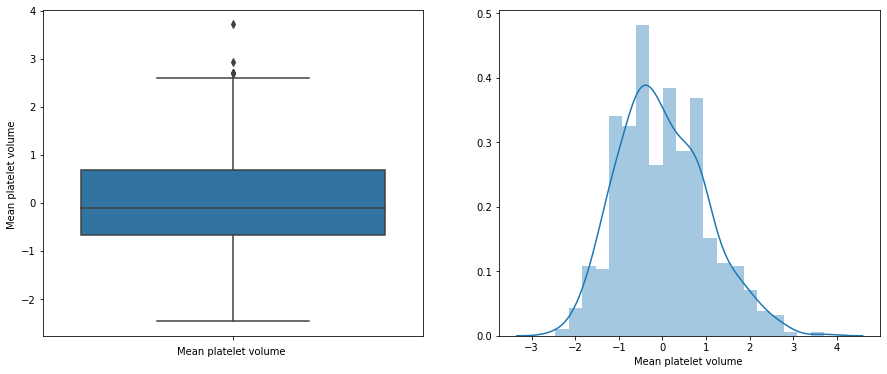

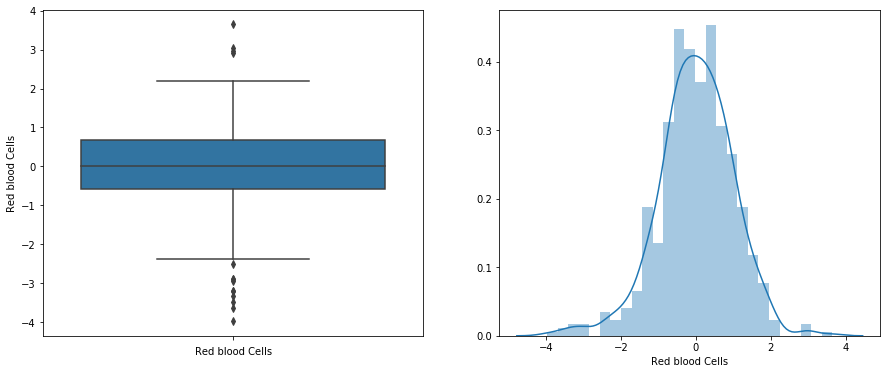

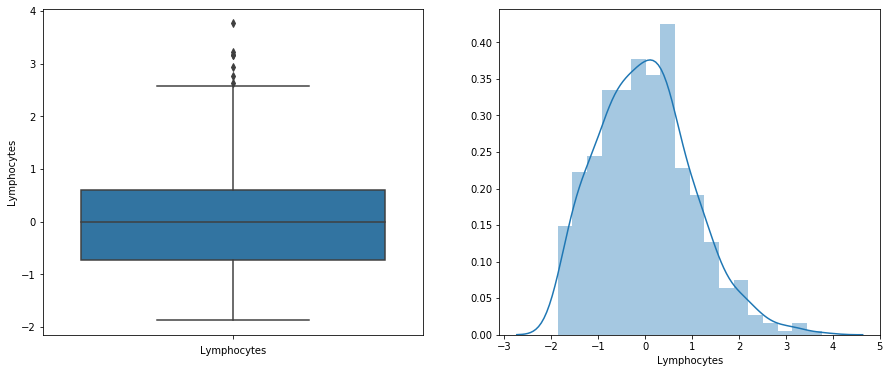

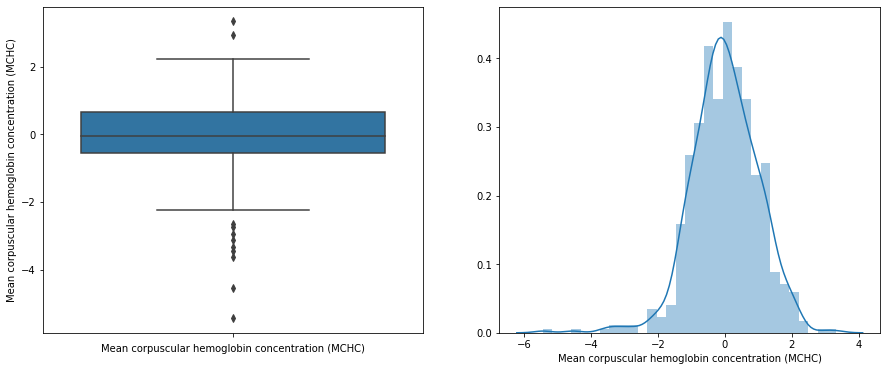

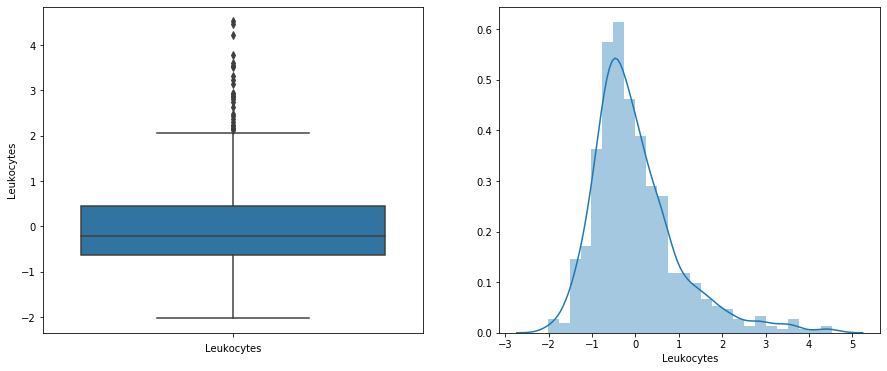

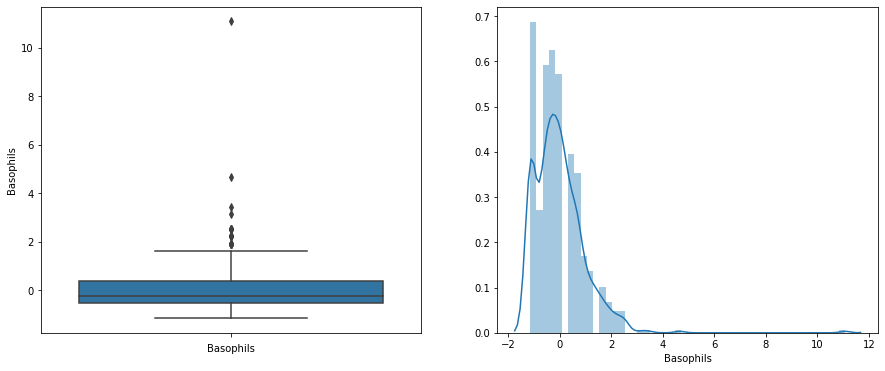

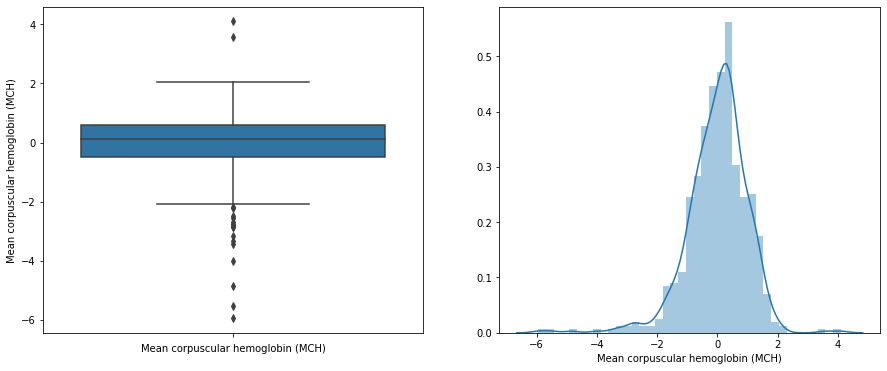

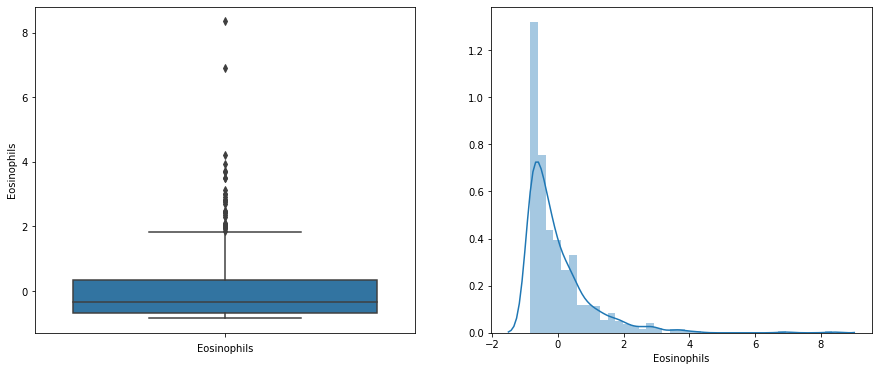

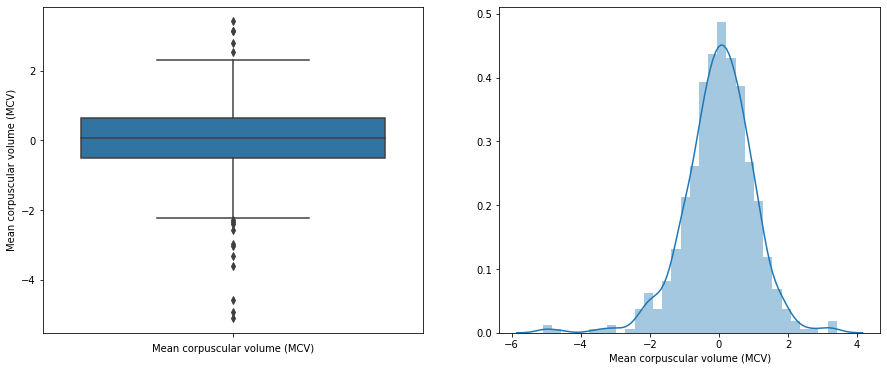

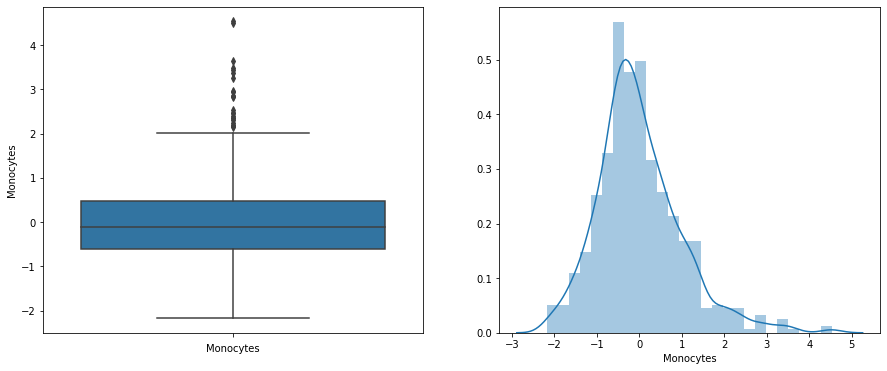

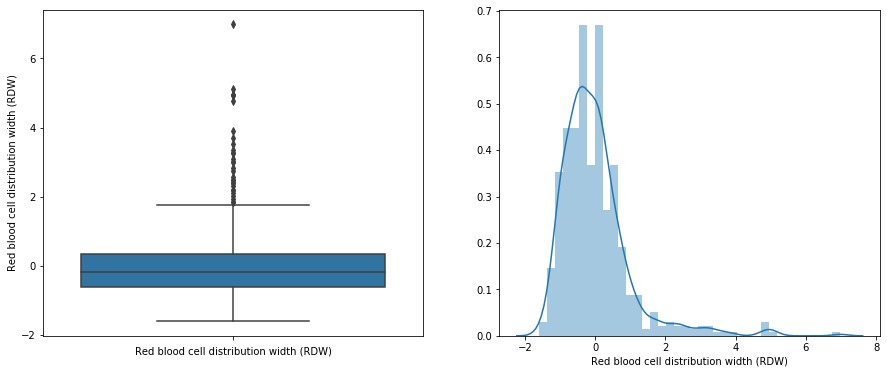

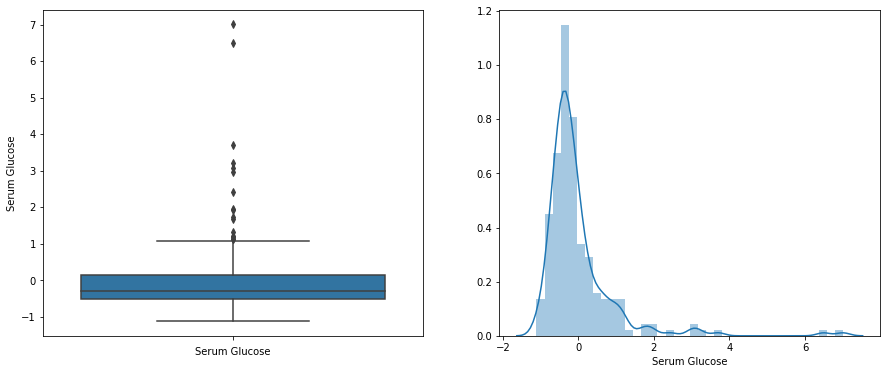

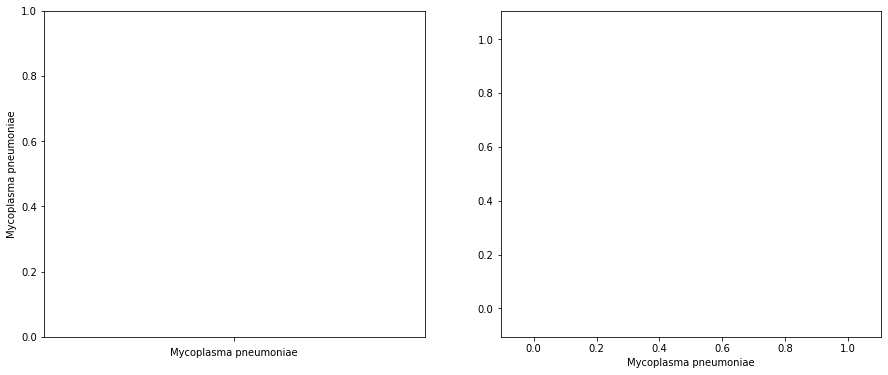

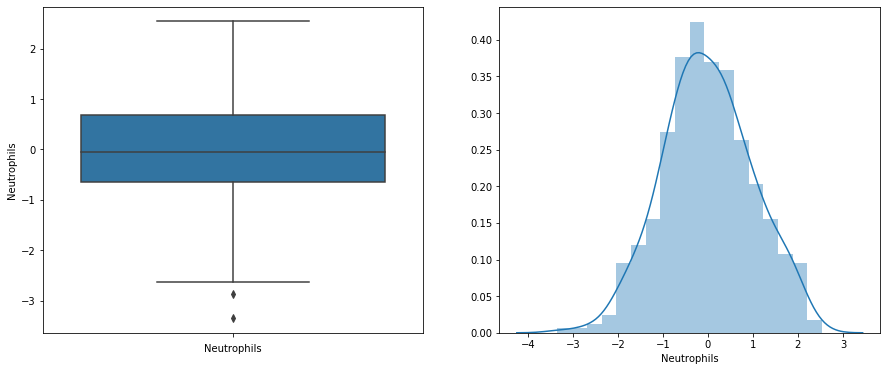

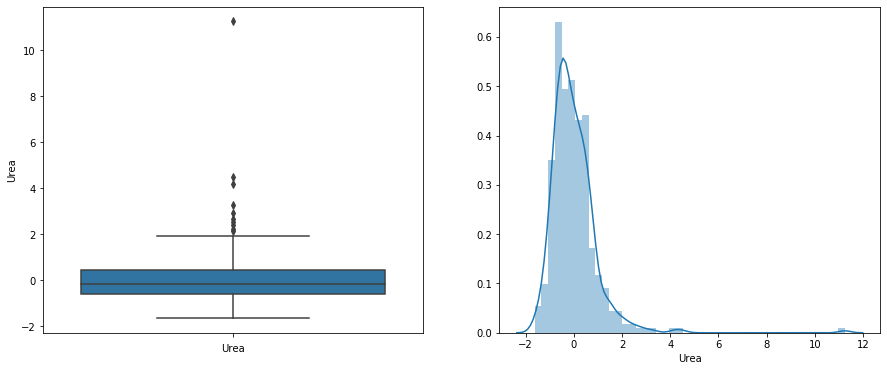

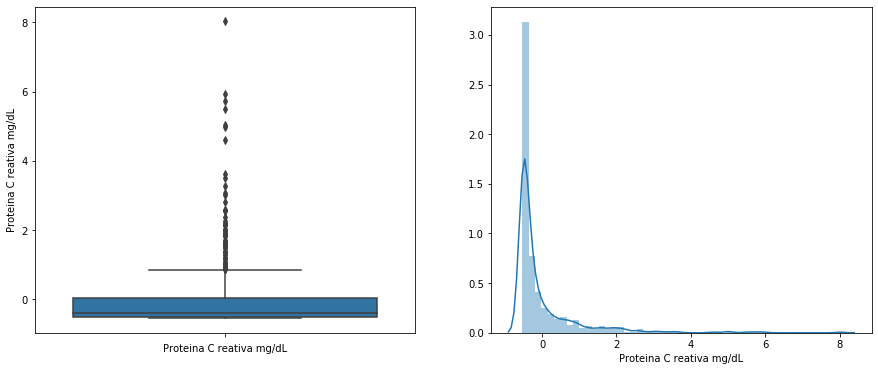

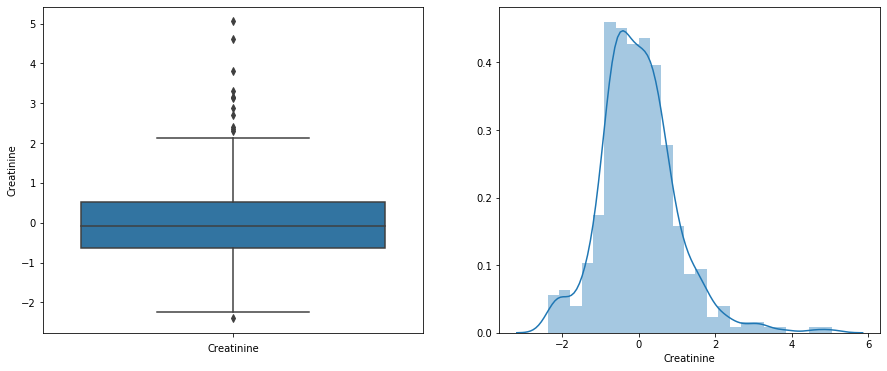

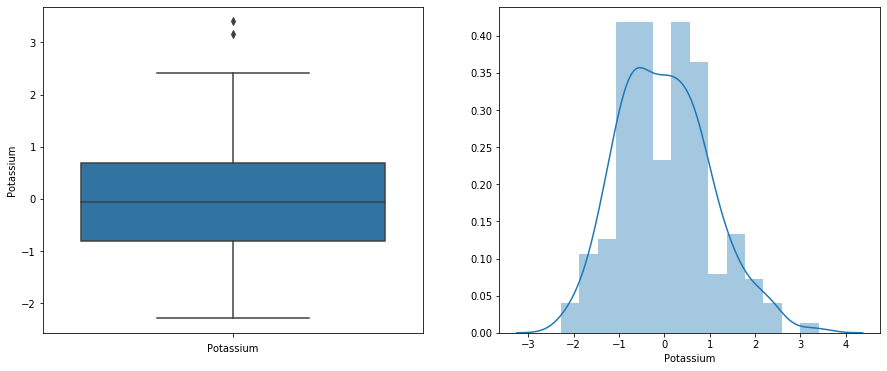

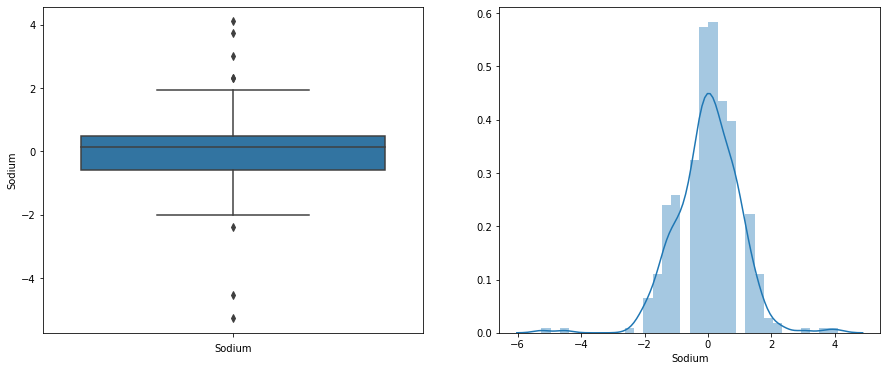

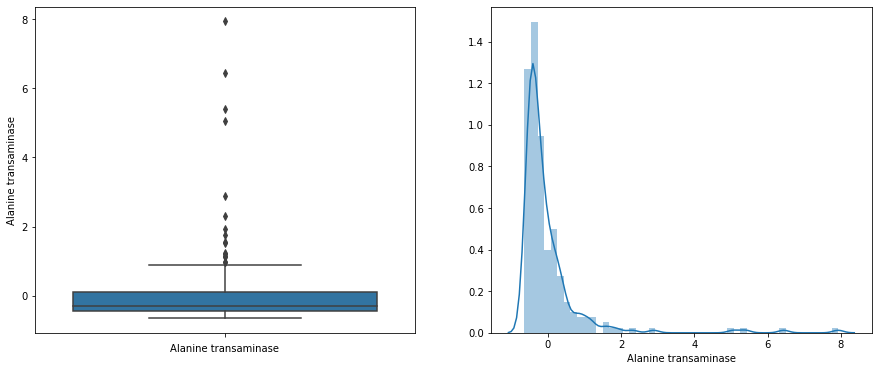

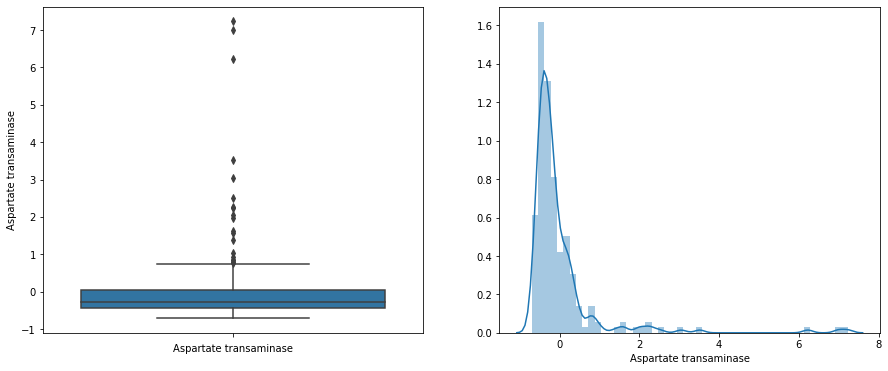

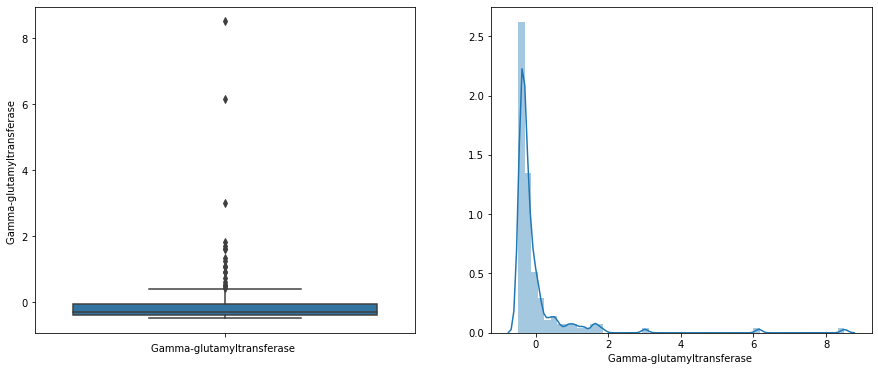

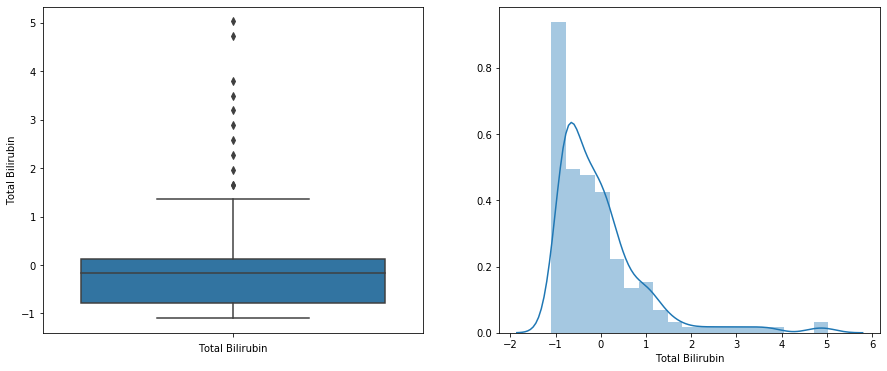

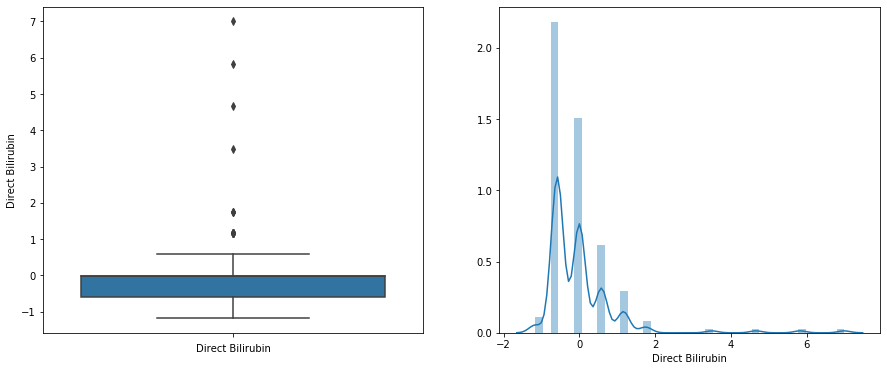

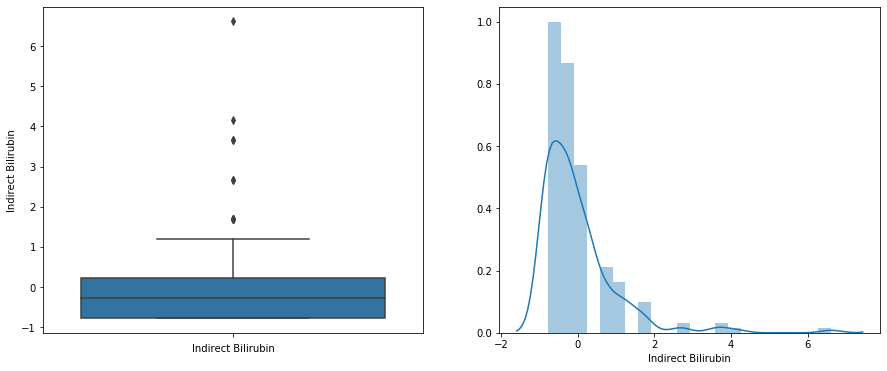

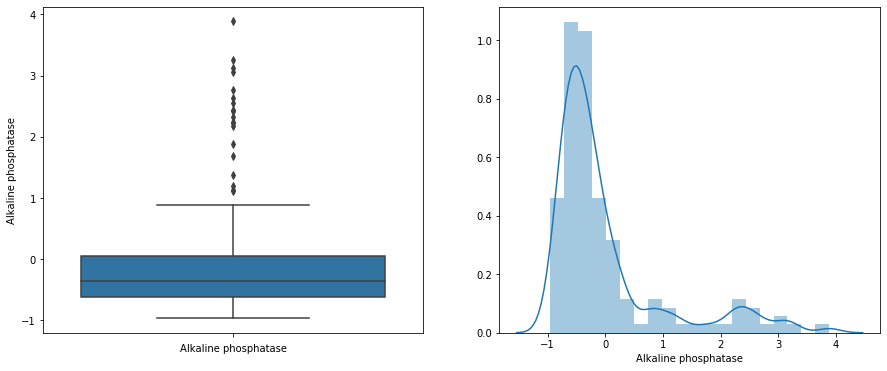

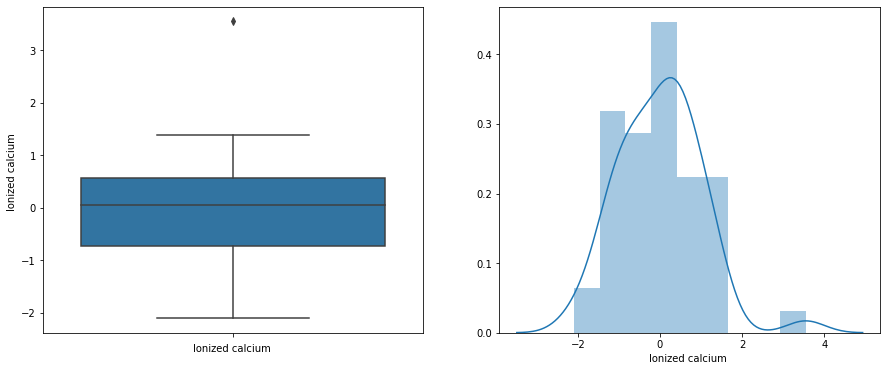

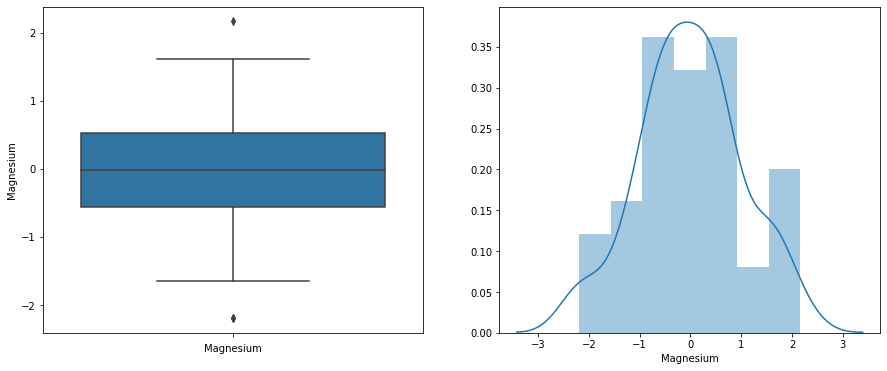

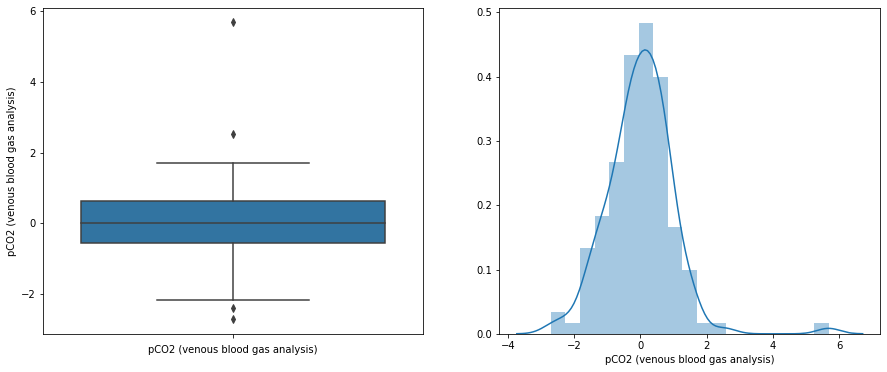

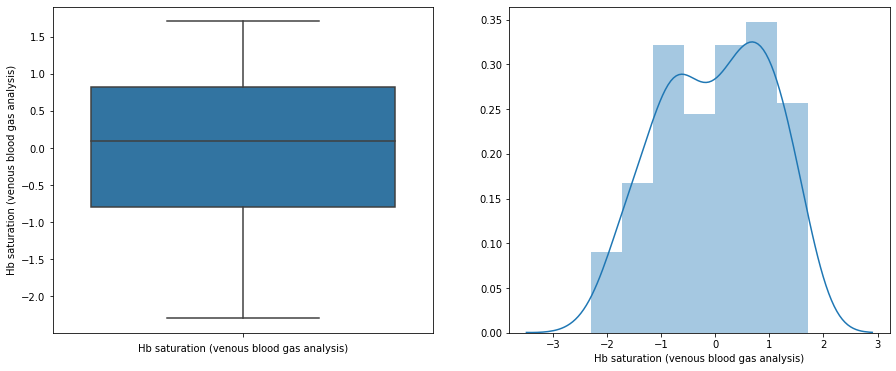

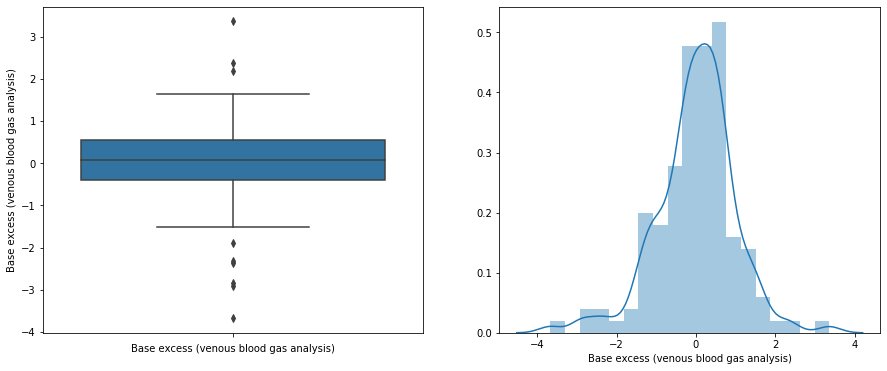

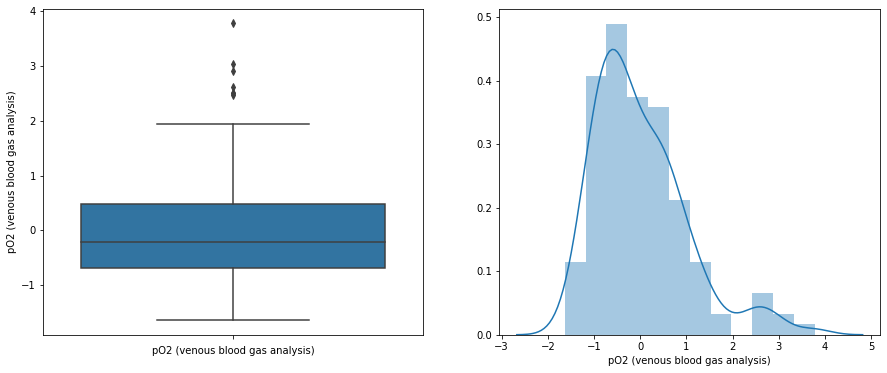

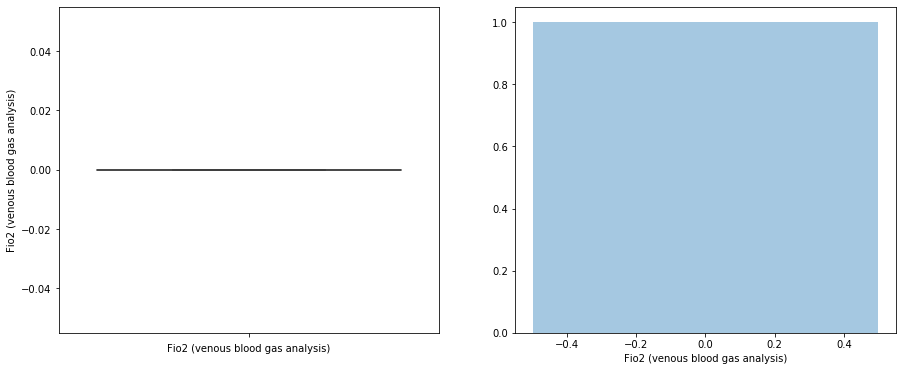

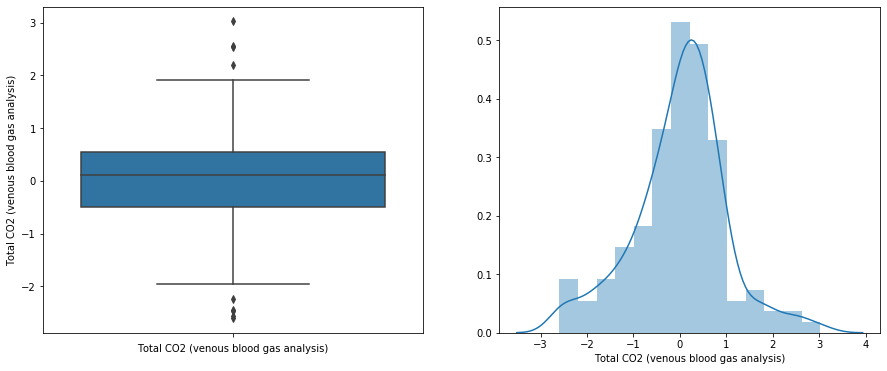

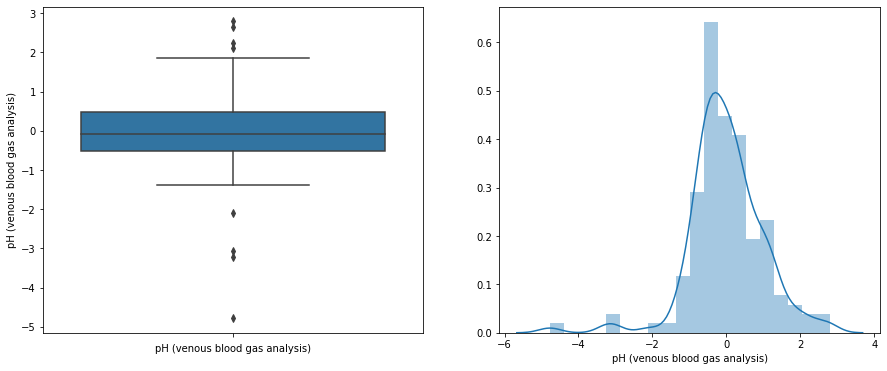

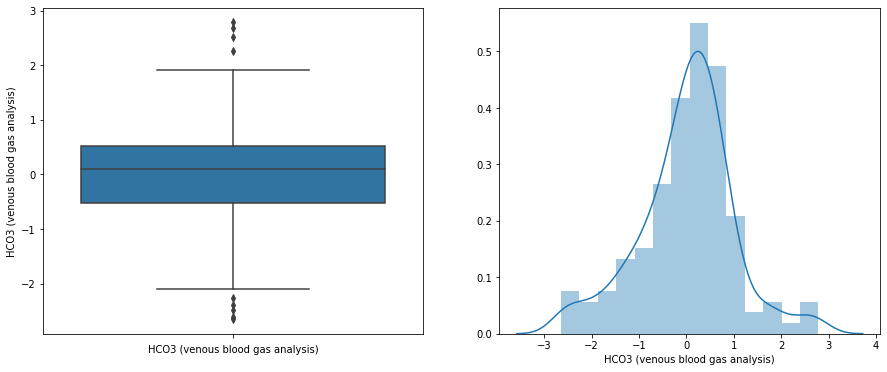

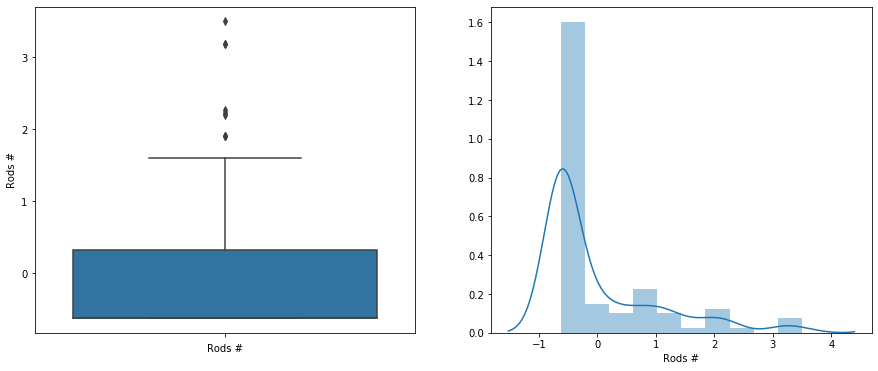

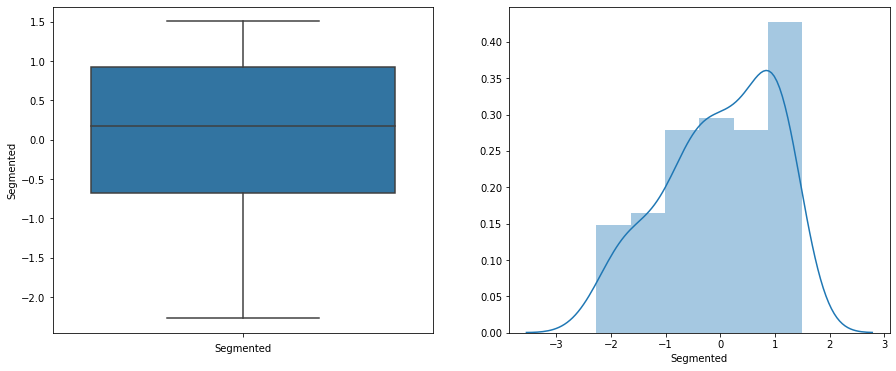

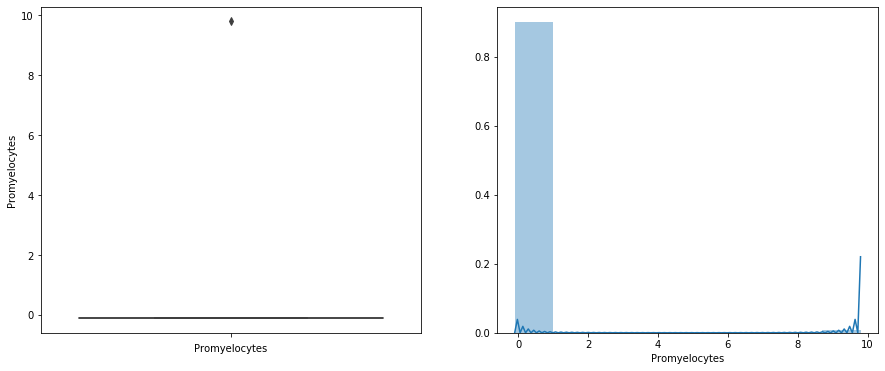

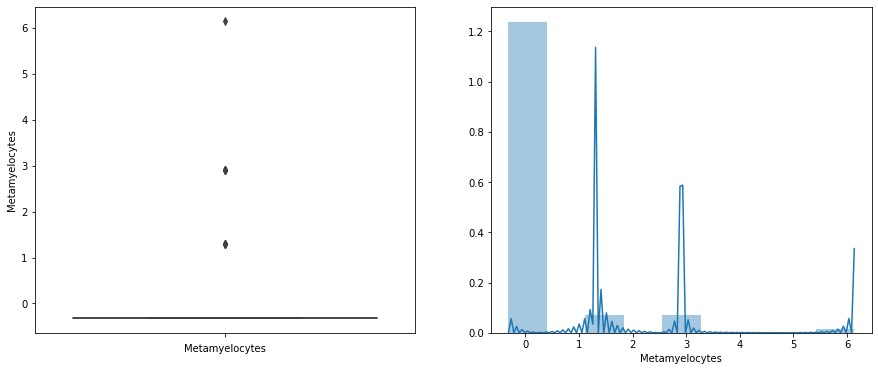

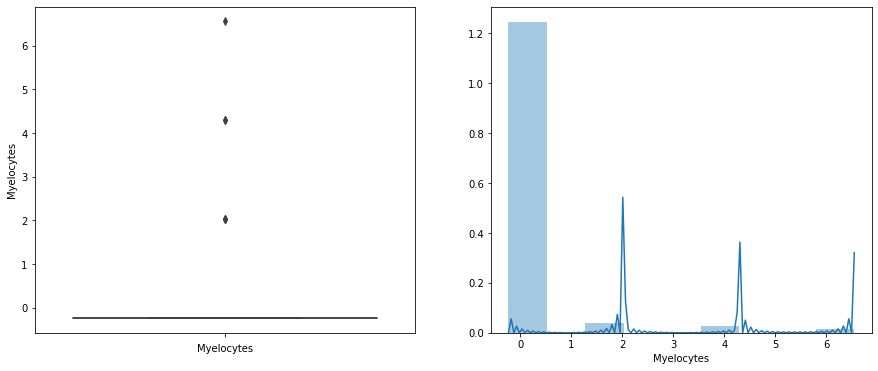

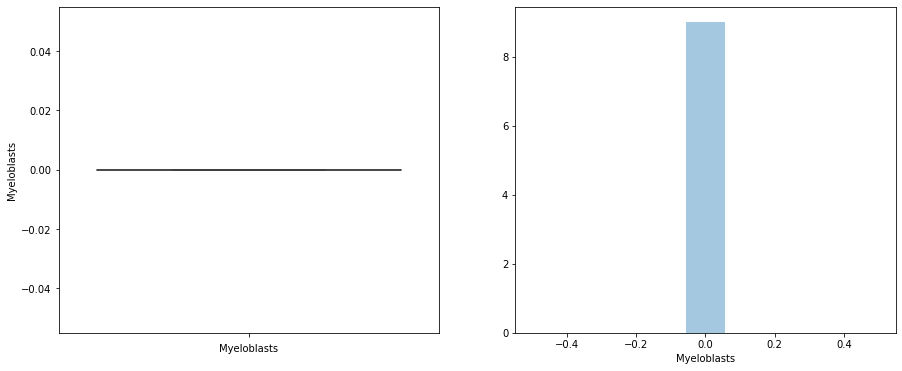

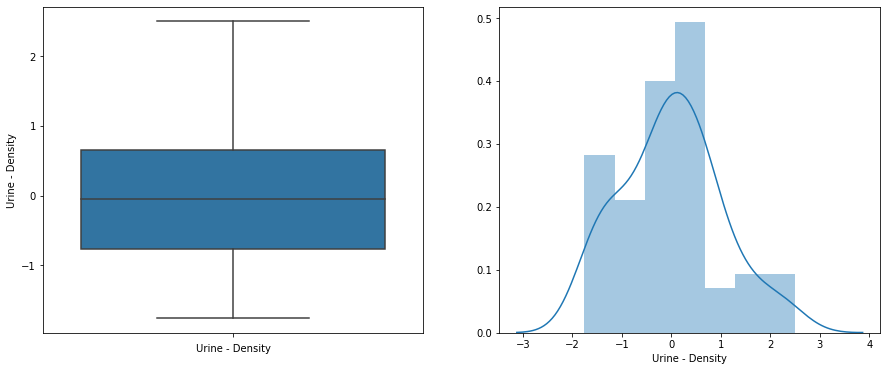

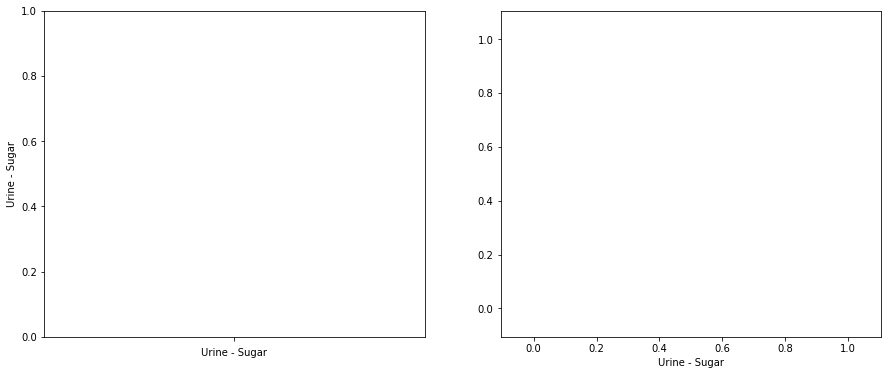

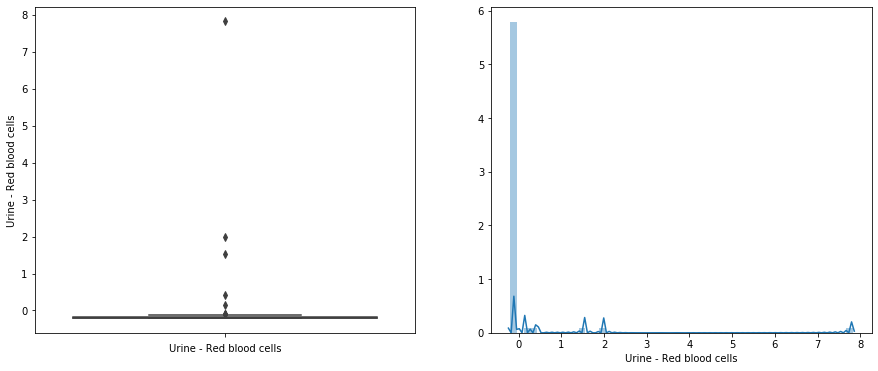

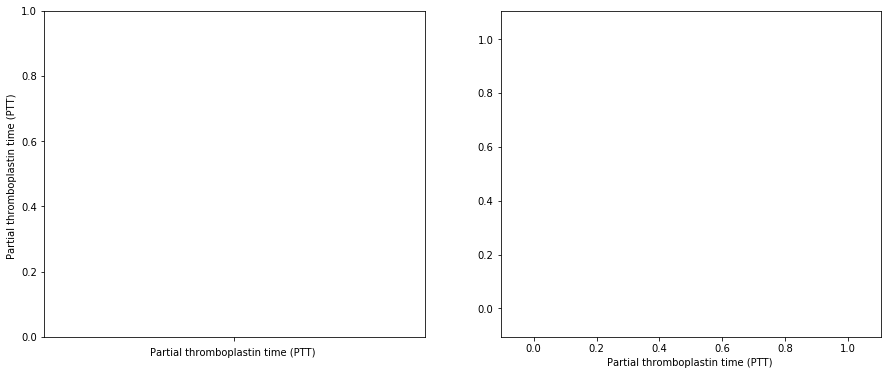

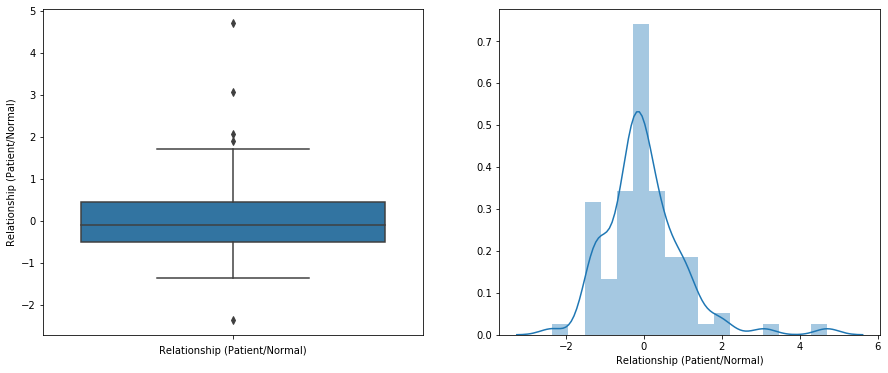

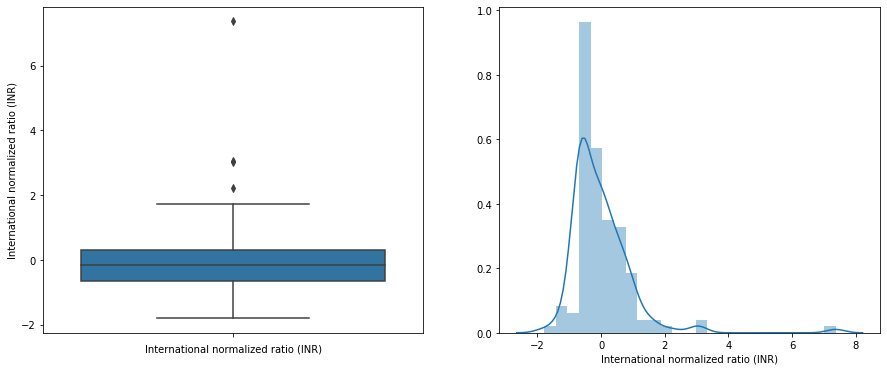

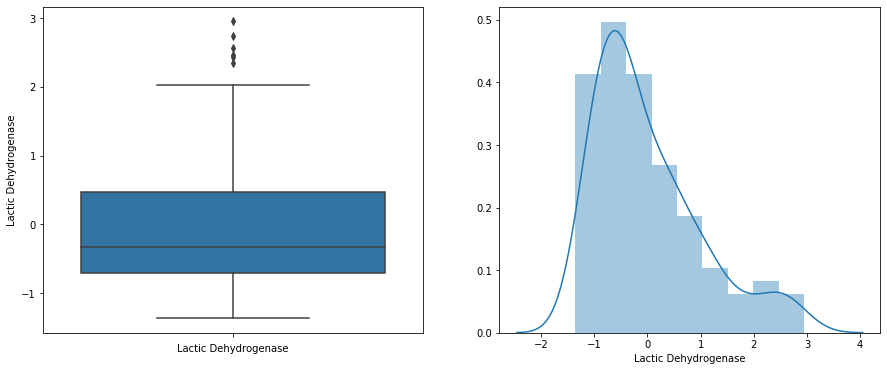

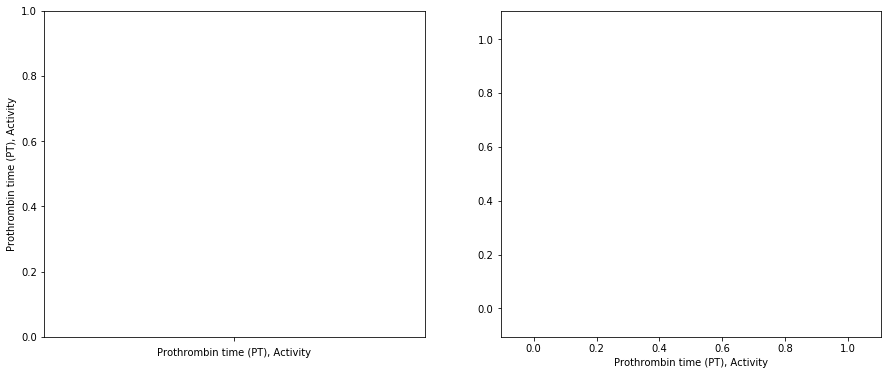

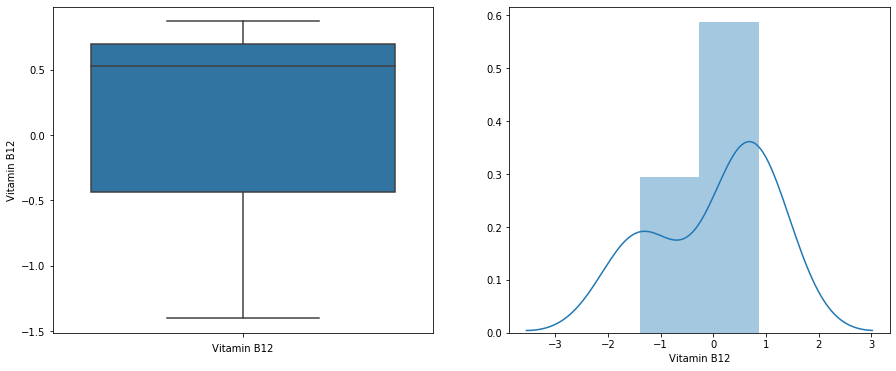

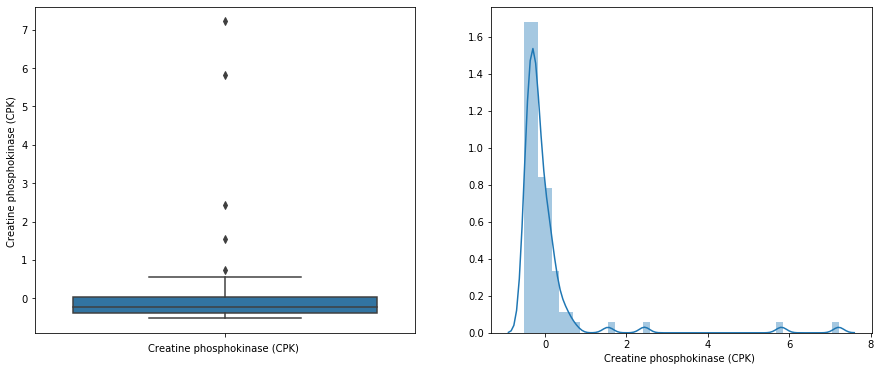

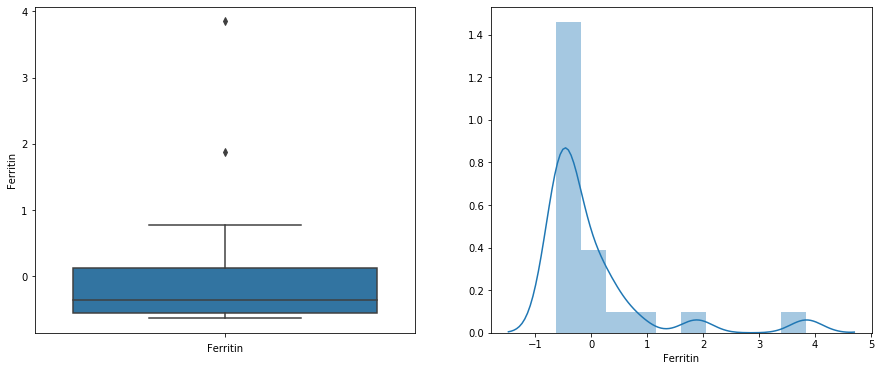

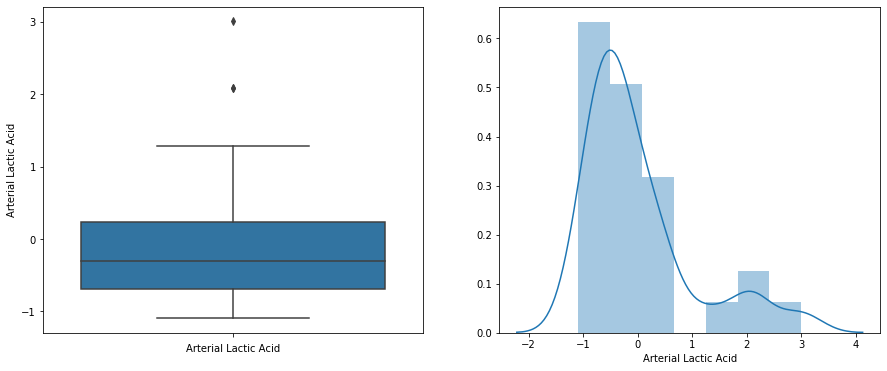

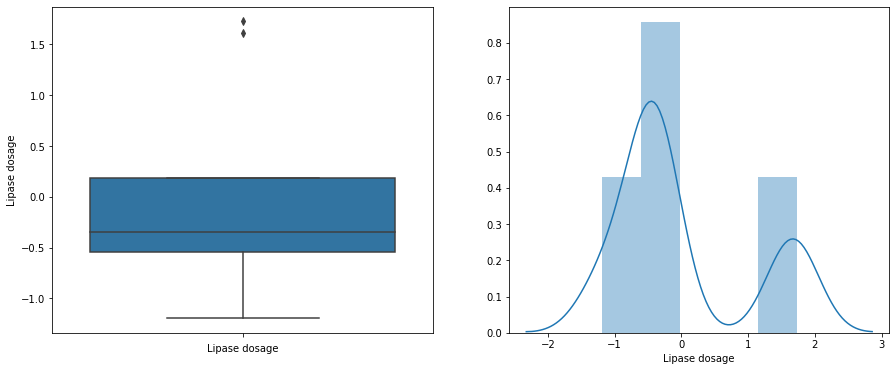

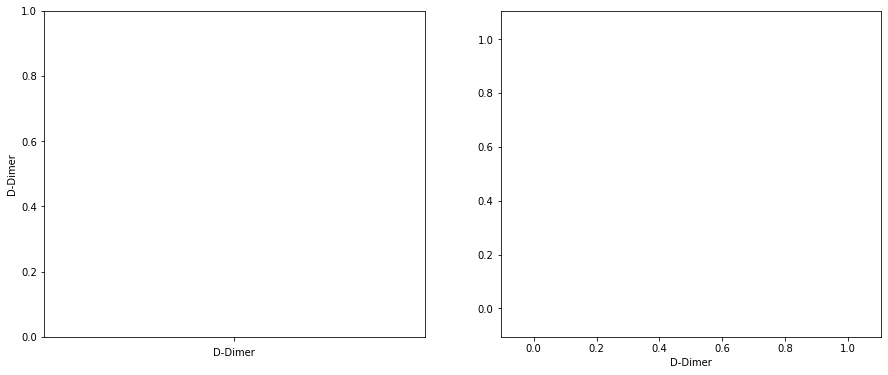

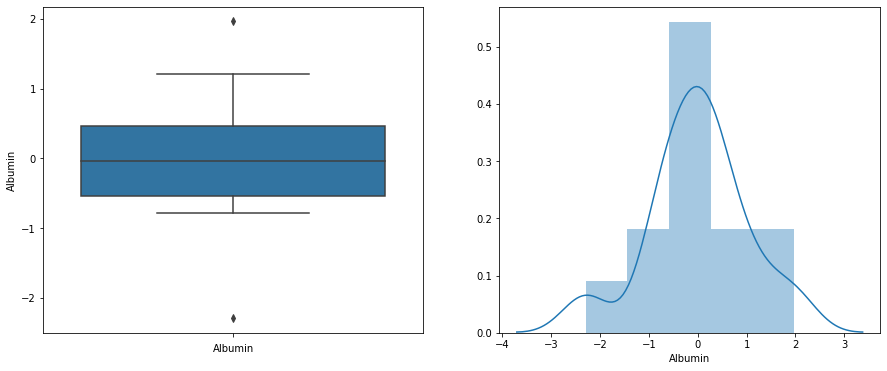

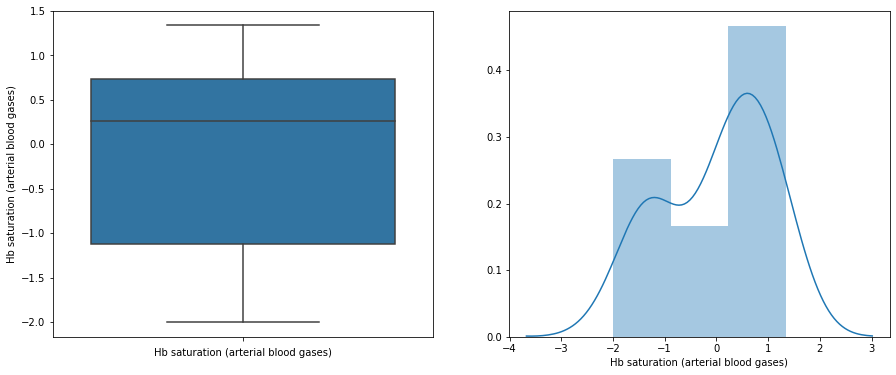

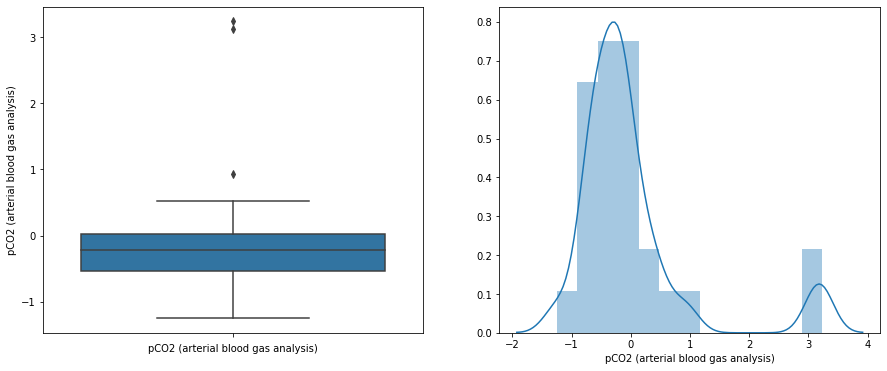

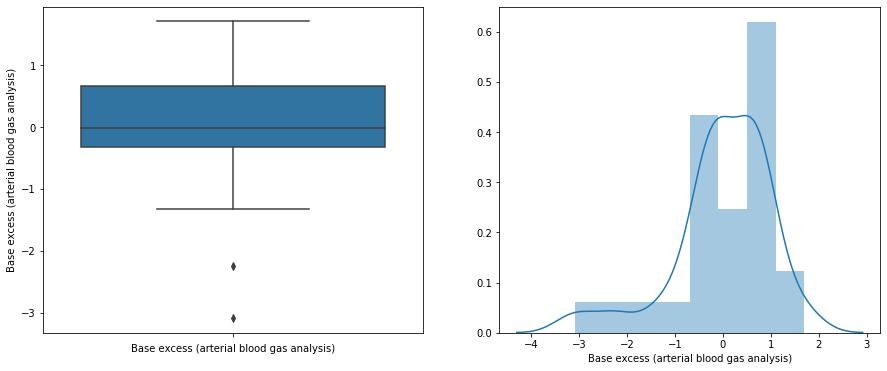

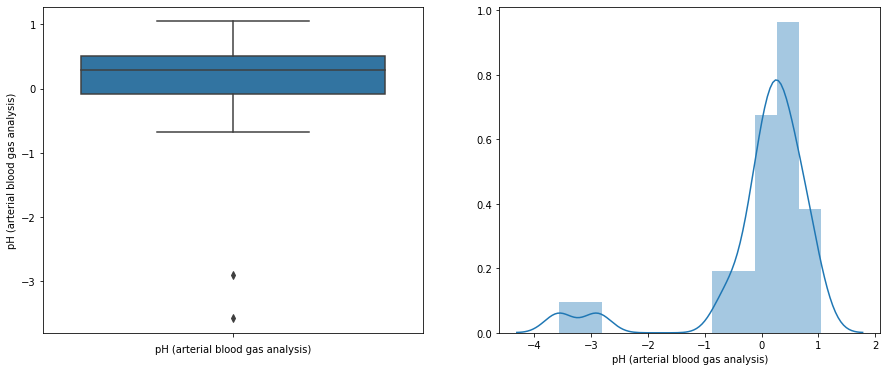

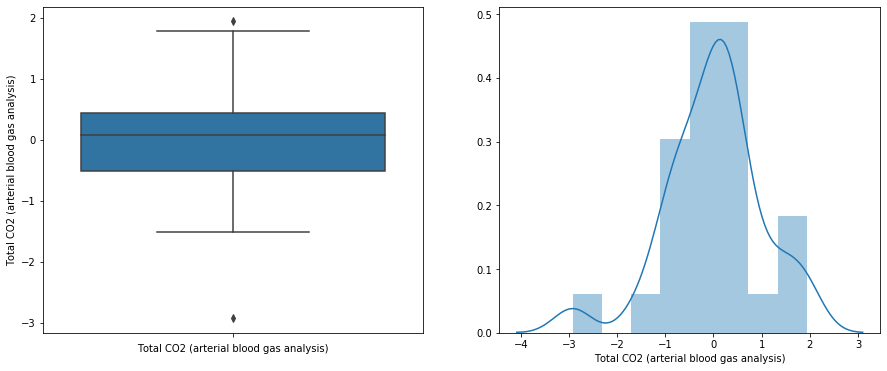

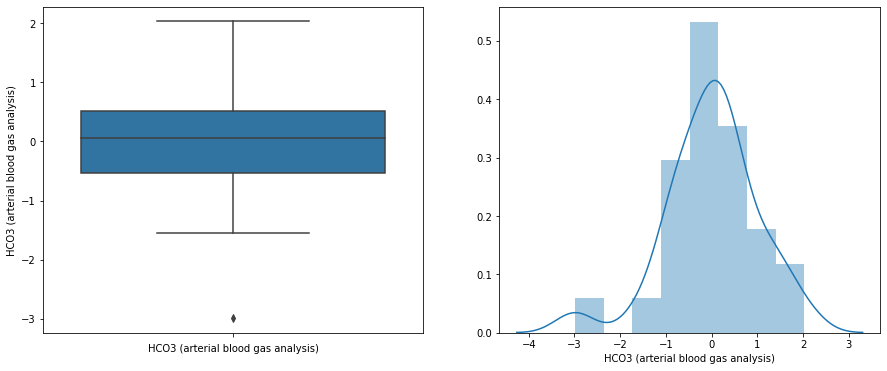

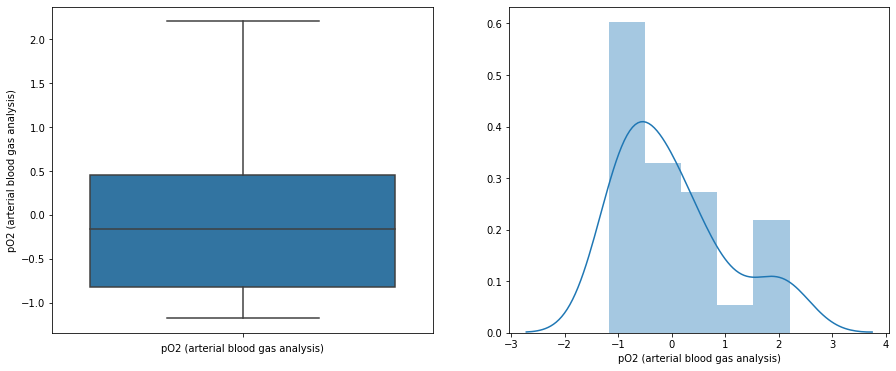

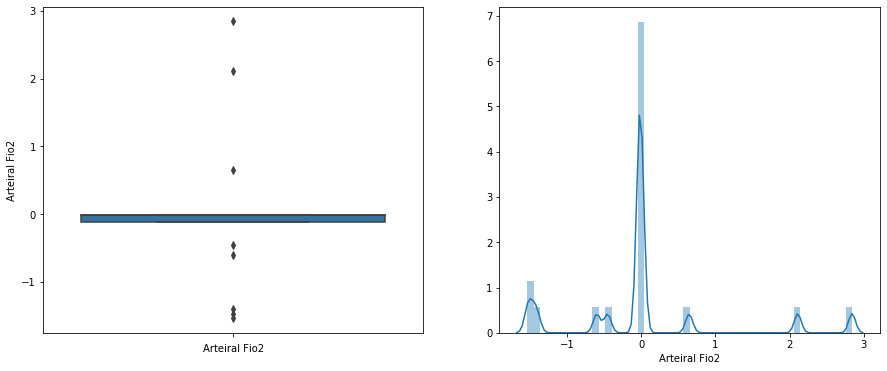

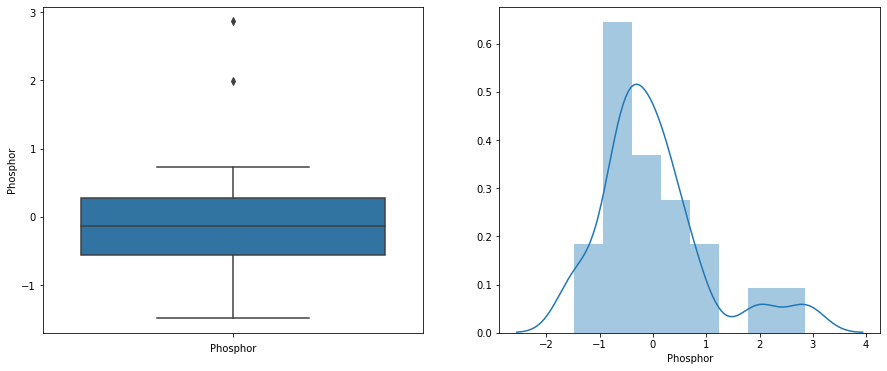

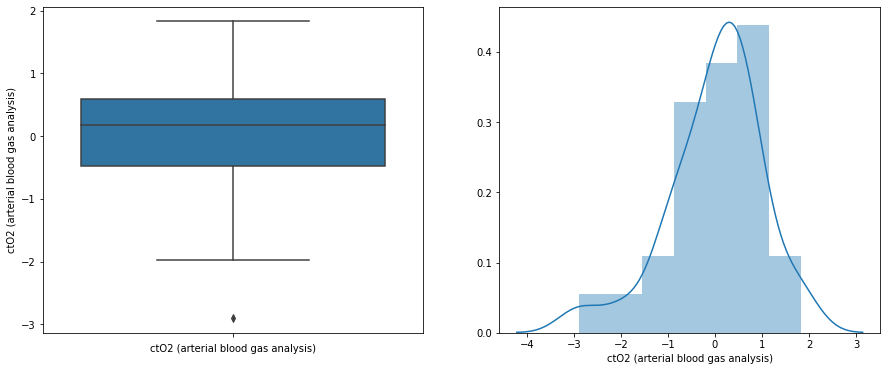

In [8]:
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[col])
    fig.set_ylabel(col)
    fig.set_xlabel(col)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[col].dropna())
    fig.set_xlabel(col)

    plt.show()

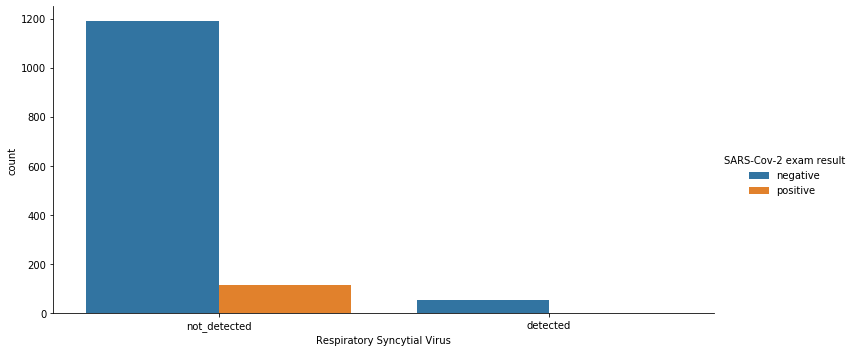

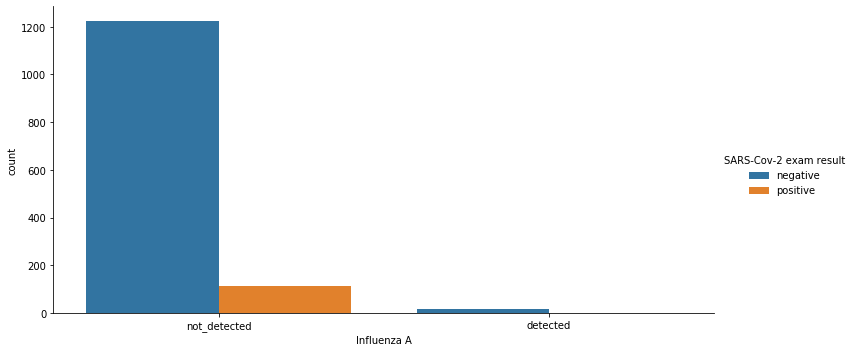

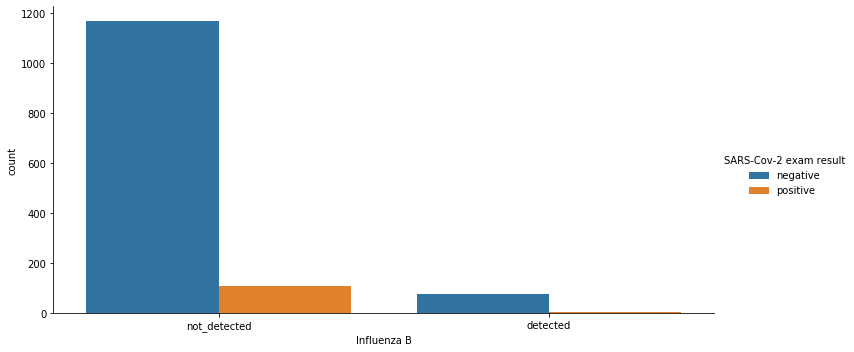

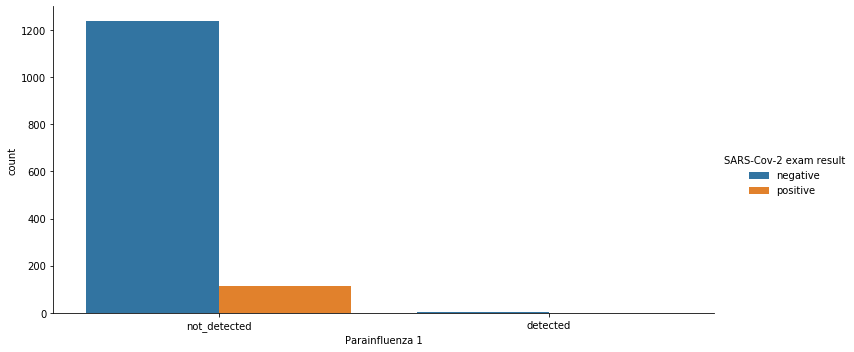

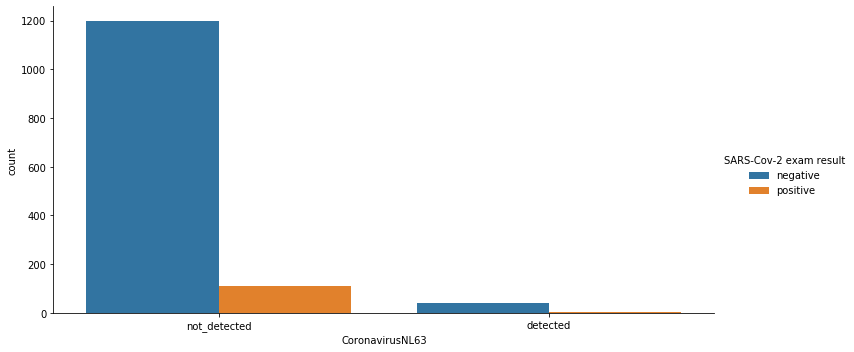

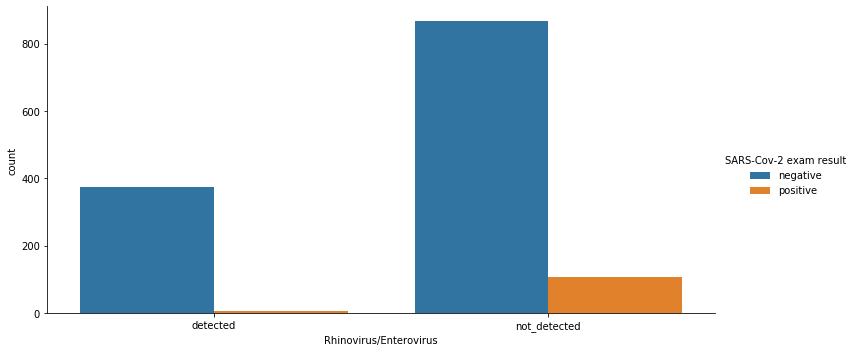

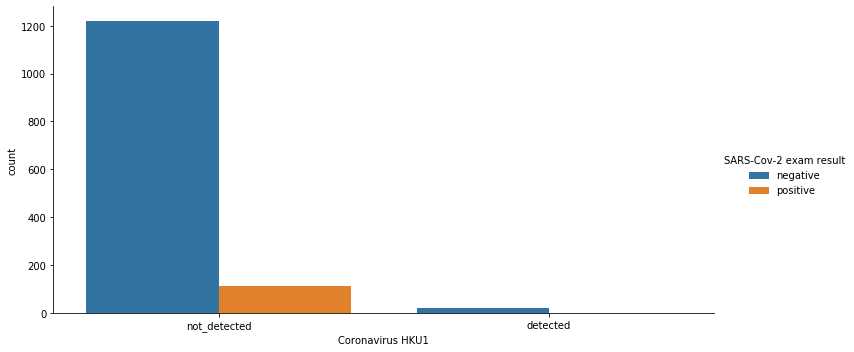

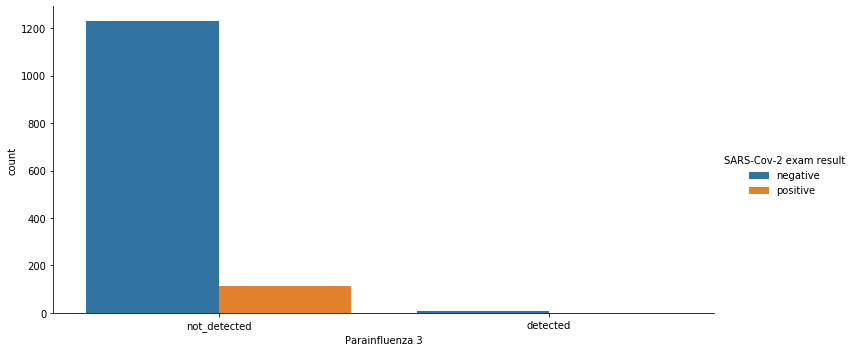

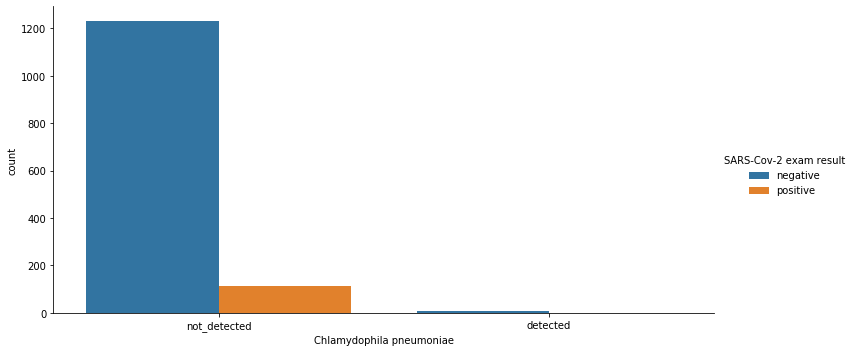

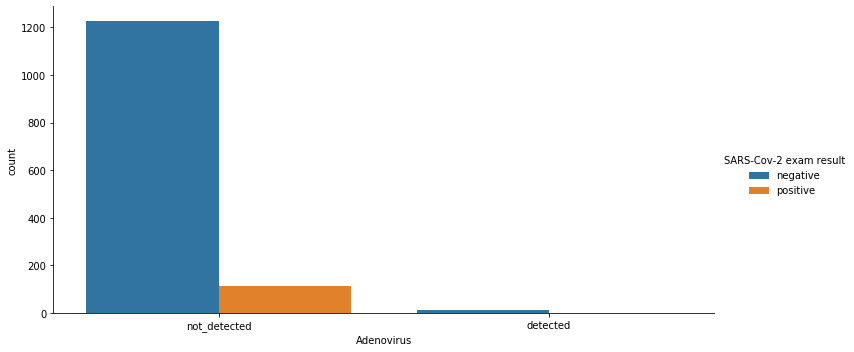

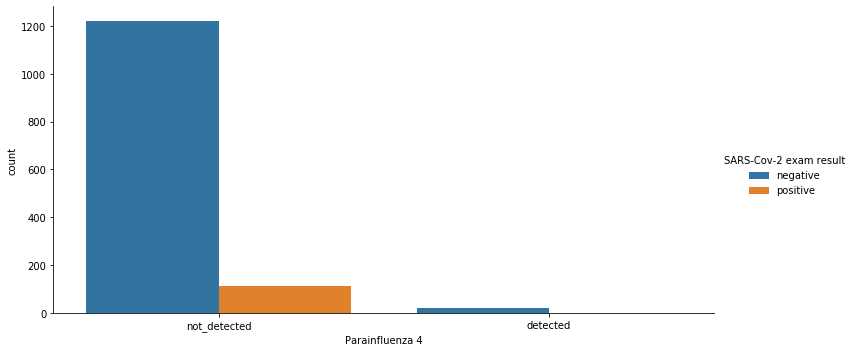

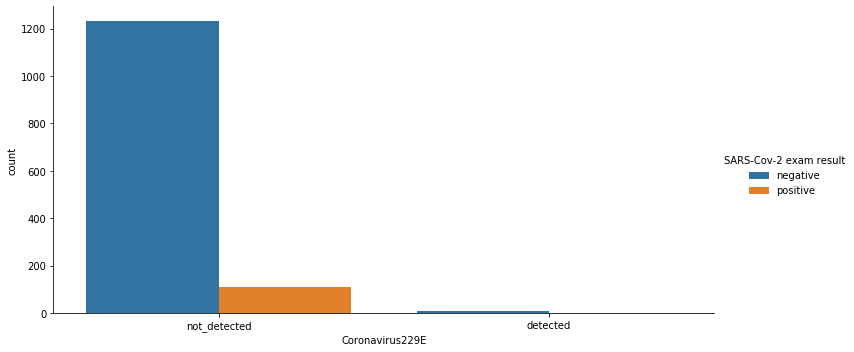

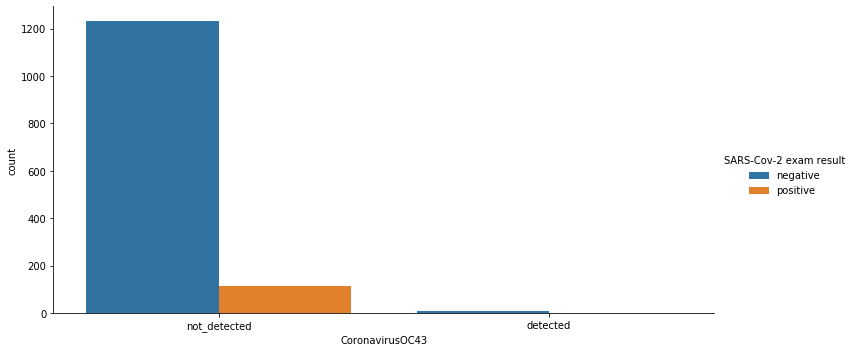

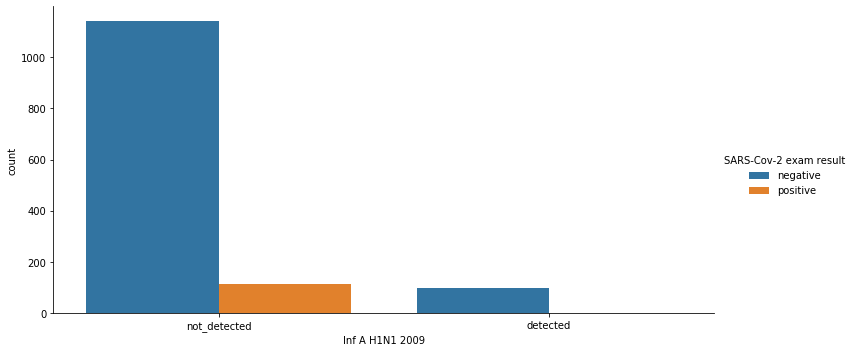

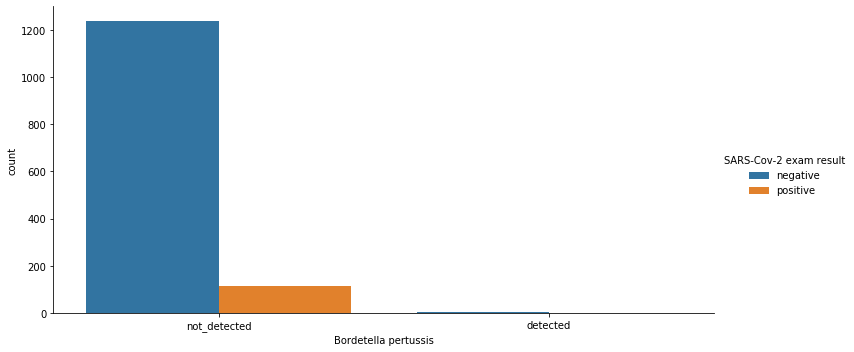

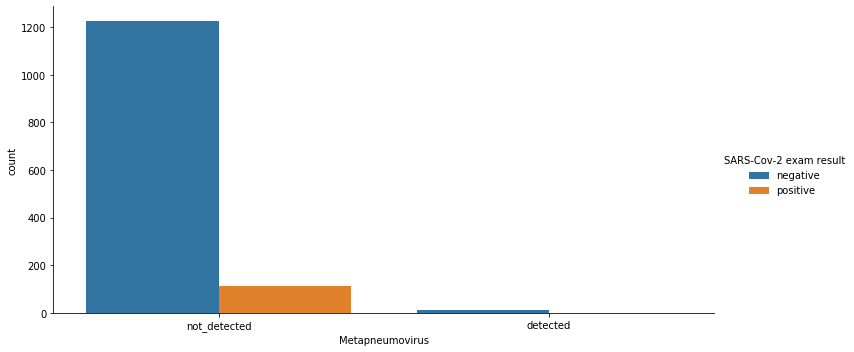

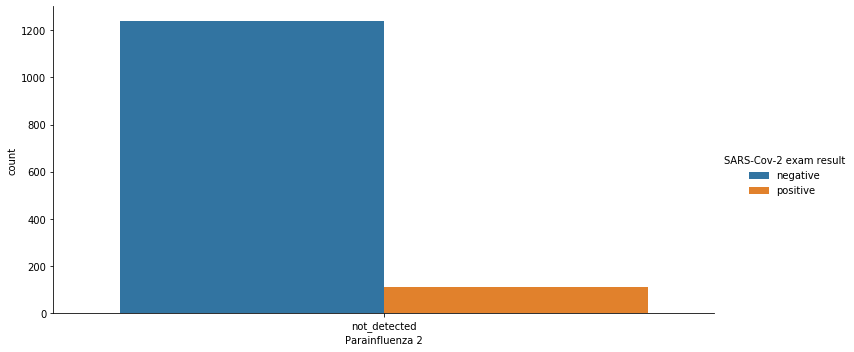

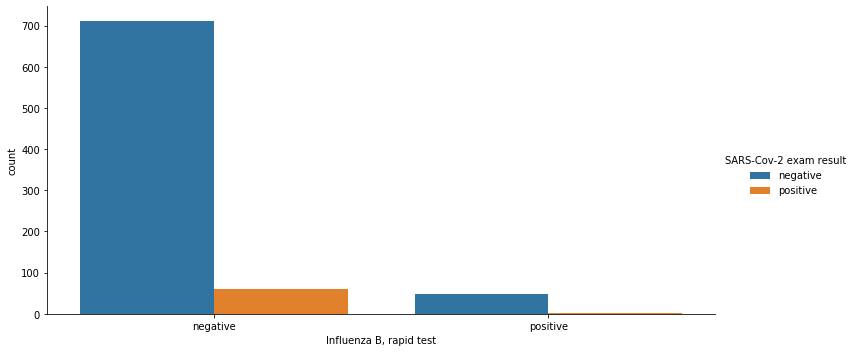

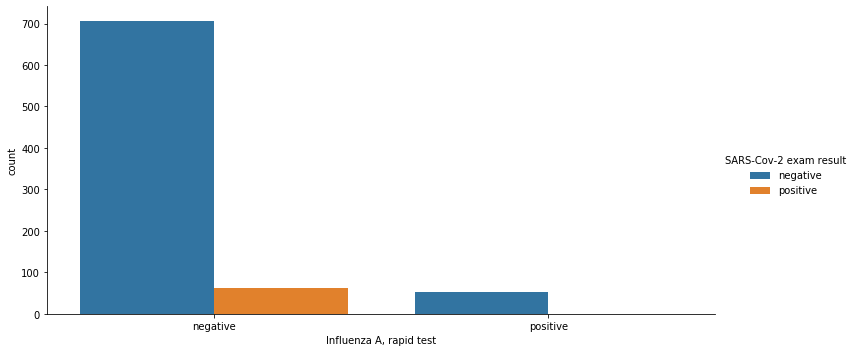

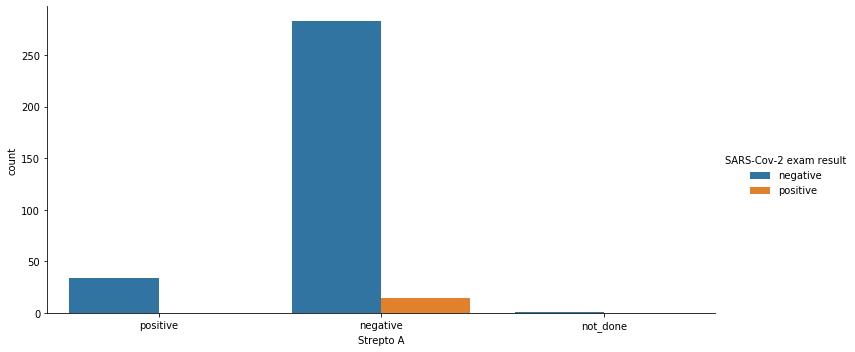

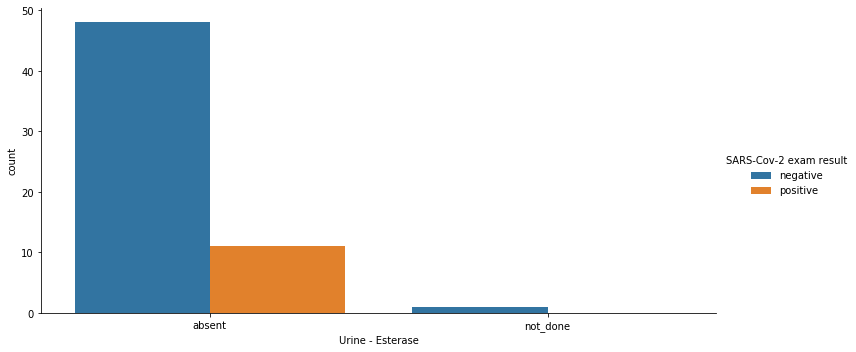

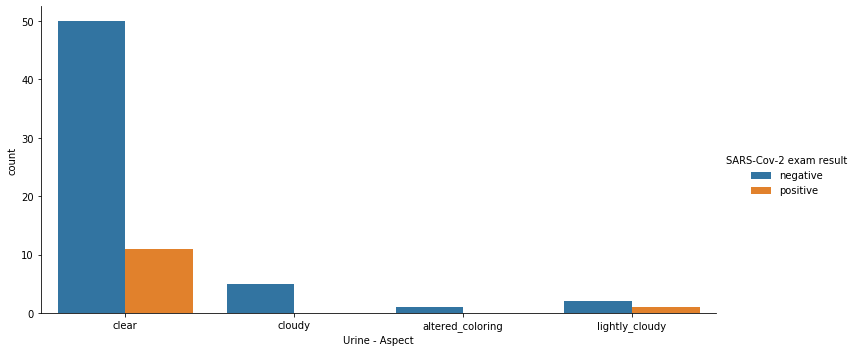

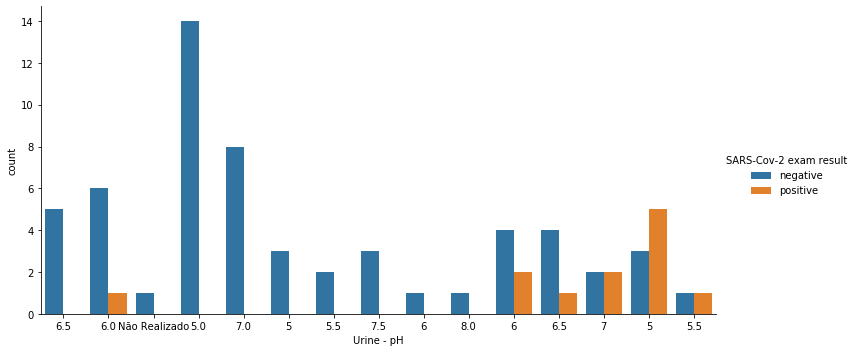

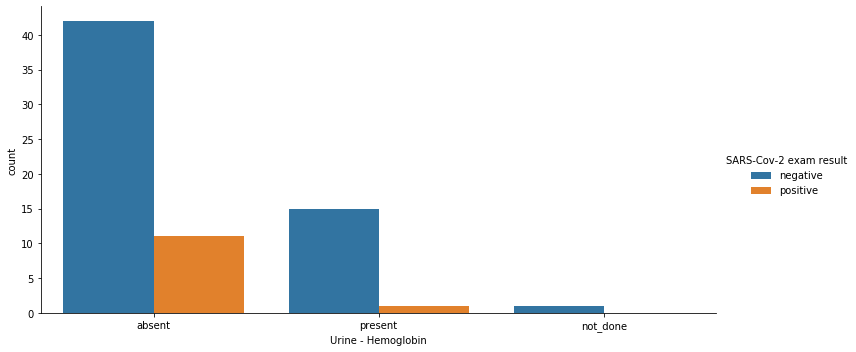

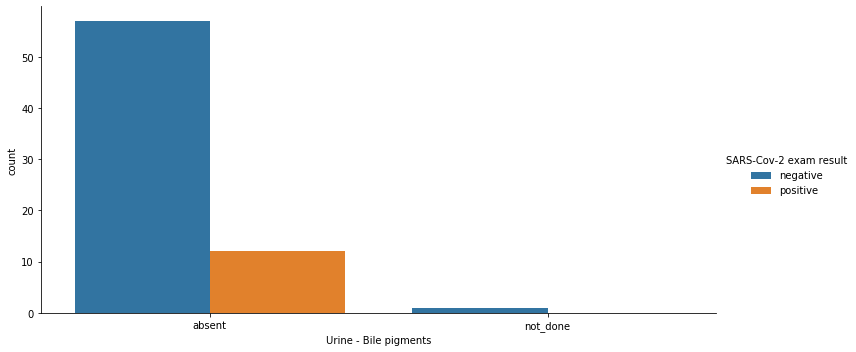

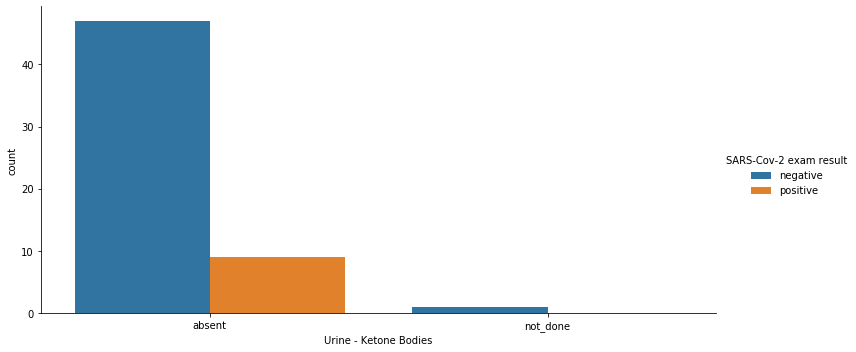

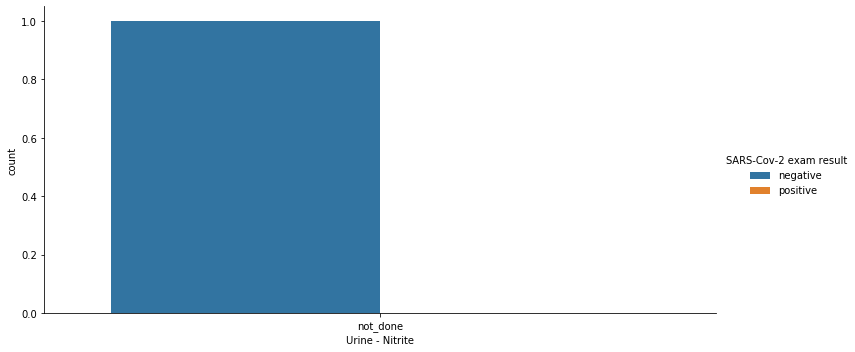

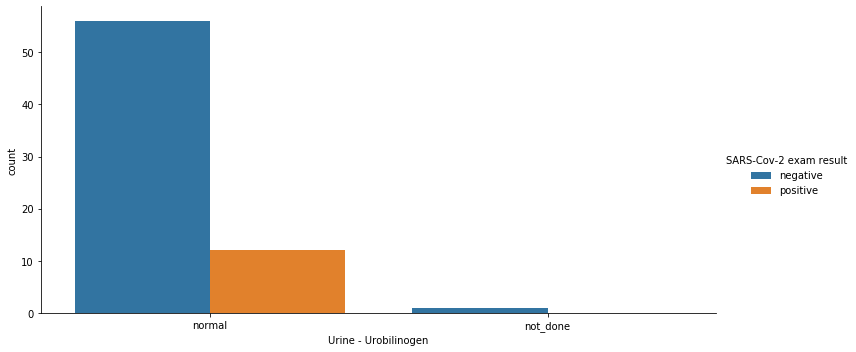

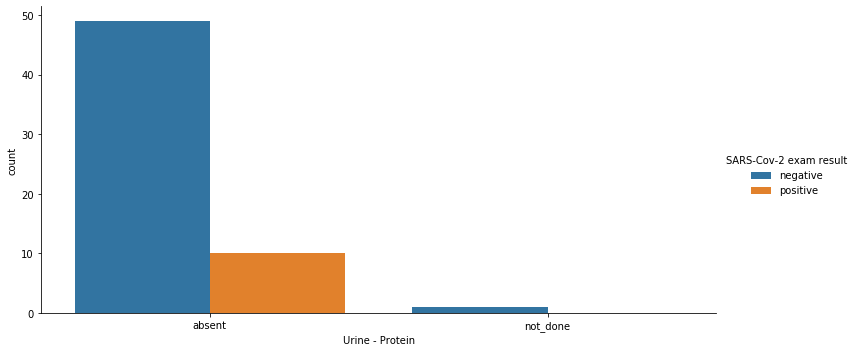

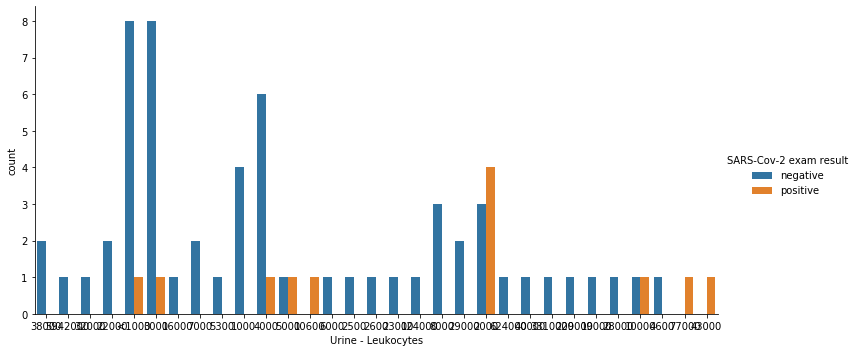

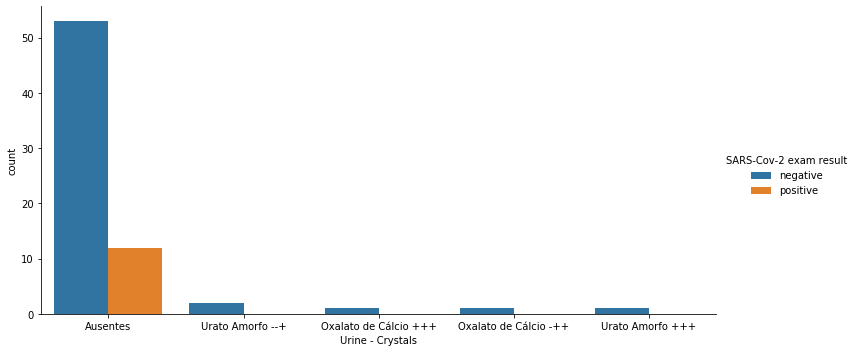

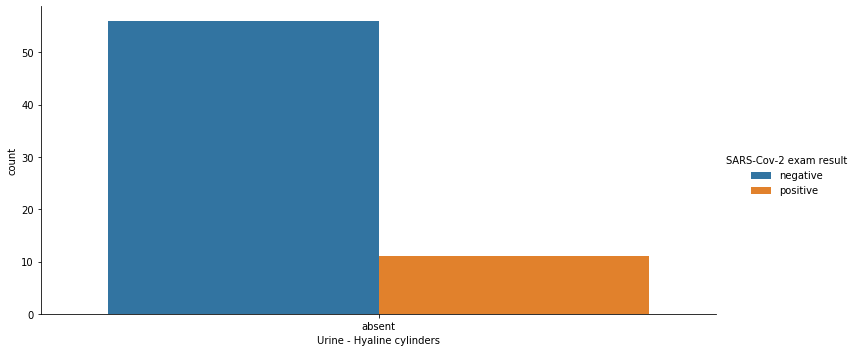

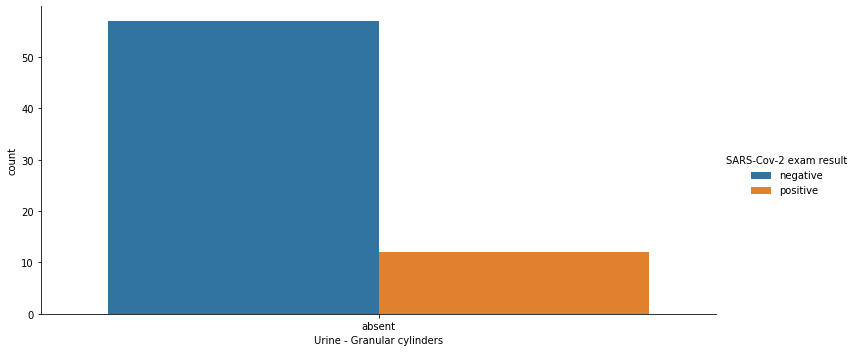

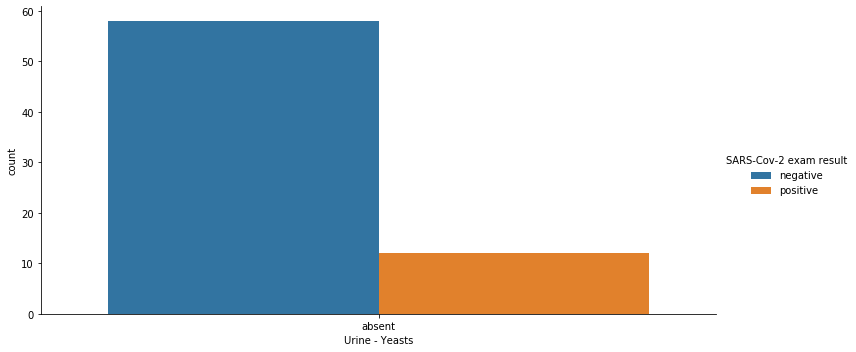

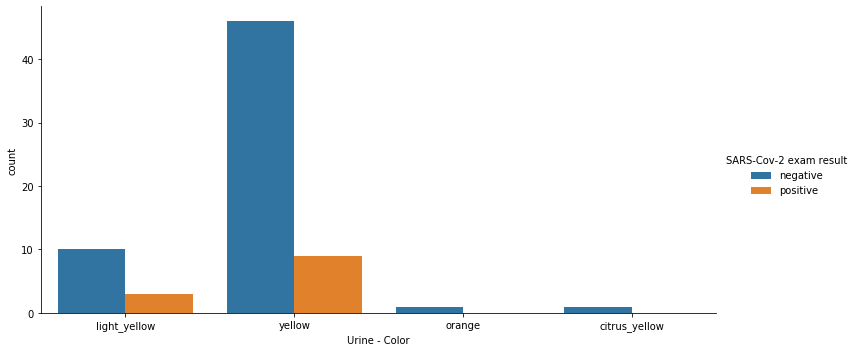

In [9]:
for column in df.select_dtypes(exclude=['number']).columns[2:]:
    sns.catplot(x=column,hue=target,data=df, kind='count',aspect=2)        
    plt.show()

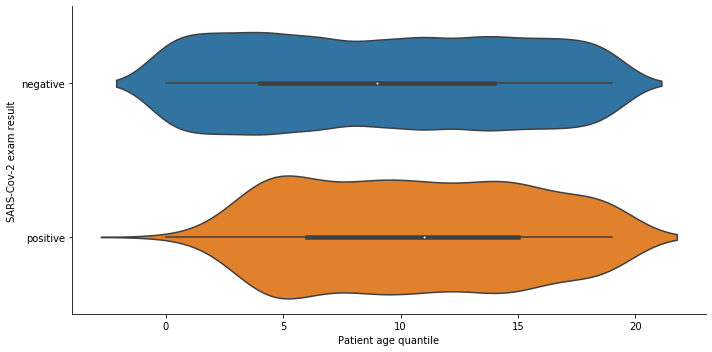

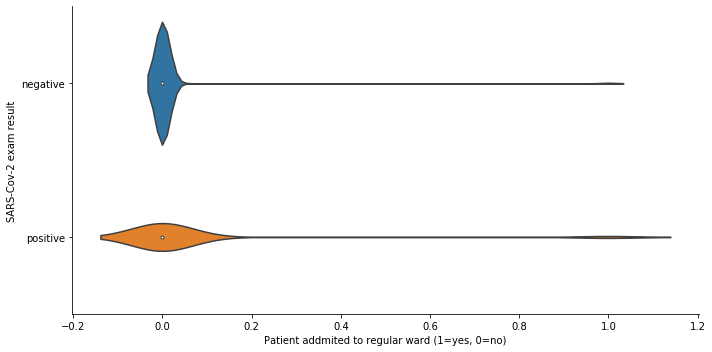

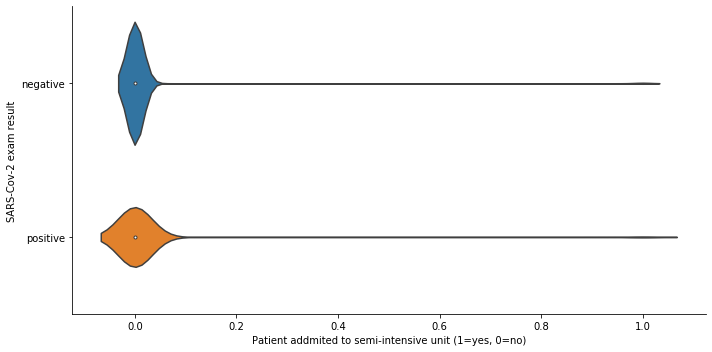

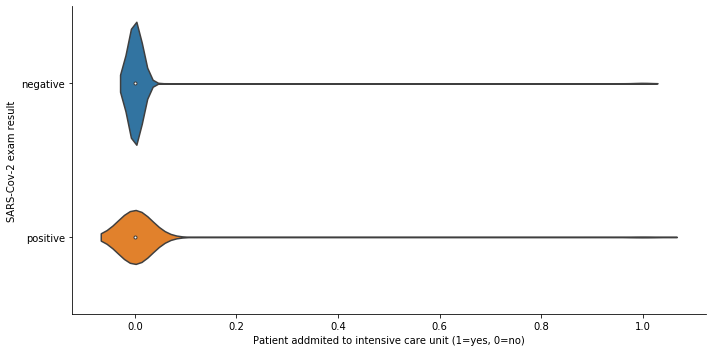

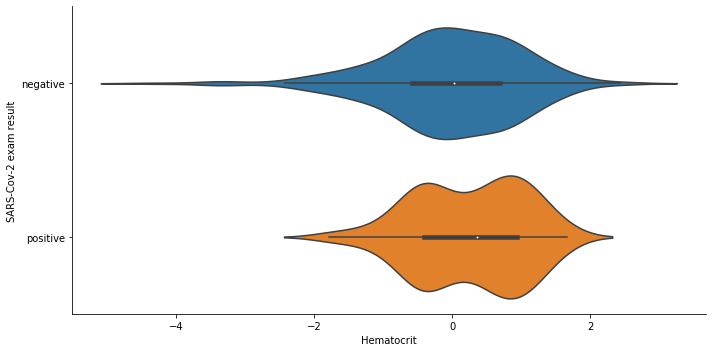

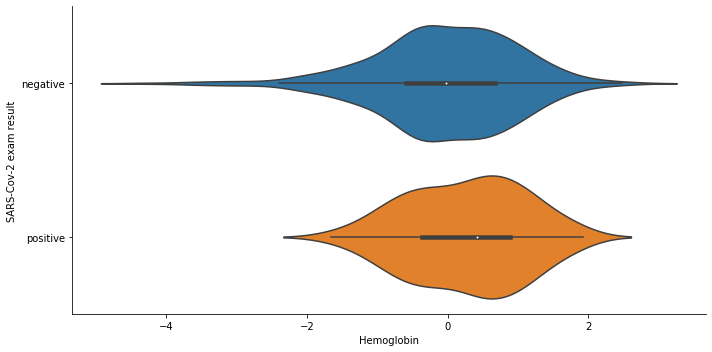

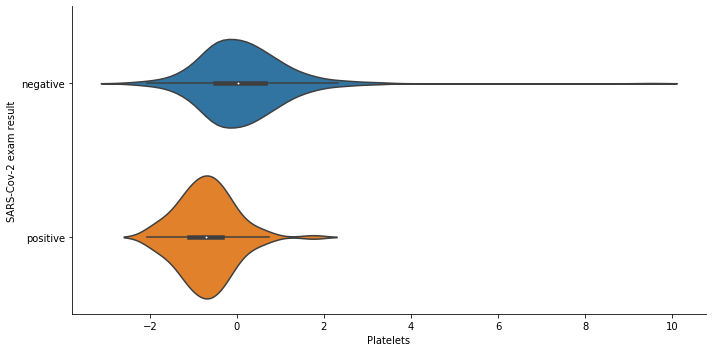

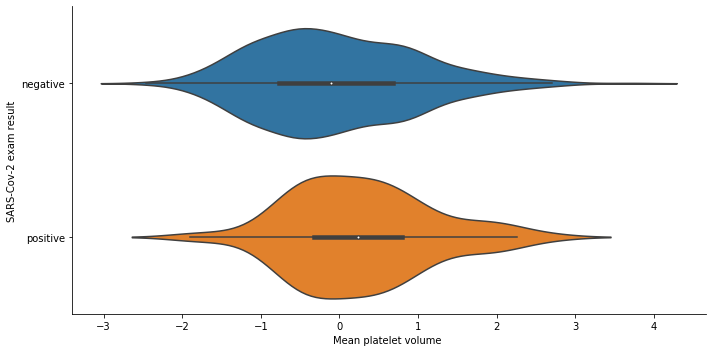

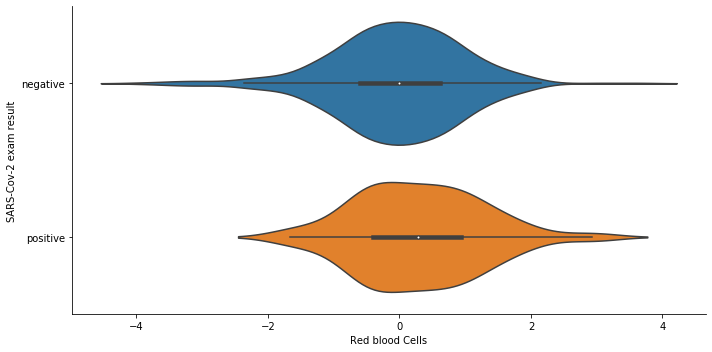

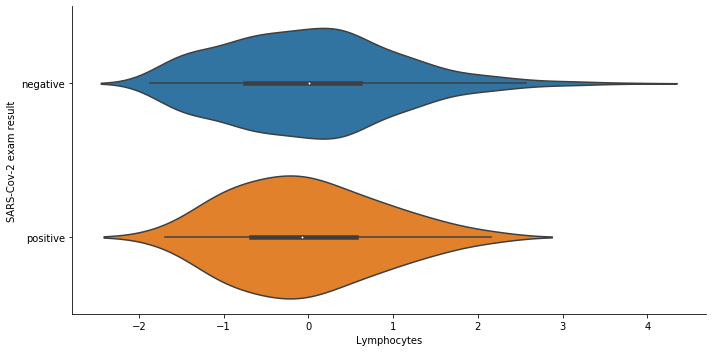

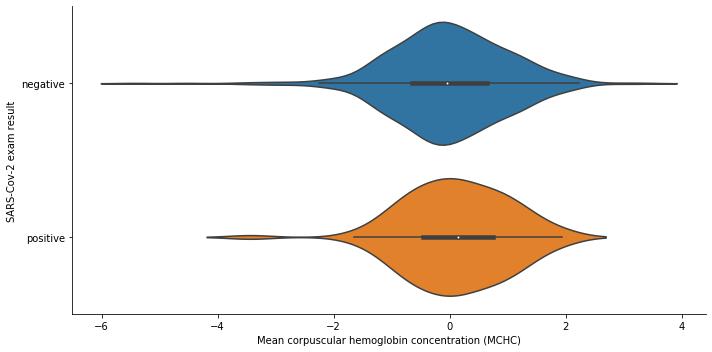

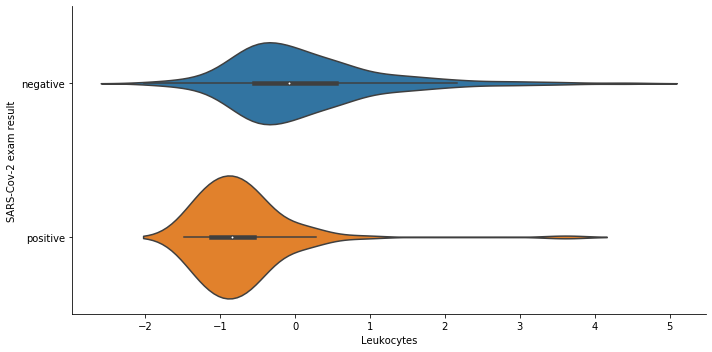

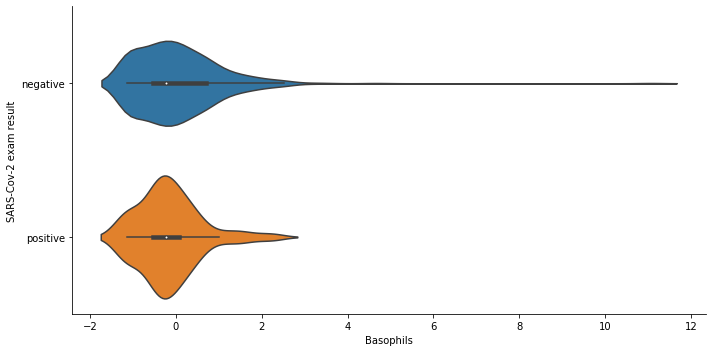

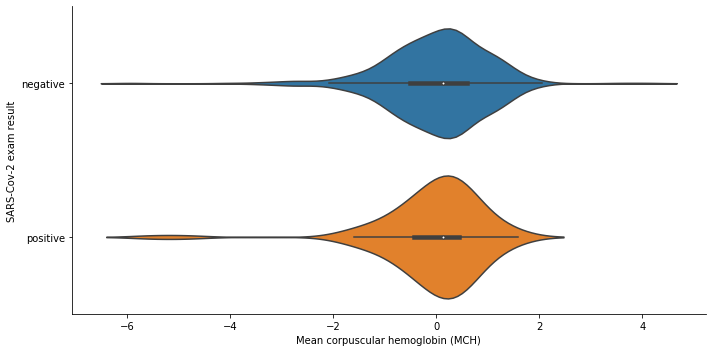

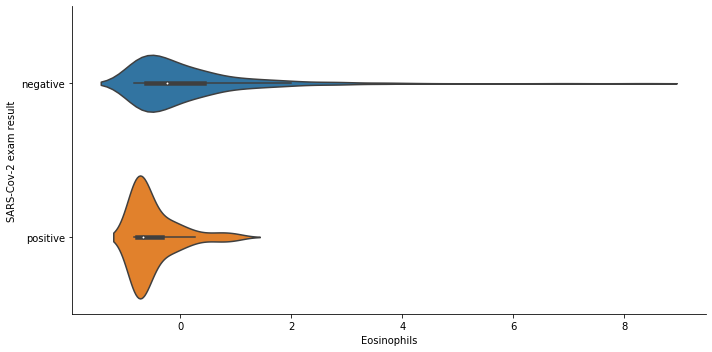

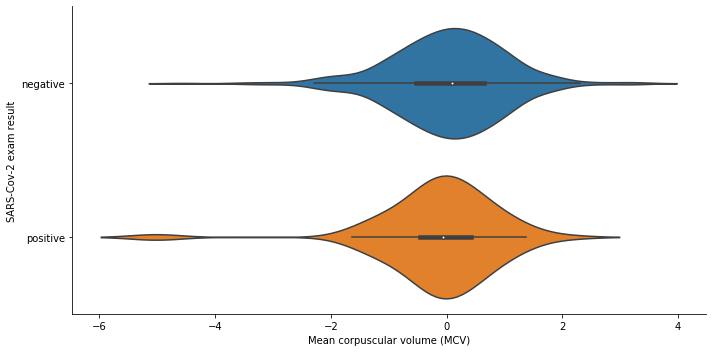

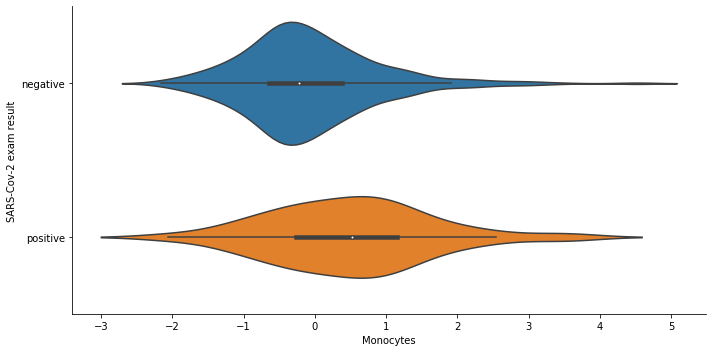

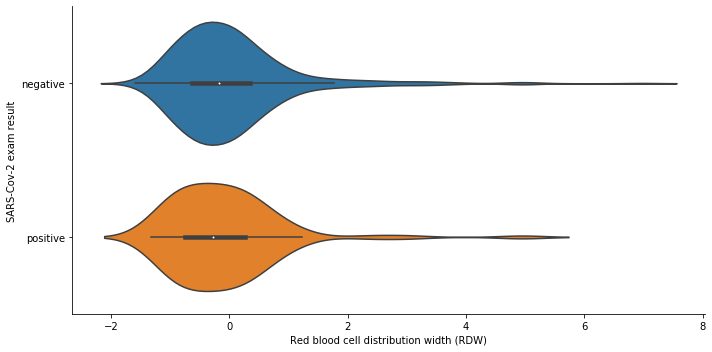

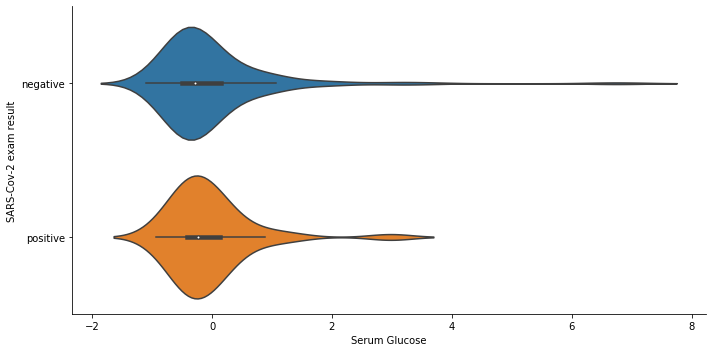

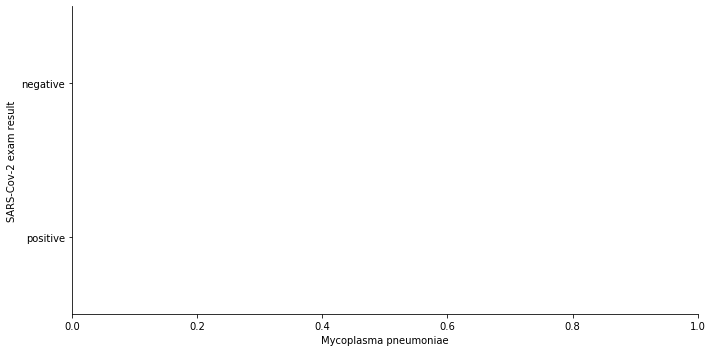

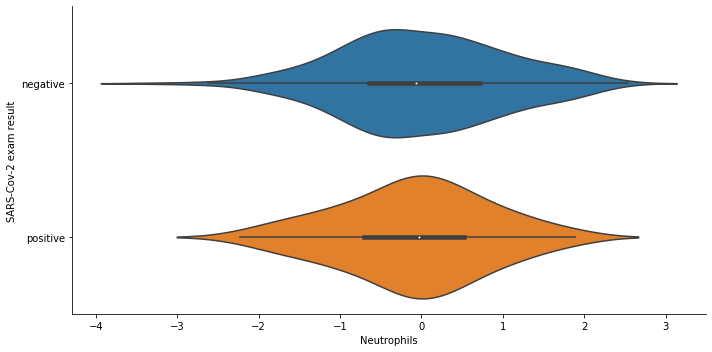

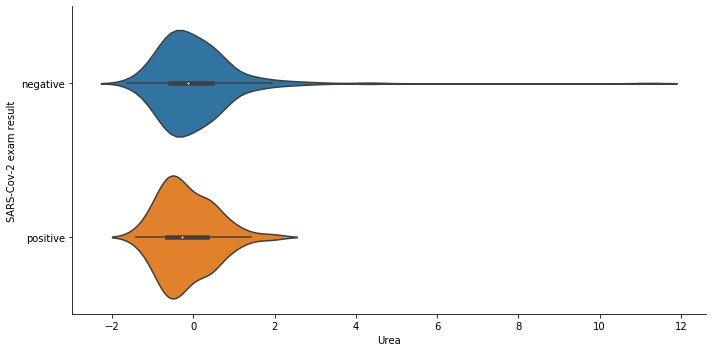

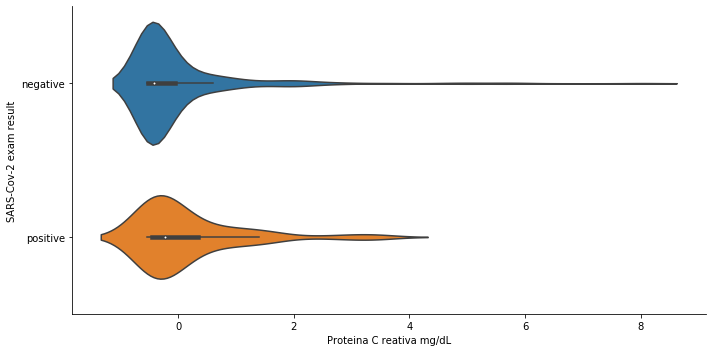

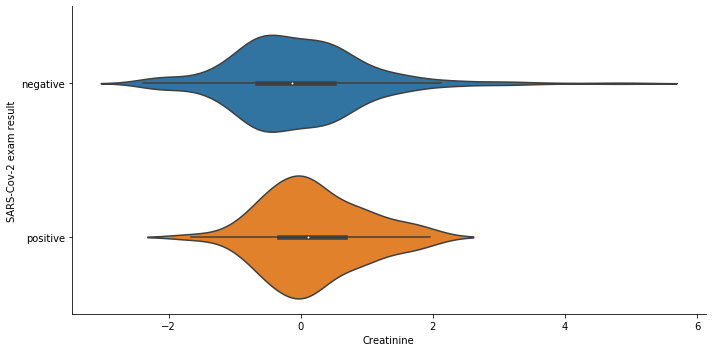

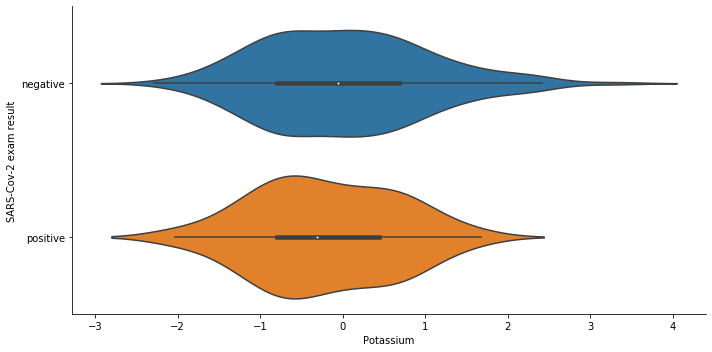

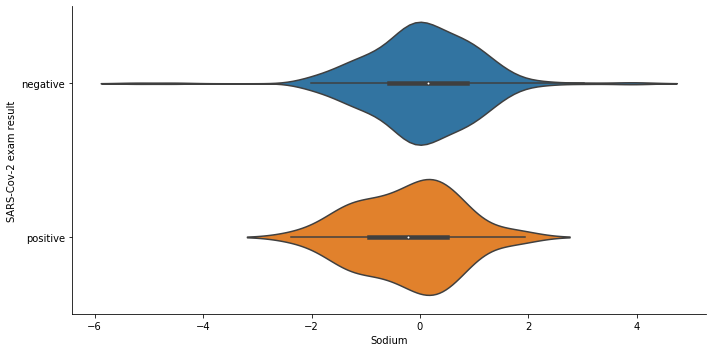

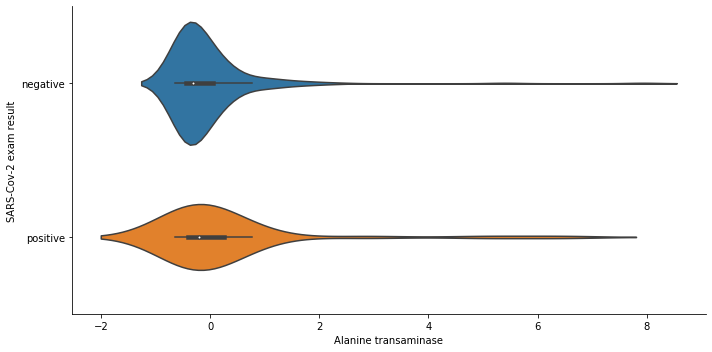

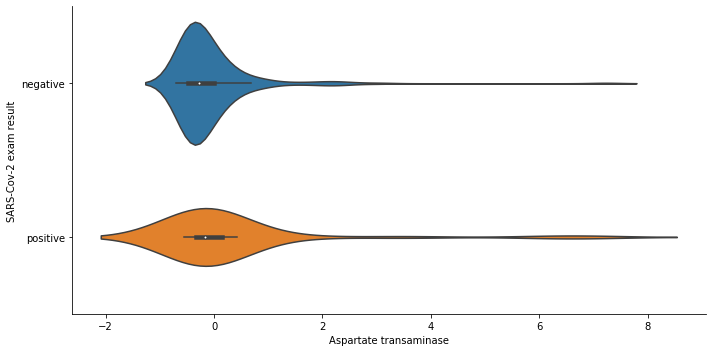

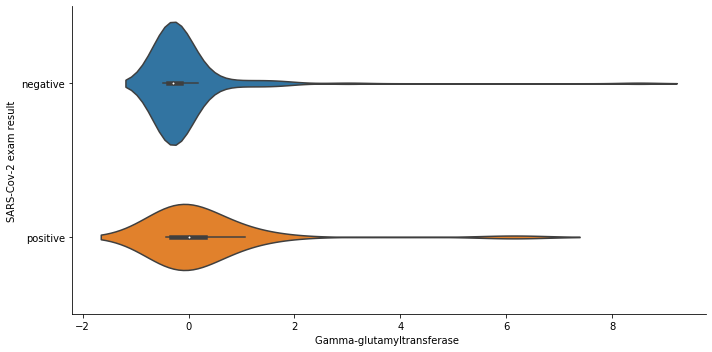

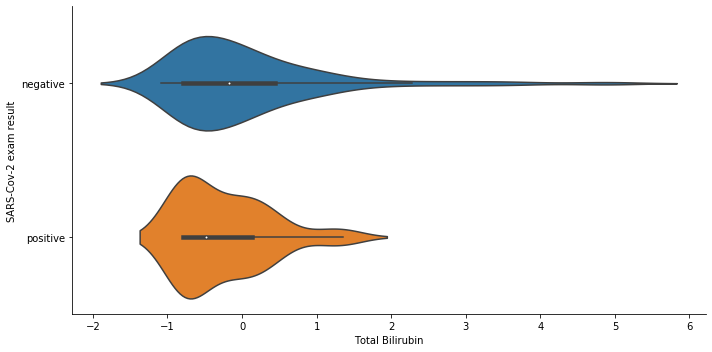

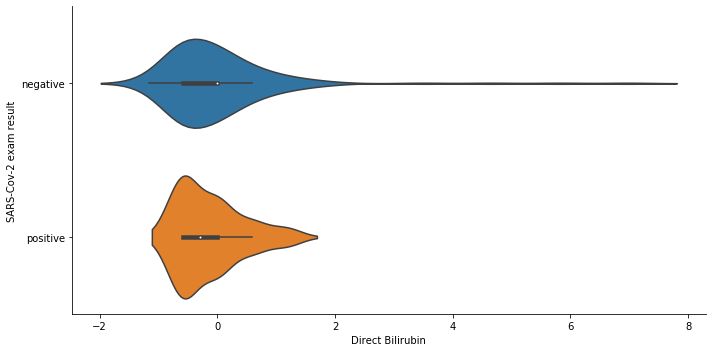

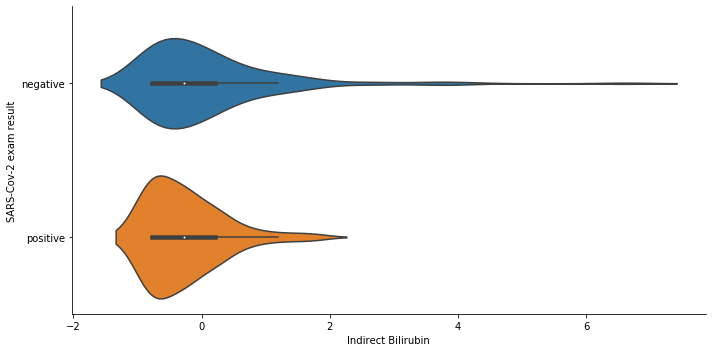

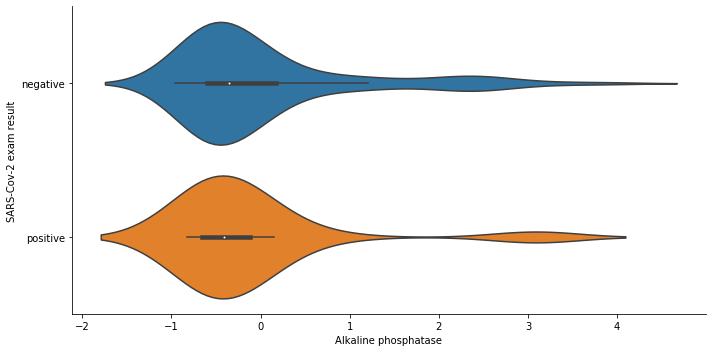

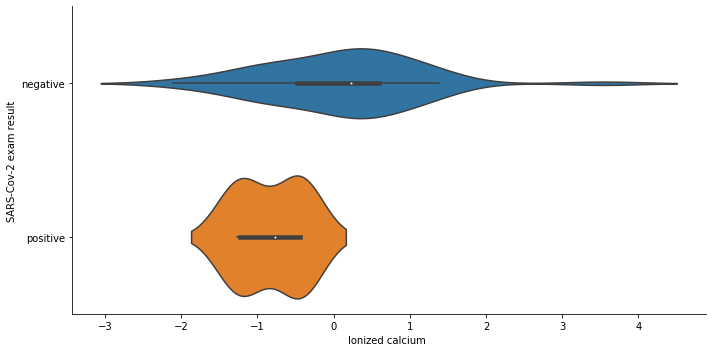

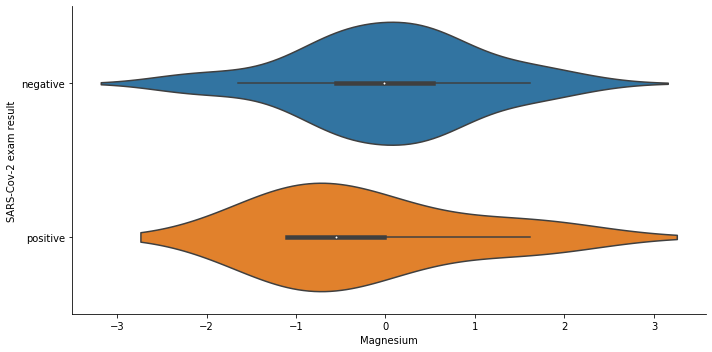

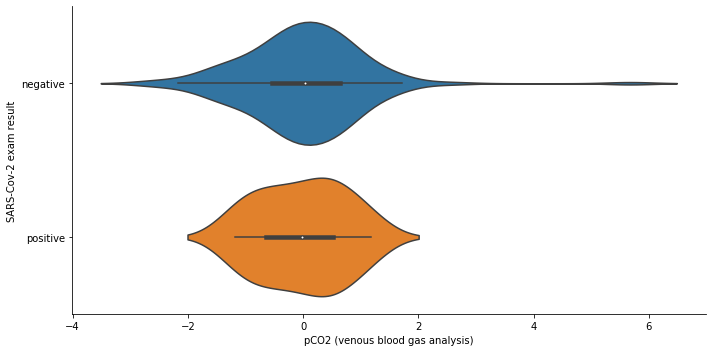

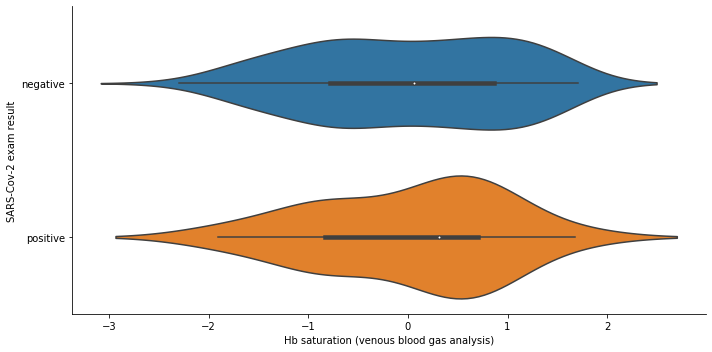

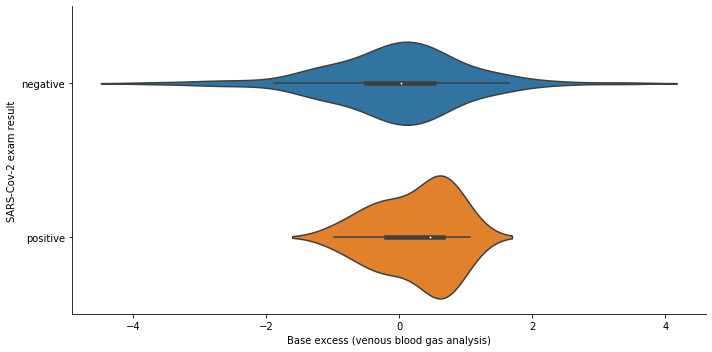

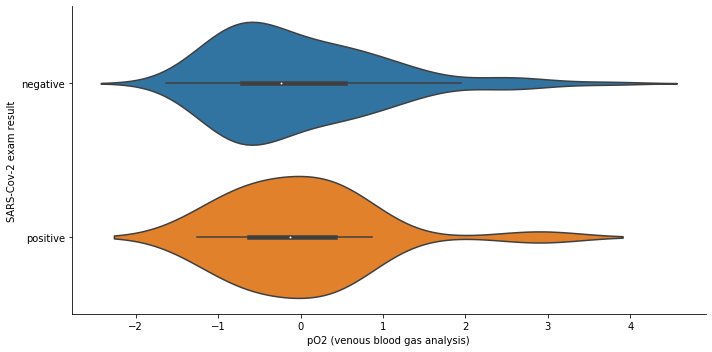

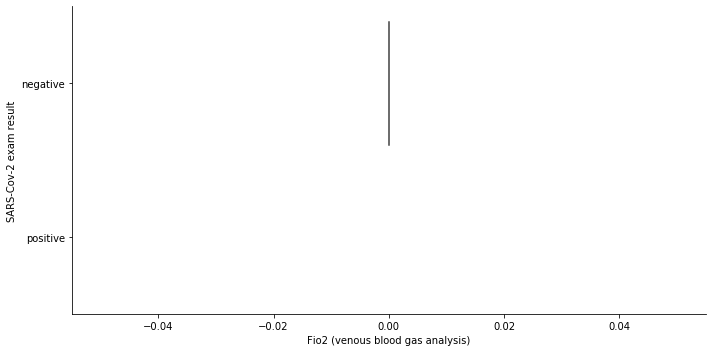

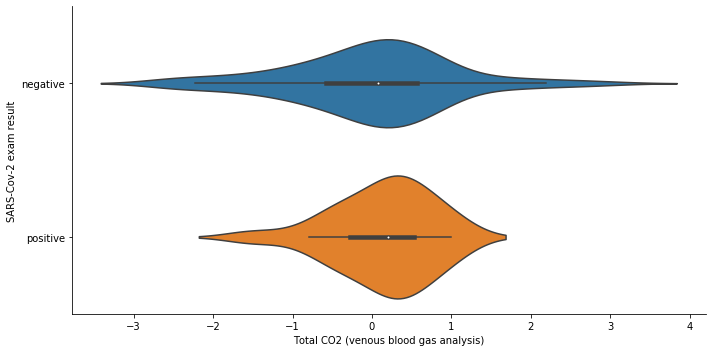

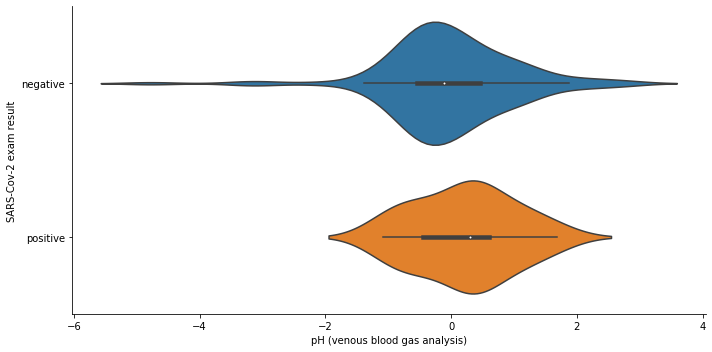

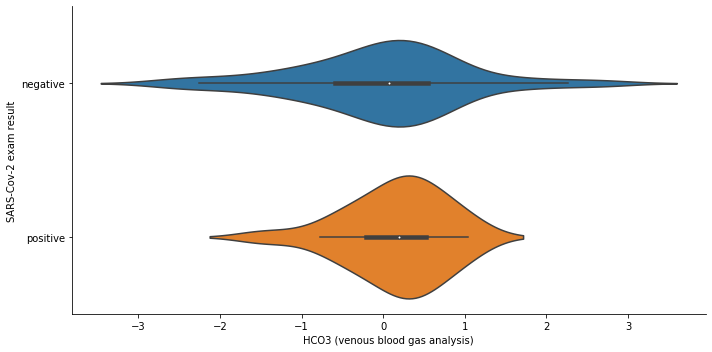

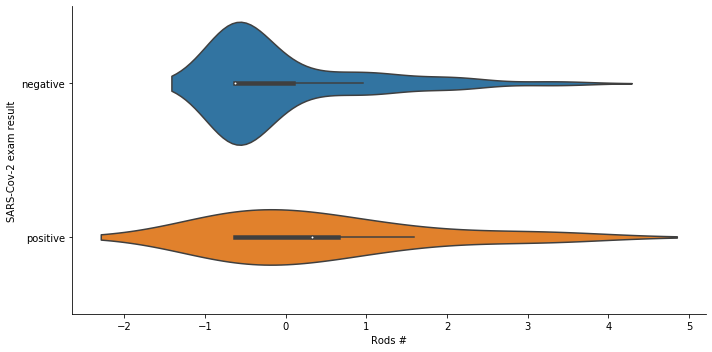

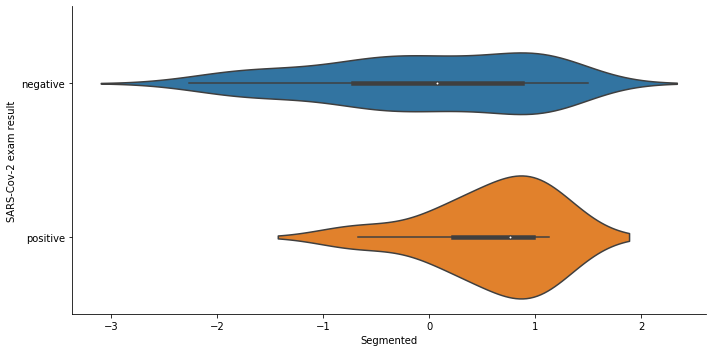

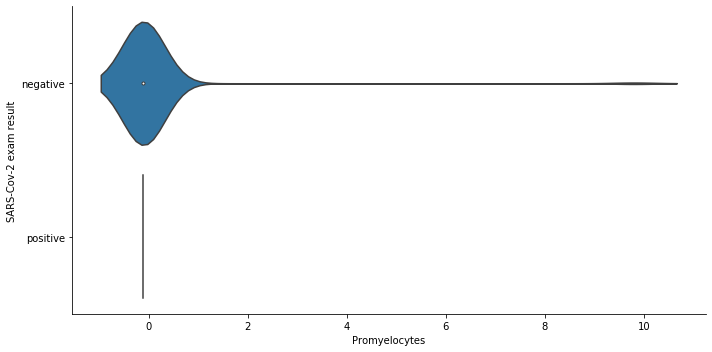

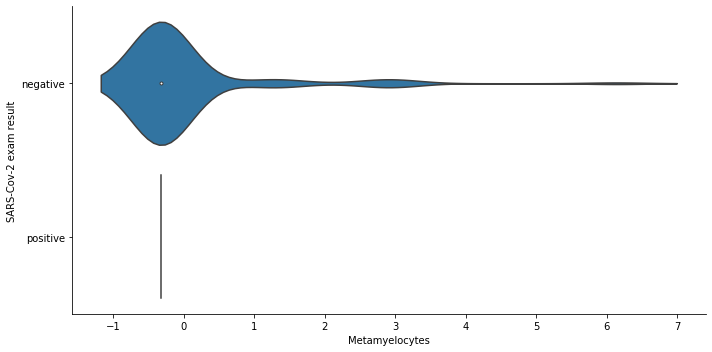

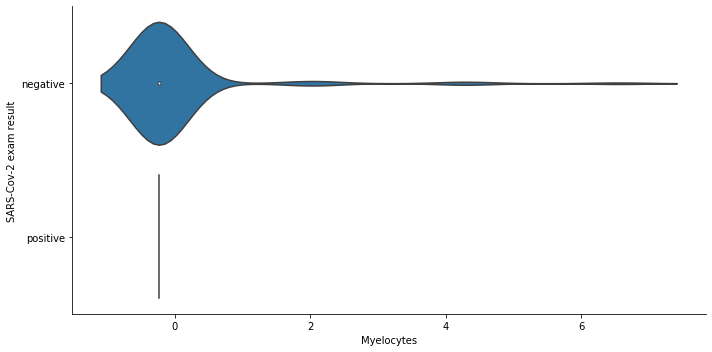

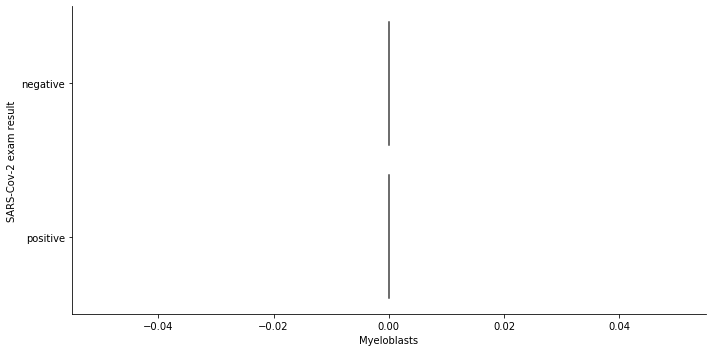

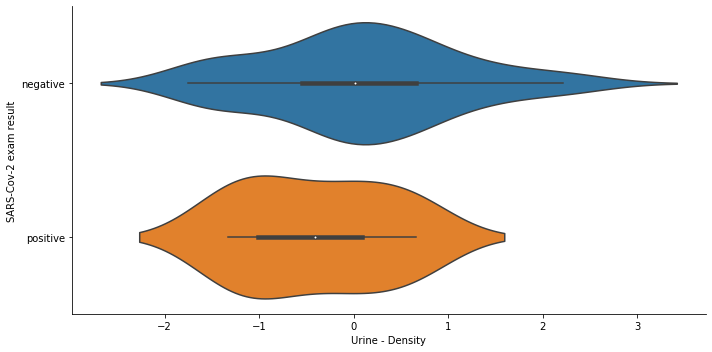

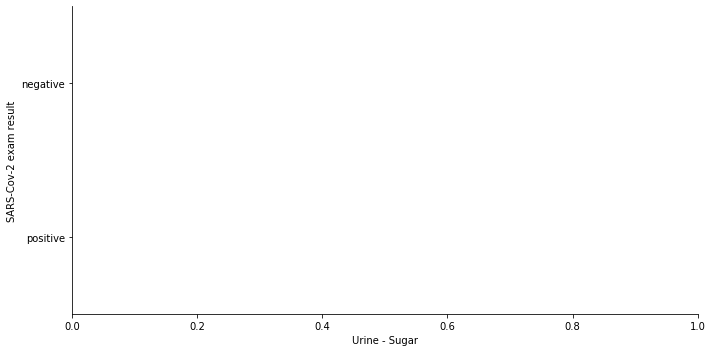

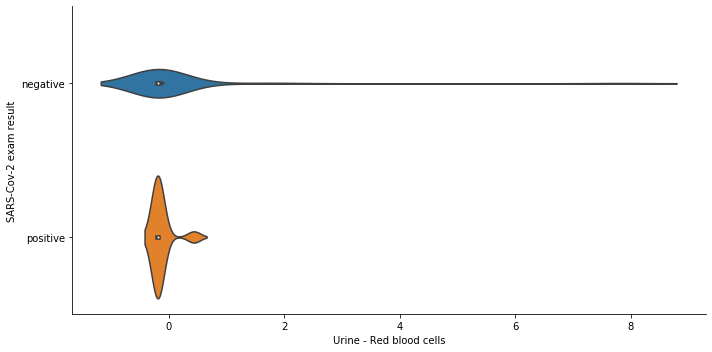

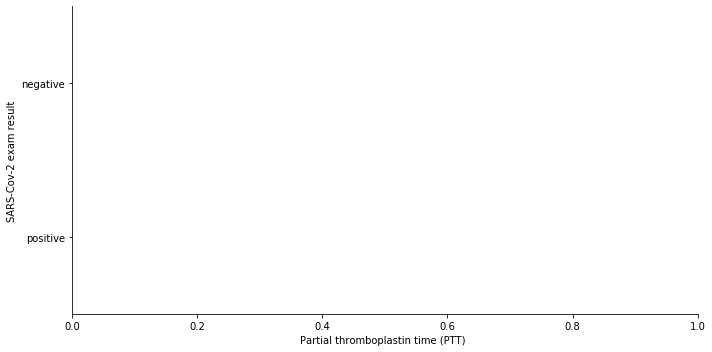

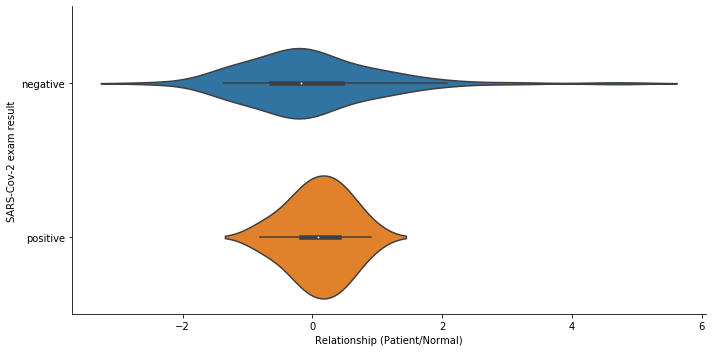

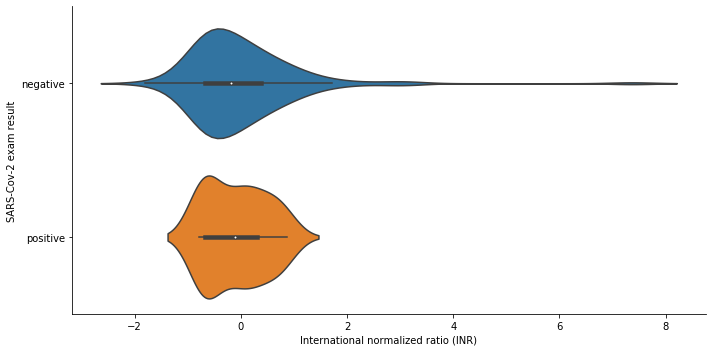

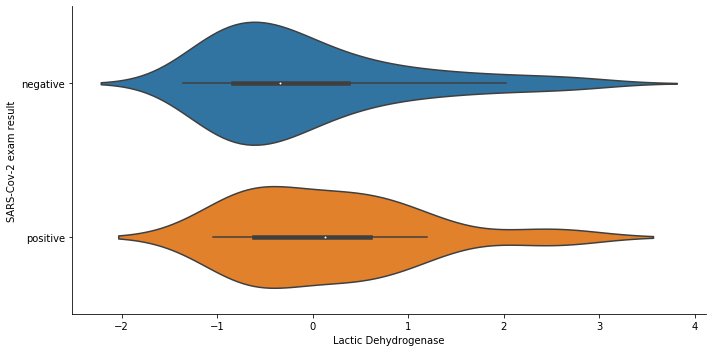

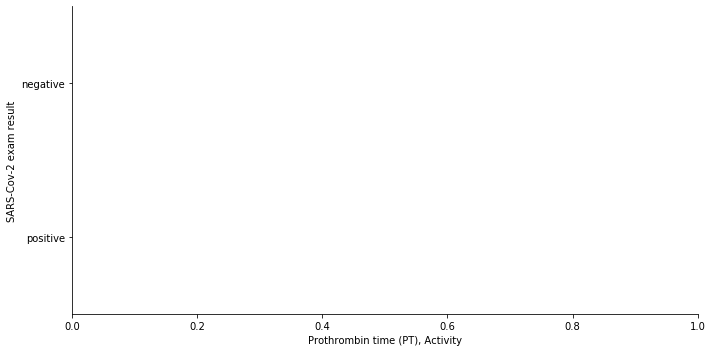

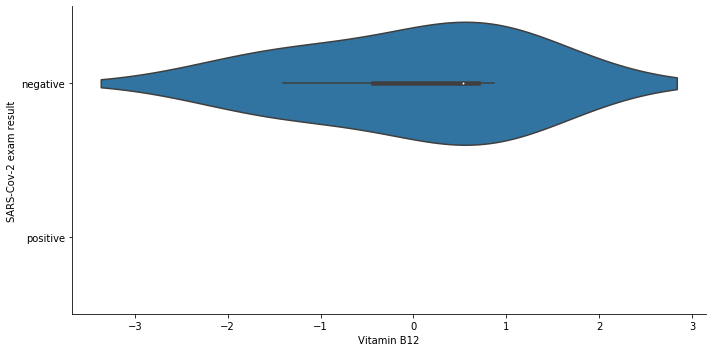

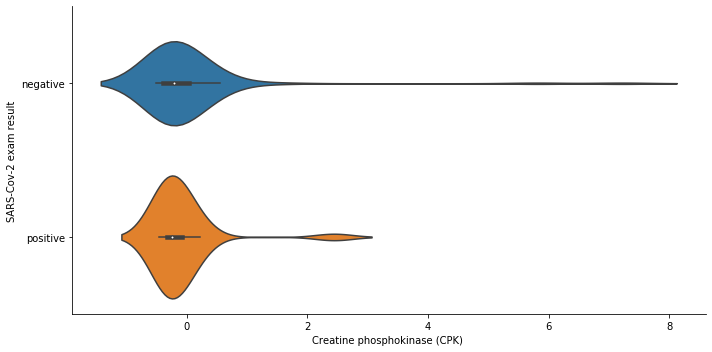

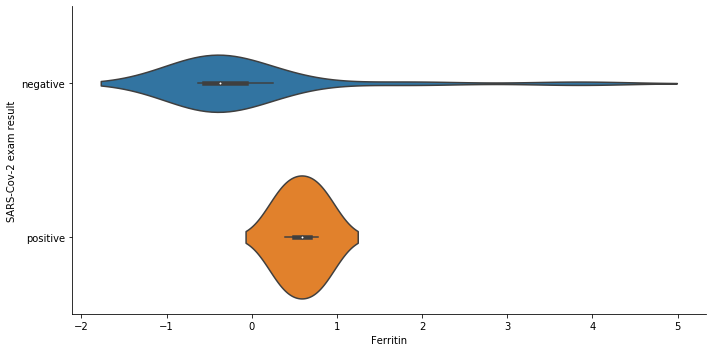

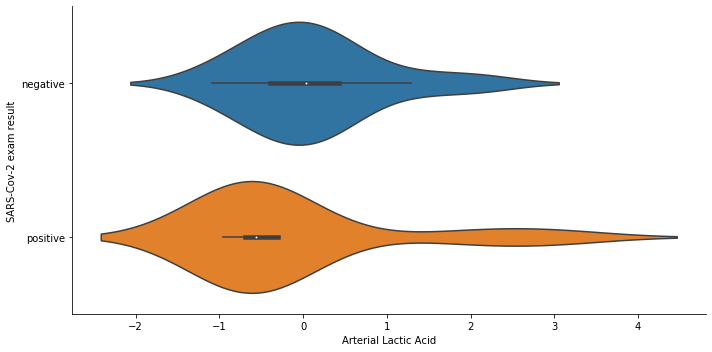

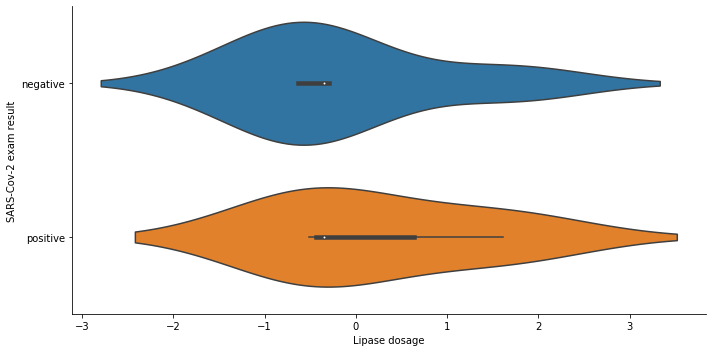

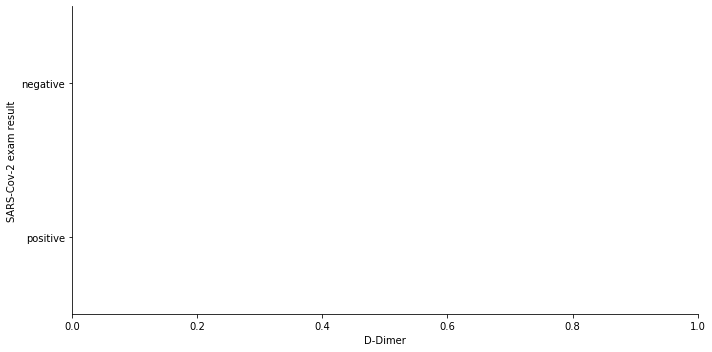

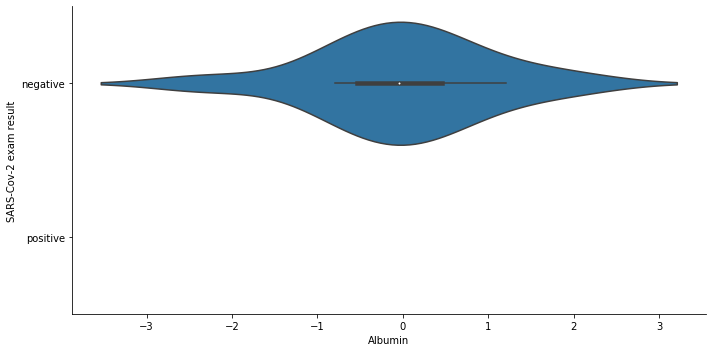

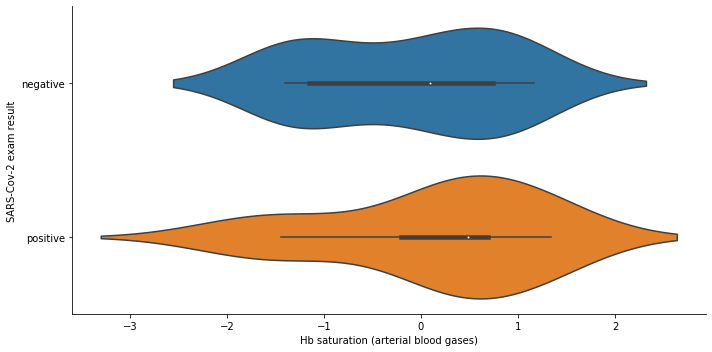

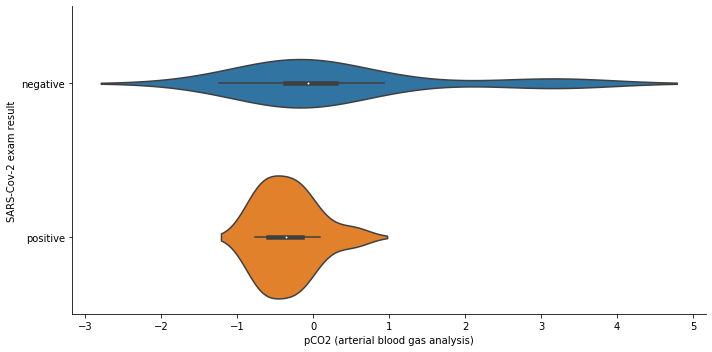

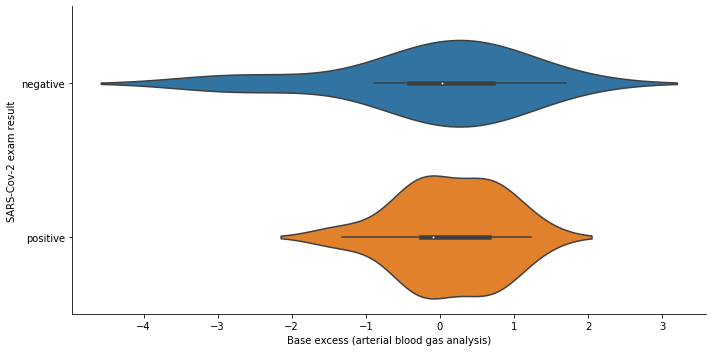

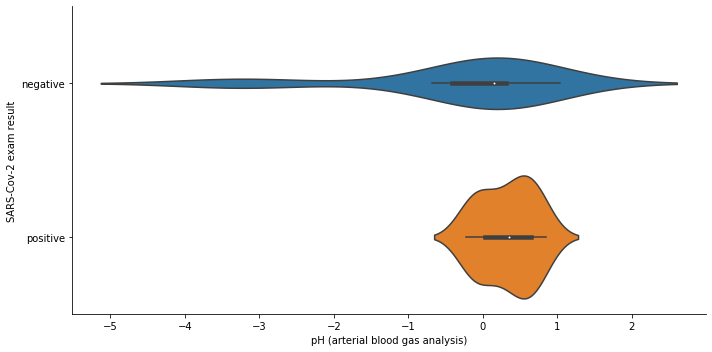

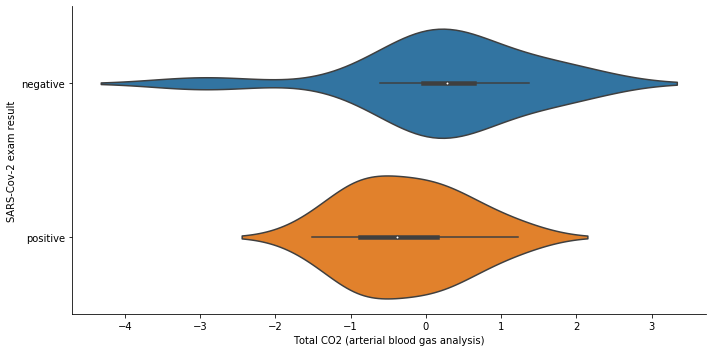

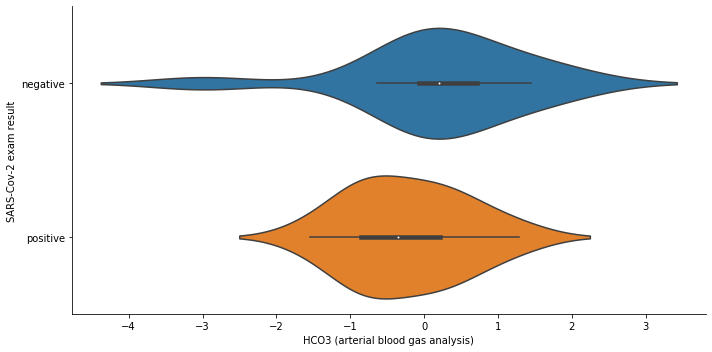

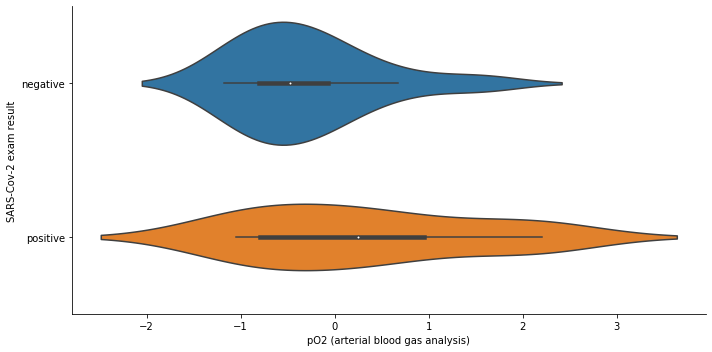

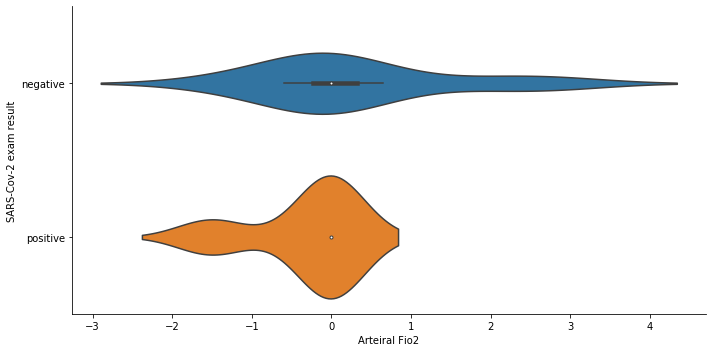

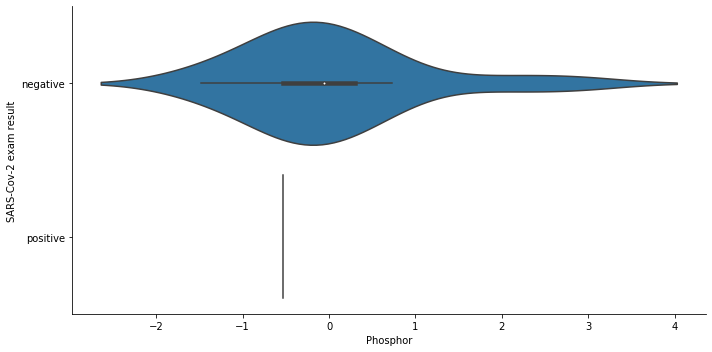

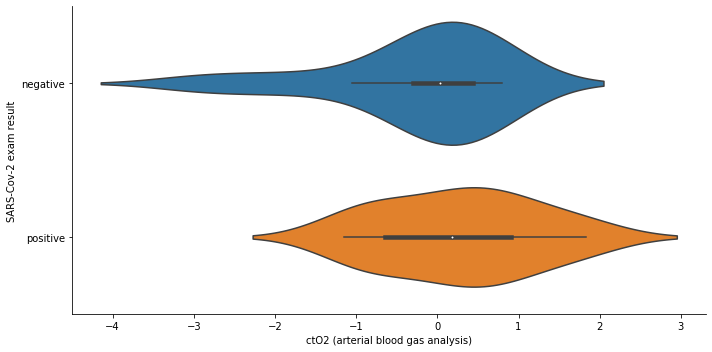

In [10]:
for col in df.select_dtypes(include=['number']).columns:
    sns.catplot(y=target,x=col, data=df, kind='violin',aspect=2)
    plt.show()

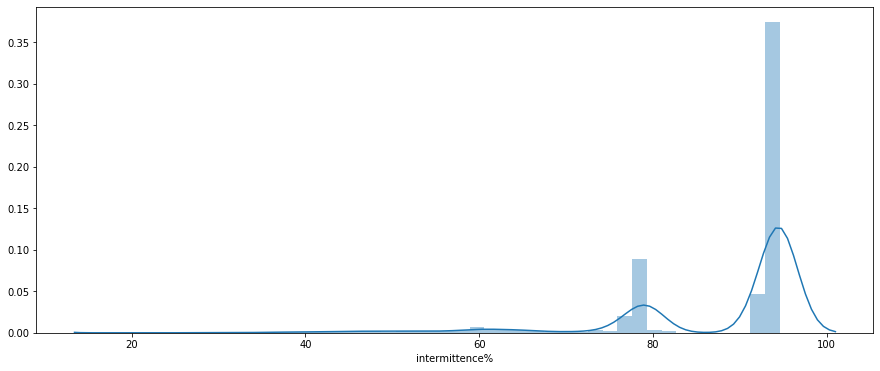

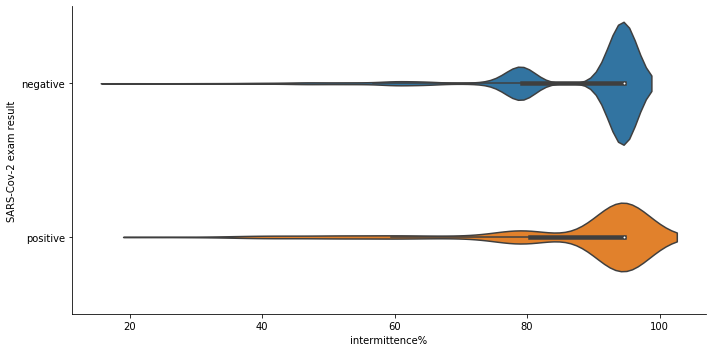

In [11]:
col = 'intermittence%'
df[col] = df.isnull().sum(axis=1)/df.shape[1] * 100
plt.figure(figsize=(15,6))
sns.distplot(df[col])
plt.show()

sns.catplot(y=target,x=col, data=df, kind='violin',aspect=2)
plt.show()

In [12]:
print(col,':')
for percent in range(0,100,10):
    print(f"{percent}% - {percent + 10}%: {df[(df[col] < percent+10) & (df[col] >= percent)].__len__()}/ {len(df)}")

intermittence% :
0% - 10%: 0/ 5644
10% - 20%: 1/ 5644
20% - 30%: 3/ 5644
30% - 40%: 30/ 5644
40% - 50%: 90/ 5644
50% - 60%: 131/ 5644
60% - 70%: 185/ 5644
70% - 80%: 1110/ 5644
80% - 90%: 50/ 5644
90% - 100%: 4044/ 5644
